<a href="https://colab.research.google.com/github/neuromatch/course-content-template/blob/main/tutorials/W1D2_Template/W1D2_Tutorial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; <a href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/neuromatch/course-content-template/main/tutorials/W1D2_Template/W1D2_Tutorial1.ipynb" target="_parent"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open in Kaggle"/></a>

# Tutorial 1: Cognitive Structures

**Week 2, Day 2: Cognitive Structures**

**By Neuromatch Academy**

__Content creators:__ Michael Furlong

__Content reviewers:__ Hlib Solodzhuk

__Production editors:__ Names & Surnames

<br>

Acknowledgments: [ACKNOWLEDGMENT_INFORMATION]


___


# Tutorial Objectives

*Estimated timing of tutorial: 2 hours 40 minutes*

Here we will write about tutorial objectives in general.

In [1]:
# @title Tutorial slides
# @markdown These are the slides for the videos in all tutorials today

# from IPython.display import IFrame
#link_id = "<YOUR_LINK_ID_HERE>"
# print(f"If you want to download the slides: https://osf.io/download/{link_id}/")
#IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{link_id}/?direct%26mode=render", width=854, height=480)

---
# Setup



In [2]:
# @title Install and import feedback gadget

# !pip3 install vibecheck datatops --quiet

# from vibecheck import DatatopsContentReviewContainer
# def content_review(notebook_section: str):
#     return DatatopsContentReviewContainer(
#         "",  # No text prompt - leave this as is
#         notebook_section,
#         {
#             "url": "https://pmyvdlilci.execute-api.us-east-1.amazonaws.com/klab",
#             "name": "sciencematch_sm", # change the name of the course : neuromatch_dl, climatematch_ct, etc
#             "user_key": "y1x3mpx5",
#         },
#     ).render()

# feedback_prefix = "W2D2_T1"

In [3]:
# @title Install dependencies
# @markdown

# Install sspspace
!pip install git+https://github.com/ctn-waterloo/sspspace@neuromatch --quiet


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [4]:
# Imports

#working with data
import numpy as np

#plotting
import matplotlib.pyplot as plt
import logging

#interactive display
import ipywidgets as widgets

#modeling
import sspspace
from scipy.special import softmax
from sklearn.metrics import log_loss
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
# @title Figure settings

logging.getLogger('matplotlib.font_manager').disabled = True

%matplotlib inline
%config InlineBackend.figure_format = 'retina' # perfrom high definition rendering for images and plots
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")

In [141]:
# @title Plotting functions

def plot_vectors(concepts, labels, shape = (32, 32)):
    """
    Plot vector symbols associated with the given concepts.

    Inputs:
    - concepts (list of sspspace.ssp.SSP): list of concepts which contain associated vectors.
    - labels (list of str): list of strings which represent concepts.
    - shape (tuple, default = (32, 32)): desired image shape.
    """
    with plt.xkcd():
        n = len(concepts)
        for i in range(len(concepts)):
            plt.subplot(1,n,i+1)
            plt.imshow(concepts[i].view(dtype=float,type=np.ndarray).reshape(shape), cmap='Greys')
            plt.xticks([])
            plt.yticks([])
            plt.title(labels[i])

def plot_similarity_matrix(sim_mat, labels, values = False):
    """
    Plot the similarity matrix between vectors.
    
    Inputs:
    - sim_mat (numpy.ndarray): similarity matrix between vectors.
    - labels (list of str): list of strings which represent concepts.
    - values (bool): True if we would like to plot values of similarity too.
    """
    with plt.xkcd():
        plt.imshow(sim_mat, cmap='Greys')
        plt.colorbar()
        plt.xticks(np.arange(len(labels)), labels, rotation=45, ha="right", rotation_mode="anchor")
        plt.yticks(np.arange(len(labels)), labels)
        if values:
            for x in range(sim_mat.shape[1]):
                for y in range(sim_mat.shape[0]):
                    plt.text(x, y, f"{sim_mat[y, x]:.2f}", fontsize = 8, ha="center", va="center", color="green")
        plt.title('Similarity between vector-symbols')
        plt.xlabel('Symbols')
        plt.ylabel('Symbols')
        plt.show()

def plot_line_similarity_matrix(sim_mat, xaxis_ticks, multiple_objects = True, labels = None, title = "Awesome title!"):
    """
    Plot similarirty matrix (or vector if multiple_objects is False) as lines.

    Inputs:
    - sim_mat (numpy.ndarray): similarity matrix between vectors.
    - xaxis_ticks (list): list of ticks to put in x-axis.
    - multiple_objects (bool, default = True): True if there are a couple of objects to plot similarity.
    - labels (list, default = None): labels to plot.
    - title (str): title of the plot.
    """
    with plt.xkcd():
        if multiple_objects:
            for idx, integer_sims in enumerate(sim_mat):
                if labels:
                    plt.plot(xaxis_ticks, integer_sims.flatten(), label=f'$\phi$[{idx+1}]', marker='o', ls='--')
                else:
                    plt.plot(xaxis_ticks, integer_sims.flatten(), marker='o', ls='--')
        else:
            plt.plot(xaxis_ticks,sim_mat.flatten(), ls='--',marker='o')

    plt.ylabel('Similarity')
    plt.xlabel('n')
    plt.xticks(xaxis_ticks)
    if labels:
        plt.legend(loc='upper right')
    plt.title(title)
    plt.show()

def plot_double_line_similarity_matrix(sim_mat, xaxis_ticks, labels, title):
    """
    Plot similarirty matrix (or vector if multiple_objects is False) as lines for two different matrices.

    Inputs:
    - sim_mat (numpy.ndarray): list of similarity matrix between vectors.
    - xaxis_ticks (list): list of ticks to put in x-axis.
    - multiple_objects (bool, default = True): True if there are a couple of objects to plot similarity.
    - labels (list): labels to plot.
    - title (str): title of the plot.
    """
    with plt.xkcd():
        plt.plot(xaxis_ticks,sim_mat[0].flatten(), ls='--',marker='o', label = labels[0])
        plt.plot(xaxis_ticks,sim_mat[1].flatten(), ls='--',marker='o', label = labels[1])
    plt.ylabel('Similarity')
    plt.xlabel('n')
    plt.xticks(xaxis_ticks)
    plt.legend(loc='upper right')
    plt.title(title)
    plt.show()

def plot_real_valued_line_similarity(sim_mat, x_range, title):
    """
    Inputs:
    - sim_mat (numpy.ndarray): similarity matrix between vectors.
    - x_range (numpy.ndarray): x-axis range.
    - title (str): title of the plot.
    """
    with plt.xkcd():
        plt.plot(x_range, sims)
    plt.xlabel('x')
    plt.ylabel('Similarity')
    plt.title(title)

def plot_3d_function(X, Y, zs, titles):
    """Plot 3D function.

    Inputs:
    - X (list): list of np.ndarray of x-values.
    - Y (list): list of np.ndarray of y-values.
    - zs (list): list of np.ndarray of z-values.
    - titles (list): list of titles of the plot.
    """
    with plt.xkcd():
        fig = plt.figure(figsize=(10,10))
        for index, (x, y, z) in enumerate(zip(X, Y, zs)):
            fig.add_subplot(1, len(X), index + 1, projection='3d')
            plt.gca().plot_surface(x,y,z.reshape(x.shape),cmap='plasma', antialiased=False, linewidth=0)
            plt.xlabel(r'$x_{1}$')
            plt.ylabel(r'$x_{2}$')
            plt.gca().set_zlabel(r'$f(\mathbf{x})$')
            plt.title(titles[index])
        plt.show()

def plot_performance(bound_performance, bundle_performance, test_sizes, title):
    """Plot RMSE values for two different representations of the input data.

    Inputs:
    - bound_performance (list): list of RMSE for bound representation.
    - bundle_performance (list): list of RMSE for bundle representation.
    - test_sizes (list): x-axis.
    - title (str): title of the plot.
    """
    with plt.xkcd():
        plt.plot(test_sizes, bound_performance, label='Bound Representation')
        plt.plot(test_sizes, bundle_performance, label='Bundling Representation', ls='--')
        plt.legend()
        plt.title(title)
        plt.ylabel('RMSE (a.u.)')
        plt.xlabel('Test Set Fraction')
        plt.show()

def plot_2d_similarity(sims, obj_names, size, title_argmax = False):
    """
    Plot 2D similarity between query points (grid) and the ones associated with the objects.

    Inputs:
    - sims (list): list of similarity values for each of the objects.
    - obj_names (list): list of object names.
    - size (tuple): to reshape the similarities.
    - title_argmax (bool, default = False): looks for the point coordinates as arg max from all similarity value.
    """
    ticks = [0,24,49,74,99]
    ticklabels = [-5,-2,0,2,5]
    with plt.xkcd():
        for obj_idx, obj in enumerate(obj_names):
            plt.subplot(1,len(obj_names), 1+obj_idx)
            plt.imshow(sims[obj_idx].reshape(size), origin='lower', vmin=-1, vmax=1)
            plt.gca().set_xticks(ticks)
            plt.gca().set_xticklabels(ticklabels)
            if obj_idx == 0:
                plt.gca().set_yticks(ticks)
                plt.gca().set_yticklabels(ticklabels)
            else:
                plt.gca().set_yticks([])
            if not title_argmax:
                plt.title(f'{obj}, {positions[obj_idx]}')
            else:
                plt.title(f'{obj}, {query_xs[sims[obj_idx].argmax()]}')
        plt.show()

def plot_unbinding_objects_map(sims, positions, query_xs, size):
    """
    Plot 2D similarity between query points (grid) and the unbinded from the objects map.

    Inputs:
    - sims (np.ndarray): similarity values for each of the query points with the map.
    - positions (np.ndarray): positions of the objects.
    - query_xs (np.ndarray): grid points.
    - size (tuple): to reshape the similarities.
    
    """
    ticks = [0,24,49,74,99]
    ticklabels = [-5,-2,0,2,5]
    with plt.xkcd():
        plt.imshow(sims.reshape(size), origin='lower')
        
        for idx, marker in enumerate(['o','s','^']):
            plt.scatter(*get_coordinate(positions[idx,:], query_xs, size), marker=marker,s=100)
            
        plt.gca().set_xticks(ticks)
        plt.gca().set_xticklabels(ticklabels)
        plt.gca().set_yticks(ticks)
        plt.gca().set_yticklabels(ticklabels)
        plt.title(f'All Object Locations')
        plt.show()

def plot_unbinding_positions_map(sims, positions, obj_names):
    """
    Plot 2D similarity between query points (grid) and the unbinded from the positions map.

    Inputs:
    - sims (np.ndarray): similarity values for each of the query points with the map.
    - positions (np.ndarray): test positions to query.
    - obj_names (list): names of the objects for labels.
    - size (tuple): to reshape the similarities.
    """
    with plt.xkcd():
        plt.figure(figsize=(25,5))
        for pos_idx, pos in enumerate(positions):
            plt.subplot(1,len(test_positions), 1+pos_idx)
            plt.bar([1,2,3], sims[pos_idx])
            plt.ylim([-0.3,1.05])
            plt.gca().set_xticks([1,2,3])
            plt.gca().set_xticklabels(obj_names, rotation=90)
            if pos_idx != 0:
                plt.gca().set_yticks([])
            plt.title(f'Symbols at {pos}')
        plt.show()

def plot_training_and_choice(losses, sims, ant_names, cons_names, action_names):
    """
    Plot loss progression over training as well as predicted similarities for given rules / correct solutions.

    Inputs:
    - losses (list): list of loss values.
    - sims (list): list of similartiy matrices.
    - ant_names (list): list of antecedance names.
    - cons_names (list): list of consequent names.
    - action_names (list): full list of concepts.
    """
    with plt.xkcd():
        plt.subplot(1, len(ant_names) + 1, 1)
        plt.plot(losses)
        plt.xlabel('Training number')
        plt.ylabel('Loss')
        plt.title('Training Error')
        index = 1
        for ant_name, cons_name, sim in zip(ant_names, cons_names, sims):
            index += 1
            plt.subplot(1, len(ant_names) + 1, index)
            plt.bar(range(len(action_names)), sim.flatten())
            plt.gca().set_xticks(range(len(action_names)))
            plt.gca().set_xticklabels(action_names, rotation=90)
            plt.title(f'{ant_name}, not*{cons_name}')

def plot_choice(sims, ant_names, cons_names, action_names):
    """
    Plot predicted similarities for given rules / correct solutions.
    """
    with plt.xkcd():
        index = 0
        for ant_name, cons_name, sim in zip(ant_names, cons_names, sims):
            index += 1
            plt.subplot(1, len(ant_names) + 1, index)
            plt.bar(range(len(action_names)), sim.flatten())
            plt.gca().set_xticks(range(len(action_names)))
            plt.gca().set_xticklabels(action_names, rotation=90)
            plt.ylabel("Similarity")
            plt.title(f'{ant_name}, not*{cons_name}')

In [142]:
# @title Helper functions

def get_model(xs, ys, test_size):
    """Fit linear regression to the given data.

    Inputs:
    - xs (np.ndarray): input data.
    - ys (np.ndarray): outpu data.
    - test_size (float): fraction of data to use for test.
    """
    X_train, X_test, y_train, y_test = train_test_split(xs, ys, random_state=1, test_size=test_size)
    return LinearRegression().fit(X_train, y_train)

def get_coordinate(x, positions, target_shape):
    """Return the closest column and row coordinates for the given position.

    Inputs:
    - x (np.ndarray): query position.
    - positions (np.ndarray): all positions.
    - target_shape (tuple): shape of the grid.

    Outputs:
    - coordinates (tuple): column and row positions.
    """
    idx = np.argmin(np.linalg.norm(x - positions, axis=1))
    c = idx % target_shape[1]
    r = idx // target_shape[1]
    return (c,r)

In [143]:
# @title Set random seed

import random
import numpy as np

def set_seed(seed=None):
  if seed is None:
    seed = np.random.choice(2 ** 32)
  random.seed(seed)
  np.random.seed(seed)

set_seed(seed = 42)

---

# Section 1: High-dimensional vector symbols

In this section we are going to start our journey by representing concepts as high-dimensional vectors. 

In [9]:
# @title Video 1: Similarity

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display

class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)

def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents

# video_ids = [('Youtube', '<video_id_1>'), ('Bilibili', '<video_id_2>'), ('Osf', '<video_id_3>')]
# tab_contents = display_videos(video_ids, W=854, H=480)
# tabs = widgets.Tab()
# tabs.children = tab_contents
# for i in range(len(tab_contents)):
#   tabs.set_title(i, video_ids[i][0])
# display(tabs)

In [10]:
# @title Submit your feedback
# content_review(f"{feedback_prefix}_high_dimensional_vector_symbols")

## Coding Exercise 1: Geometric Concepts as High-Dimensional Vectors

In an arbitrary space of concepts we will represent the ideas of 'circle', 'square', and triangle'. For that, we will use the SSP space library (`sspspace`) to map identifiers for the concepts (strings of their names in thise case) into high-dimensional vectors of unit length. It means that for each `name` we will have unique identification of $\mathbf{v}$ where $||\mathbf{v}|| = 1$.

In this exercise, check that, indeed, vectors are of unit length.

In [ ]:
###################################################################
## Fill out the following then remove
raise NotImplementedError("Student exercise: complete check that norms of the vector representations are of unit lengths.")
###################################################################

set_seed(42)

vector_length = 1024
symbol_names = ['circle','square','triangle']
discrete_space = sspspace.DiscreteSPSpace(symbol_names, ssp_dim=vector_length)

circle = discrete_space.encode(np.array(['circle']))
square = discrete_space.encode(np.array(['square']))
triangle = discrete_space.encode(np.array(['triangle']))

print('|circle| =', np.linalg.norm(...))
print('|triangle| =', ...)
print('|square| =', ...)

In [12]:
# to_remove solution

set_seed(42)

vector_length = 1024
symbol_names = ['circle','square','triangle']
discrete_space = sspspace.DiscreteSPSpace(symbol_names, ssp_dim=vector_length, optimize = False)

circle = discrete_space.encode('circle')
square = discrete_space.encode('square')
triangle = discrete_space.encode('triangle')

print('|circle| =', np.linalg.norm(circle))
print('|triangle| =', np.linalg.norm(triangle))
print('|square| =', np.linalg.norm(square))

|circle| = 1.0
|triangle| = 1.0
|square| = 1.0


We can visualize the assigned vectors as 32x32 images (notice, that dimension is 1024, it is exactly 32 multiplied by 32).

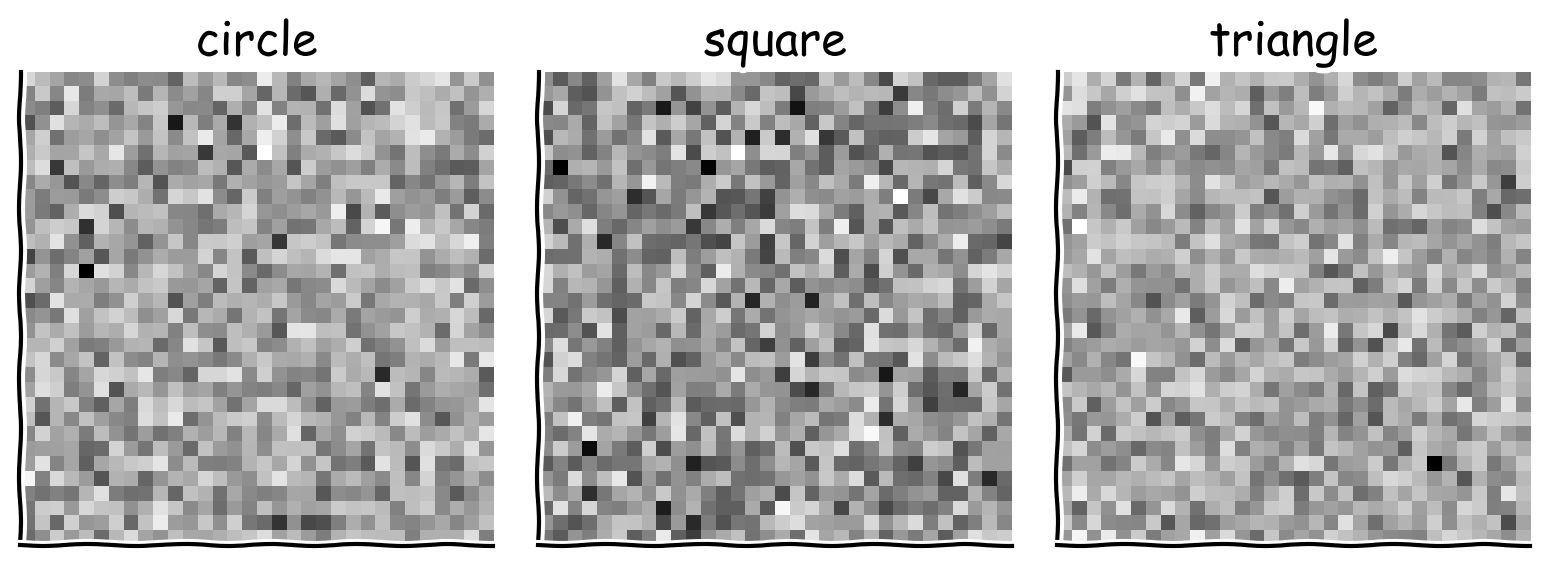

In [13]:
plot_vectors([circle, square, triangle], symbol_names)

As vectors are assigned randomly, no wonder that images do not display the assigned figure:) 

One of the extremely useful properties of random high-dimensional vectors is that they are approximately orthogonal.

This is an important aspect of VSAs, we will use the vector dot product to measure similarity between them. For discrete objects, they are either the same, or not, and given how we select the vectors, if they are the same they will have the dot product of 1, and if they are different concepts, they will have a dot product of (approximately) 0. 

Below we use the | operator to indicate similarity. This is borrowed from the bra-ket notation in physics, i.e.,

$$
\mathbf{a}\cdot\mathbf{b} = \langle \mathbf{a} \mid \mathbf{b}\rangle
$$

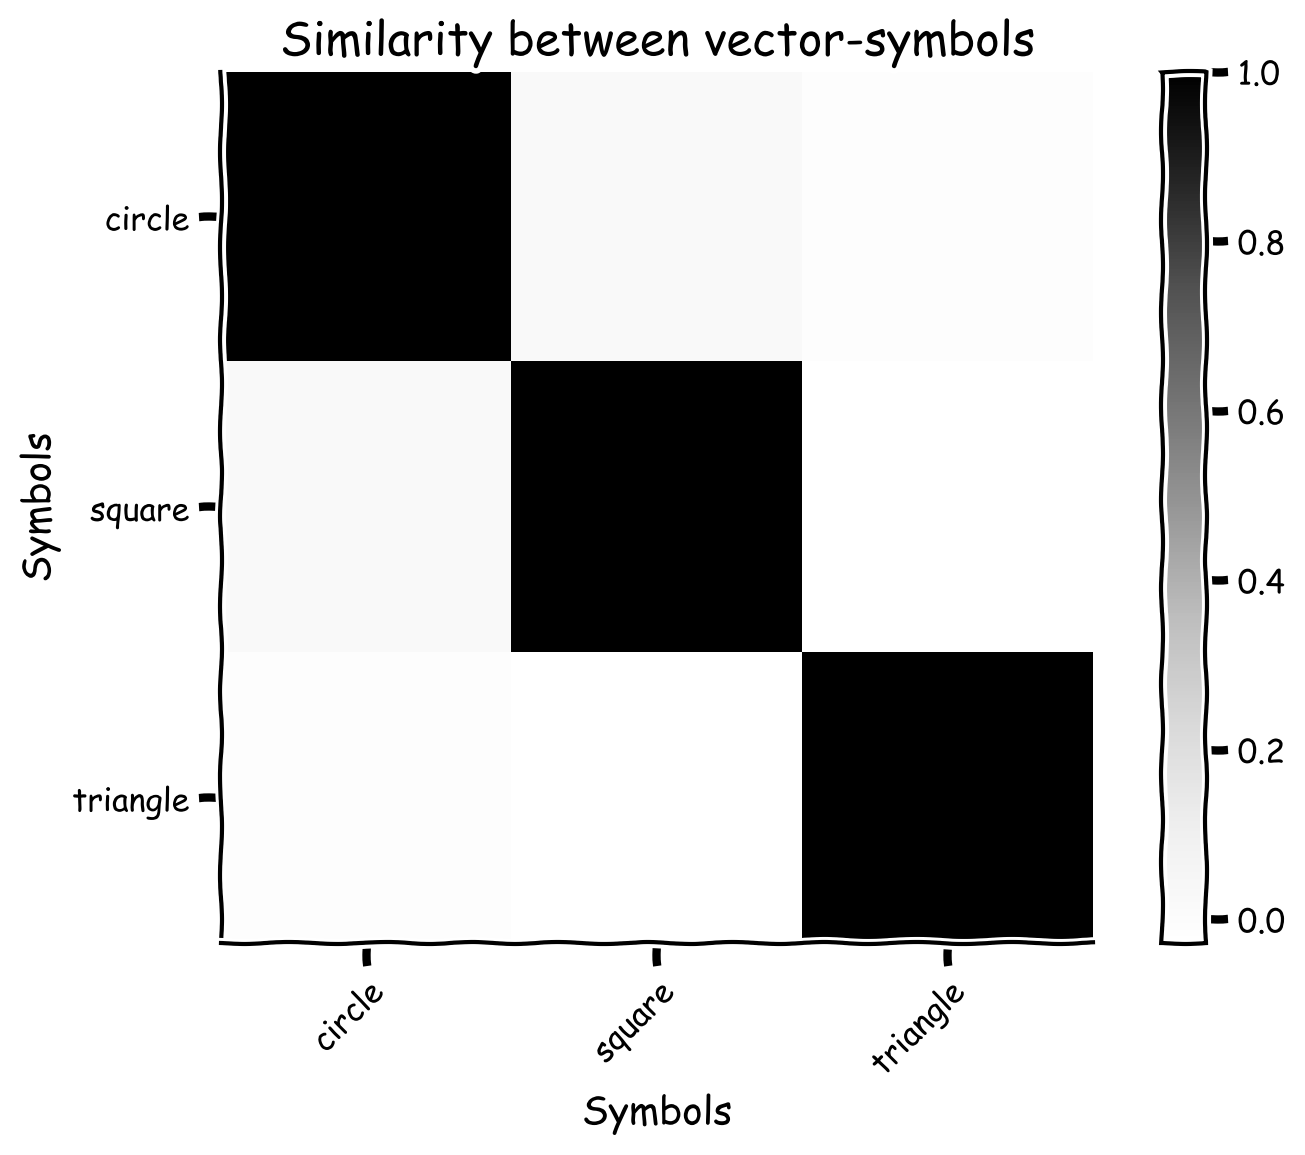

In [14]:
sim_mat = np.zeros((3,3))

sim_mat[0,0] = (circle | circle).item()
sim_mat[1,1] = (square | square).item()
sim_mat[2,2] = (triangle | triangle).item()

sim_mat[0,1] = sim_mat[1,0] = (circle | square).item()
sim_mat[0,2] = sim_mat[2,0] = (circle | triangle).item()
sim_mat[1,2] = sim_mat[2,1] = (square | triangle).item()

plot_similarity_matrix(sim_mat, symbol_names)

As you can see from the above figure, the three randomly selected vectors are approximately orthogonal. This will be important later when we go to make more complicated objects from our vectors.

In [15]:
# @title Submit your feedback
# content_review(f"{feedback_prefix}_geometric_concepts_high_dimensional_vectors")

### Coding Exercise 1 Discussion

1. How would you provide intuitive reasoning (or rigorous mathematical proof) behind the fact that random high-dimensional vectors (note that each of the components is drawn from uniform distribution with zero mean) approximately orthogonal?

In [16]:
#to_remove explanation

"""
Discussion: How would you provide intuitive reasoning or rigorous mathematical proof behind the fact that random high-dimensional vectors (note that each of the components is drawn from uniform distribution with zero mean) approximately orthogonal?

Observe that as each of the components are independent and they are sampled from distribution with zero mean, it means that expected value of dot product E(x*y) = E(\sum_i x_i * y_i) = (linearity of expectation) \sum_i E(x_i * y_i) = (independence) \sum_i (E(x_i) * E(y_i)) = 0.
""";

In [17]:
# @title Submit your feedback
# content_review(f"{feedback_prefix}_geometric_concepts_high_dimensional_vectors")

---

# Section 2: Bundling

Estimated timing to here from start of tutorial: 15 minutes

In this section we are going to explore bundling operation which allows us to construct vectors that represent something like sets. Basically, we combine two vectors into a new one that retains similarity to the previous two. We implement bundling using vector addition.

In [18]:
# @title Video 2: Bundling

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display

class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)

def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents

# video_ids = [('Youtube', '<video_id_1>'), ('Bilibili', '<video_id_2>'), ('Osf', '<video_id_3>')]
# tab_contents = display_videos(video_ids, W=854, H=480)
# tabs = widgets.Tab()
# tabs.children = tab_contents
# for i in range(len(tab_contents)):
#   tabs.set_title(i, video_ids[i][0])
# display(tabs)

In [19]:
# @title Submit your feedback
# content_review(f"{feedback_prefix}_bundling")

## Coding Exercise 2: Shape In-Between

Let's start with our previous example of different shapes (circle, square, and triangle) and use them to create a new object 'shape', which will represent all atomic concepts we've introduced.

In [20]:
shape = (circle + square + triangle).normalize()

Notice that we need to normalize the obtained vector. Now, let us calculate similarity matrix for the three default concepts and the new one.

In the exercise below, complete similarity matrix calculation.

In [ ]:
###################################################################
## Fill out the following then remove
raise NotImplementedError("Student exercise: complete calcualtion of similarity matrix.")
###################################################################

sim_mat = np.zeros((4,4))

sim_mat[0,0] = (... | circle).item()
sim_mat[1,1] = (square | ...).item()
sim_mat[2,2] = (triangle | ...).item()
sim_mat[3,3] = (... | ...).item()

sim_mat[0,1] = sim_mat[1,0] = (circle | square).item()
sim_mat[0,2] = sim_mat[2,0] = (circle | ...).item()
sim_mat[0,3] = sim_mat[3,0] = (... | shape).item()

sim_mat[1,2] = sim_mat[2,1] = (square | triangle).item()
sim_mat[1,3] = sim_mat[3,1] = (square | ...).item()

sim_mat[2,3] = sim_mat[3,2] = (triangle | shape).item()

plot_similarity_matrix(sim_mat, symbol_names + ["shape"])

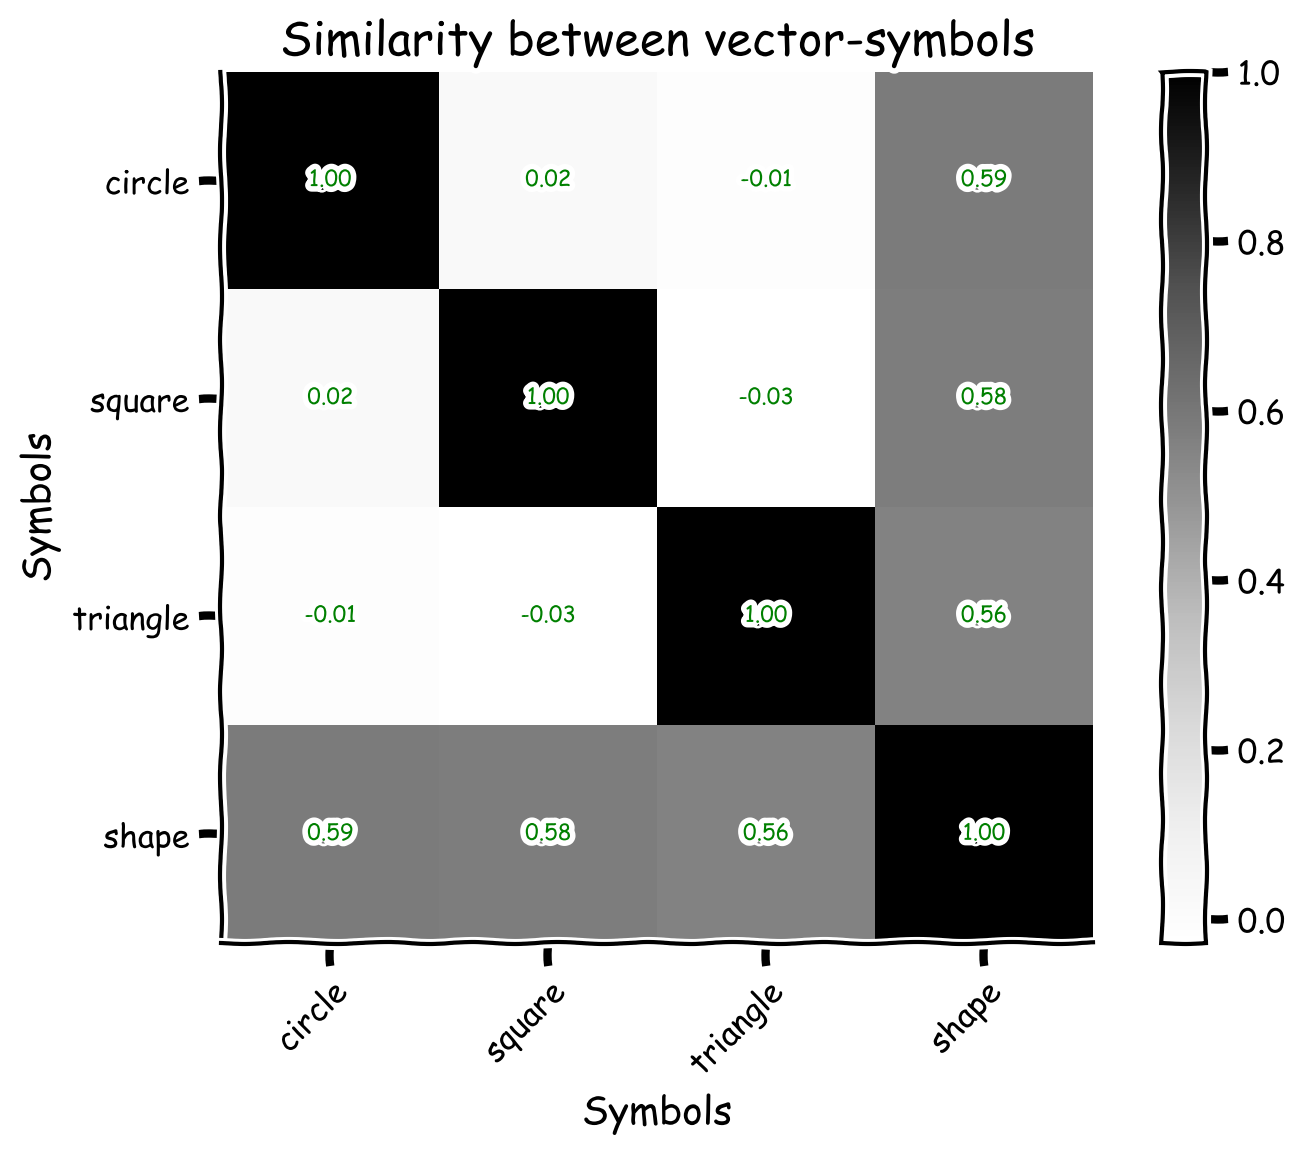

In [21]:
# to_remove solution

sim_mat = np.zeros((4,4))

sim_mat[0,0] = (circle | circle).item()
sim_mat[1,1] = (square | square).item()
sim_mat[2,2] = (triangle | triangle).item()
sim_mat[3,3] = (shape | shape).item()

sim_mat[0,1] = sim_mat[1,0] = (circle | square).item()
sim_mat[0,2] = sim_mat[2,0] = (circle | triangle).item()
sim_mat[0,3] = sim_mat[3,0] = (circle | shape).item()

sim_mat[1,2] = sim_mat[2,1] = (square | triangle).item()
sim_mat[1,3] = sim_mat[3,1] = (square | shape).item()

sim_mat[2,3] = sim_mat[3,2] = (triangle | shape).item()

plot_similarity_matrix(sim_mat, symbol_names + ["shape"], values = True)

Observe that as each of the default concepts were introduced equally in the definition of the shape, it shares the same similarity between all of them pairwise.

### Coding Exercise 2 Discussion

1. Why do we need to normalize the vector obtained in the result of bundling operation? What length do you expect to receive without normalization?

In [22]:
#to_remove explanation

"""
Discussion: Why do we need to normalize the vector obtained in the result of bundling operation? What length do you expect to receive without normalization?

We would like to preserve unitary length of the vector so it fits the rules of the vector space we've defined. If we simply add three vectors together we can calculate the resulted length by taking dot product with itself - it will be the sum of pairwise dot products of all vectors in the sum (with repetition of vectors with themselves), thus the sum is going to be around three (remember that <x, y> = 0 while <x, x> = 1), meaning that length of obtained vector is sqrt(3).
""";

In [58]:
# @title Submit your feedback
# content_review(f"{feedback_prefix}_shape_in_between")

---

# Section 3: Binding & Unbinding

Estimated timing to here from start of tutorial: 25 minutes

In this section we will talk about binding - an operation that takes two vectors and produces a new vector that is *not* similar to either of it's constituent elements.

In [63]:
# @title Video 3: Binding & Unbinding

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display

class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)

def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents

# video_ids = [('Youtube', '<video_id_1>'), ('Bilibili', '<video_id_2>'), ('Osf', '<video_id_3>')]
# tab_contents = display_videos(video_ids, W=854, H=480)
# tabs = widgets.Tab()
# tabs.children = tab_contents
# for i in range(len(tab_contents)):
#   tabs.set_title(i, video_ids[i][0])
# display(tabs)

In [ ]:
# @title Submit your feedback
# content_review(f"{feedback_prefix}_bunding_and_unbinding")

## Coding Exercise 3: Colorful Shapes

We can think of binding as an "and"-like operation. It needs both of the arguments to be the same to produce a similar vector. In this example, let's think about colors and shapes:

In [23]:
set_seed(42)

symbol_names = ['circle','square','triangle', 'red', 'blue', 'green']
discrete_space = sspspace.DiscreteSPSpace(symbol_names, ssp_dim=vector_length, optimize=False)

objs = {n:discrete_space.encode(np.array([n])) for n in symbol_names}

Now we are going to take two of the objects to make new ones: a red circle, a blue triangle and a green square.

We will combine the two primitive objects using the binding operation, which for us is implemented using circular convolution, and we denote it by 
$$
 a * b
$$

In the cell below, complete the missing concepts and then observe the computed similarity matrix.

In [ ]:
###################################################################
## Fill out the following then remove
raise NotImplementedError("Student exercise: complete derivation of new objects using binding operation.")
###################################################################

objs['red*circle'] = objs['red'] * ...
objs['blue*triangle'] = ... * objs['triangle']
objs['green*square'] = ... * objs['square']

In [24]:
# to_remove solution

objs['red*circle'] = objs['red'] * objs['circle']
objs['blue*triangle'] = objs['blue'] * objs['triangle']
objs['green*square'] = objs['green'] * objs['square']

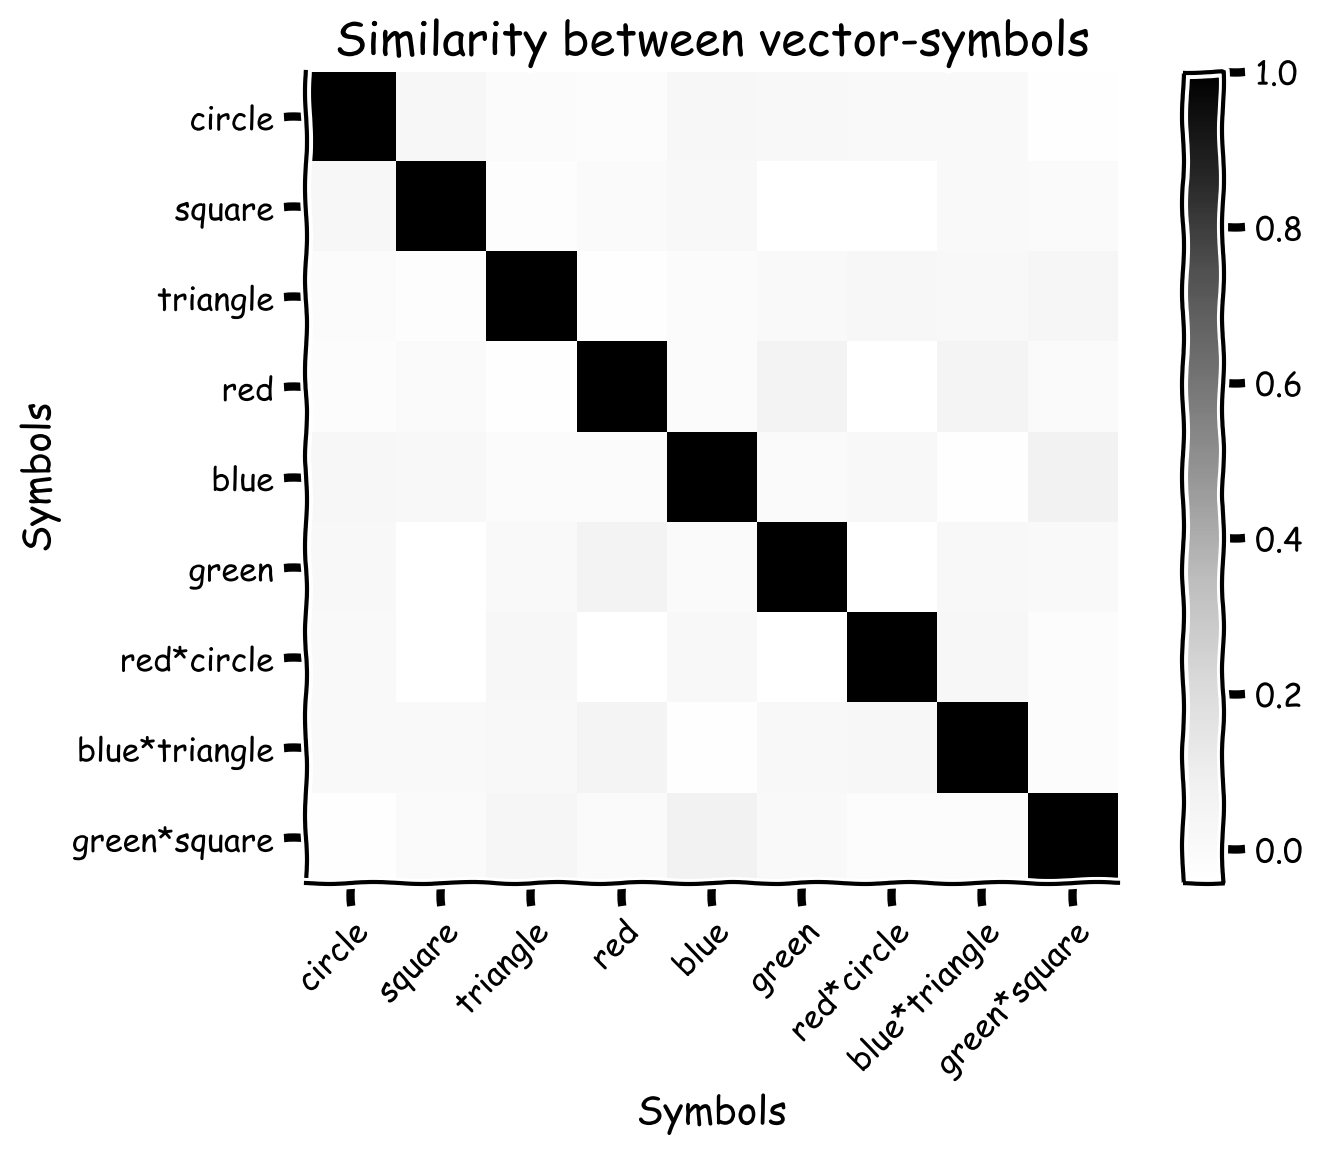

In [25]:
object_names = list(objs.keys())
sims = np.zeros((len(object_names), len(object_names)))

for name_idx, name in enumerate(object_names):
    for other_idx in range(name_idx, len(object_names)):
        sims[name_idx, other_idx] = sims[other_idx, name_idx] = (objs[name] | objs[object_names[other_idx]]).item()

plot_similarity_matrix(sims, object_names)

As you can see here, not only to the shapes and colours have no similarity, but the compound objects also have no similarity with either of their constituent elements - `green * square` is not similar to either `green` or `square`.

In [26]:
# @title Submit your feedback
# content_review(f"{feedback_prefix}_colorful_shapes")

## Coding Exercise 4: Foundations of Colorful Shapes

We can also undo the binding operation, which we call unbinding. It is implemented by binding with the pseduo-inverse of the vector we wish to unbind. We denote the pseudoinverse of the vector using the ~ symbol.


Consider the example of our red circle. If we wanted to recover the shape of the object, we will unbind from it the color:

$$
(\mathtt{red} * \mathtt{circle}) * \sim \mathtt{red} \approx \mathtt{circle}
$$

In the cell below unbind color and shape, and then observe the similarity matrix.

In [ ]:
object_names = ['red','red^','red*circle','circle','circle^']

###################################################################
## Fill out the following then remove
raise NotImplementedError("Student exercise: complete derivation of default objects using pseudoinverse.")
###################################################################

objs['red^'] = objs['red*circle'] * ~...
objs['circle^'] = ... * ...

In [27]:
# to_remove solution
object_names = ['red','red^','red*circle','circle','circle^']

objs['red^'] = objs['red*circle'] * ~objs['circle']
objs['circle^'] = objs['red*circle'] * ~objs['red']

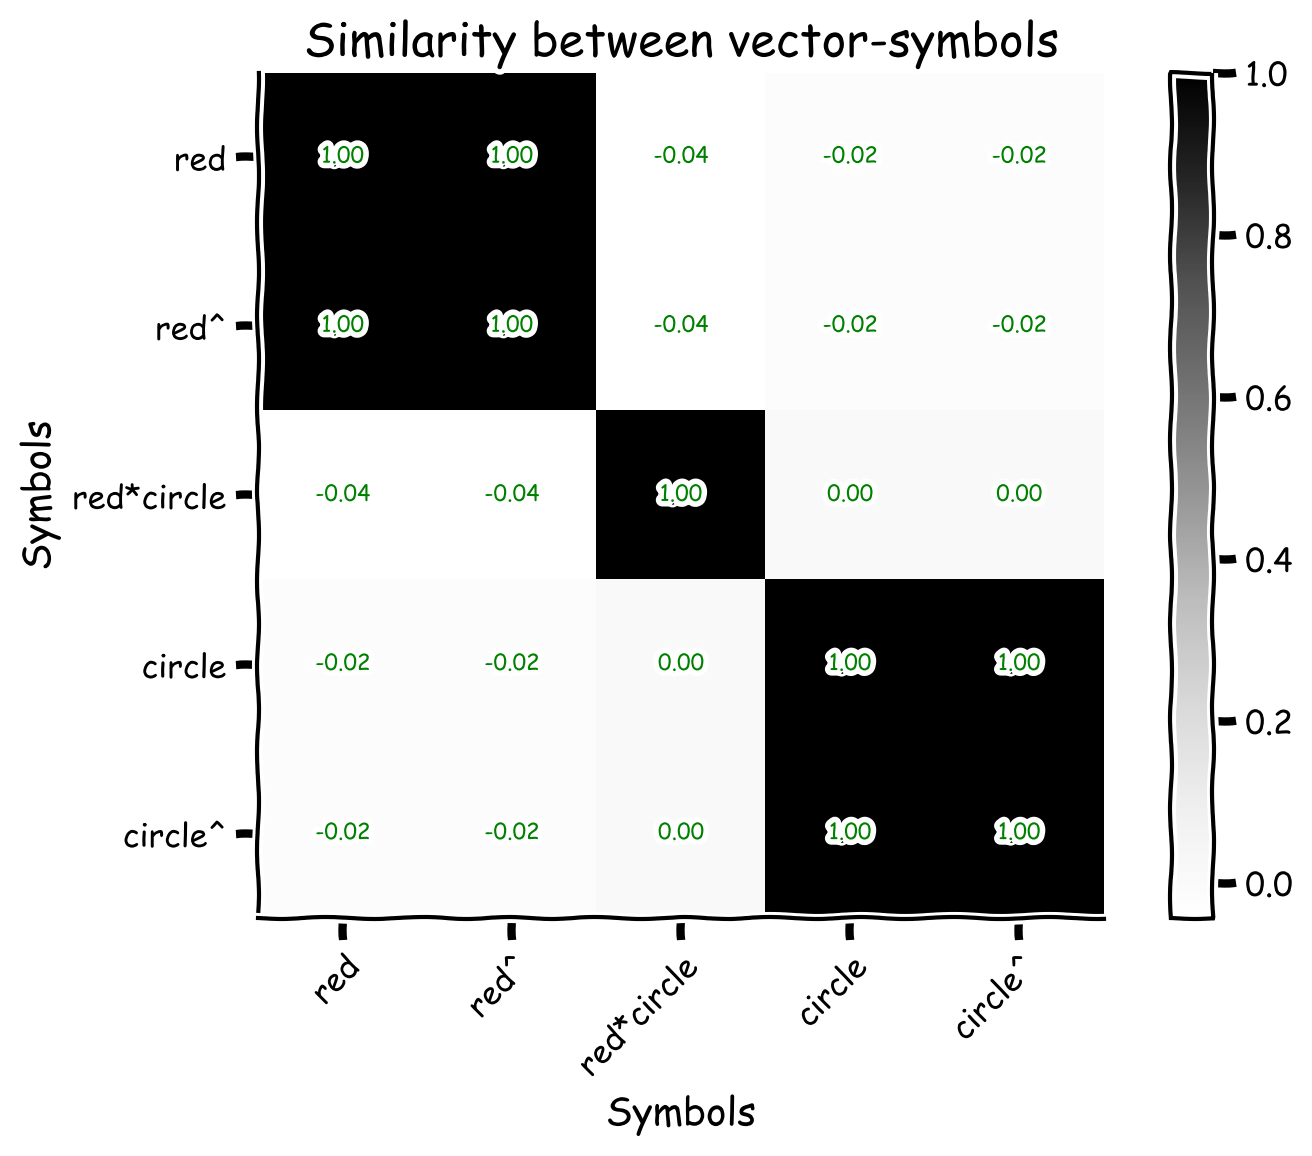

In [28]:
sims = np.zeros((len(object_names), len(object_names)))

for name_idx, name in enumerate(object_names):
    for other_idx in range(name_idx, len(object_names)):
        sims[name_idx, other_idx] = sims[other_idx, name_idx] = (objs[name] | objs[object_names[other_idx]]).item()

plot_similarity_matrix(sims, object_names, values = True)

Looking at the above graph, we can see that the compound red circle object is not similar to either of the elements, but the circle and the unbound circle are similar to one another, and the red and unbound red object are similar to one another.

With these elements together, we have constructed the basic tools we need to construct complex objects in the vector symbolic algebra.

---

# Section 4: Cleanup

Estimated timing to here from start of tutorial: 40 minutes

In this section we will address the issue of vectors being corrupted with noise.


In [ ]:
# @title Video 4: Cleanup

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display

class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)

def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents

# video_ids = [('Youtube', '<video_id_1>'), ('Bilibili', '<video_id_2>'), ('Osf', '<video_id_3>')]
# tab_contents = display_videos(video_ids, W=854, H=480)
# tabs = widgets.Tab()
# tabs.children = tab_contents
# for i in range(len(tab_contents)):
#   tabs.set_title(i, video_ids[i][0])
# display(tabs)

In [ ]:
# @title Submit your feedback
# content_review(f"{feedback_prefix}_cleanup")

## Coding Exercise 5: Cleanup Memories To Find The Best-Fit

In the process of computing with VSAs, the vectors themselves can become corrupted, due to noises (because we implement these systems with spiking neurons), or due to the approximations like using the pseudo inverse for unbinding, or because noise gets added when we operate on complex structures.

To address this problem we employ "cleanup memories".  There are lots of ways to implement these systems, but today we're going to do it with a single hidden layer neural network.  Lets start with a sequence of symbols, say $\texttt{fire-fighter},\texttt{math-teacher},\texttt{sales-manager},$ and so on, in that fashion, and create a new vector that is a corrupted combination of all three.  We will then use a clean up memory to find the best fitting vector in our vocabulary.

In the cell below you will see the definition of `noisy_vector`, your task is to complete the calculation of similarity values for this vector and all default ones.


In [ ]:
set_seed(42)

symbol_names = ['fire-fighter','math-teacher','sales-manager']
discrete_space = sspspace.DiscreteSPSpace(symbol_names, ssp_dim=1024, optimize=False)

vocab = {n:discrete_space.encode(n) for n in symbol_names}

noisy_vector = 0.2 * vocab['fire-fighter'] + 0.15 * vocab['math-teacher'] + 0.3 * vocab['sales-manager']

###################################################################
## Fill out the following then remove
raise NotImplementedError("Student exercise: complete derivation of default objects using pseudoinverse.")
###################################################################

sims = np.array([noisy_vector | vocab[...] for ... in ...]).squeeze()

In [29]:
#to_remove solution

set_seed(42)

symbol_names = ['fire-fighter','math-teacher','sales-manager']
discrete_space = sspspace.DiscreteSPSpace(symbol_names, ssp_dim=1024, optimize=False)

vocab = {n:discrete_space.encode(n) for n in symbol_names}

noisy_vector = 0.2 * vocab['fire-fighter'] + 0.15 * vocab['math-teacher'] + 0.3 * vocab['sales-manager']

sims = np.array([noisy_vector | vocab[name] for name in symbol_names]).squeeze()

Another graphical way to represent the similarity is by putting similarity value on the y-axis (instead of the box in the grid) and represent each of the objects by line (x-axis stay the same and similarity takes place between corresponding label on x-axis and line-object).

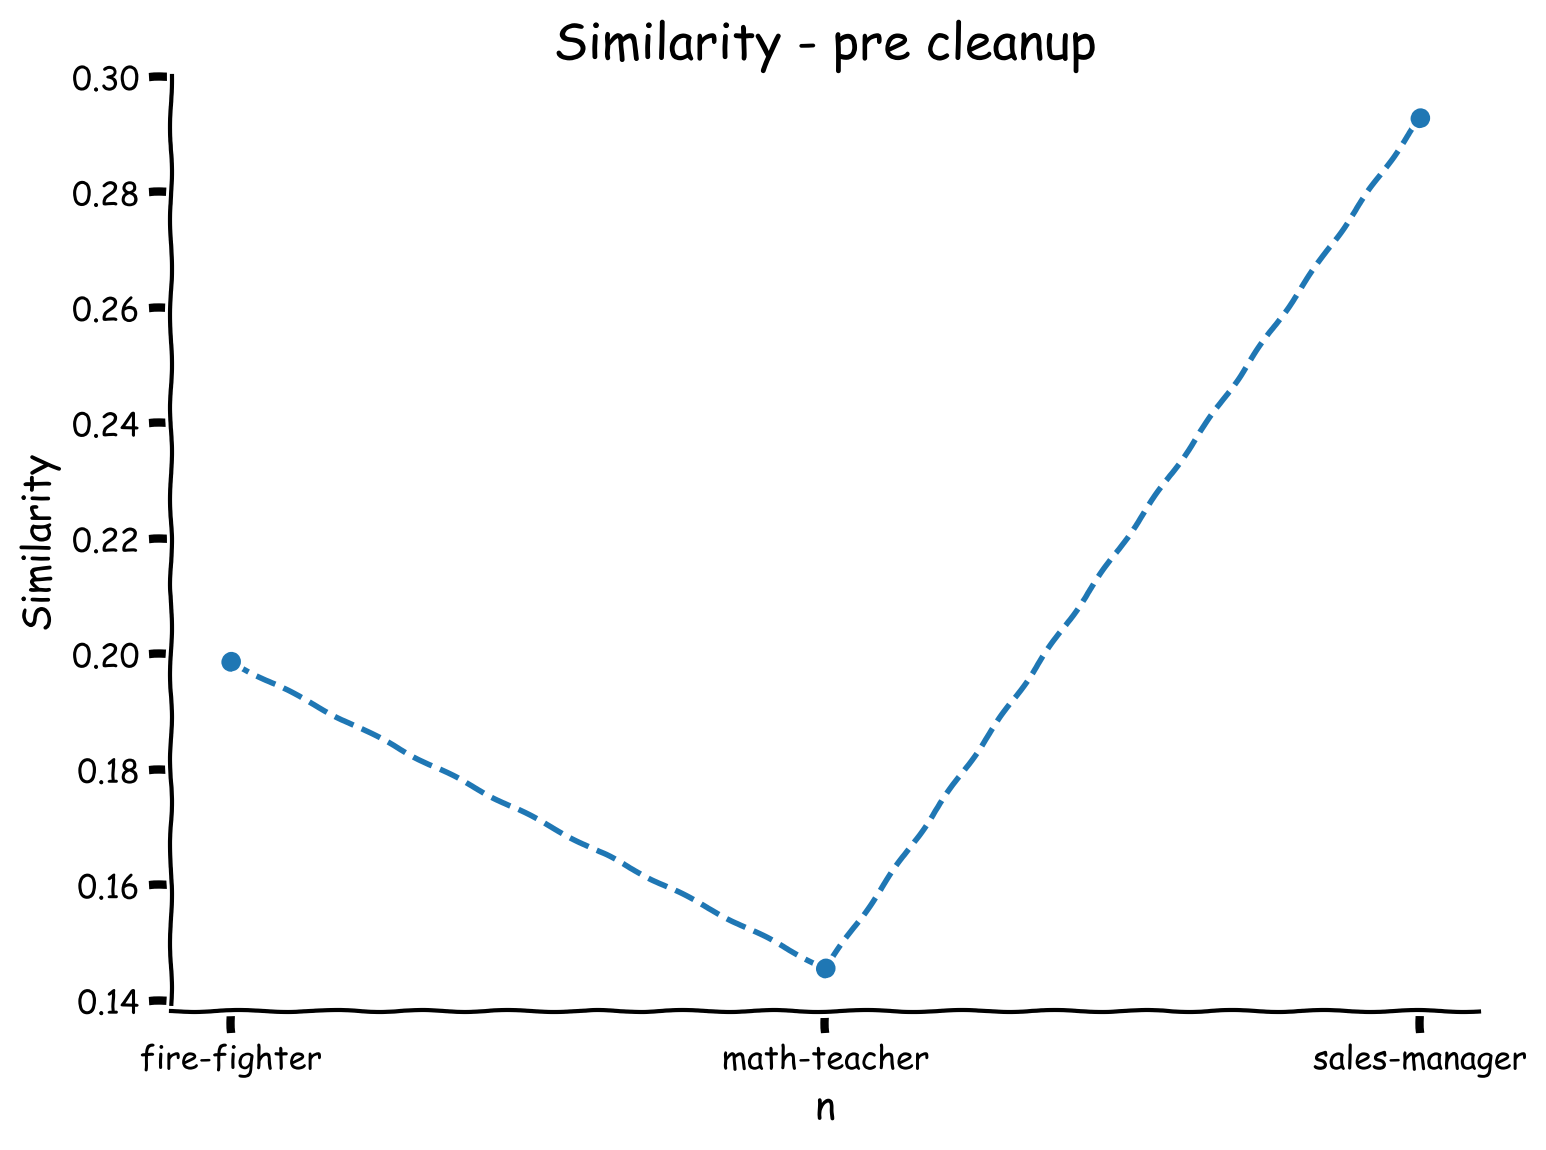

In [30]:
plot_line_similarity_matrix(sims, symbol_names, multiple_objects = False, title = 'Similarity - pre cleanup')

Now let's construct a simple neural network that does cleanup.  We will construct the network, instead of learning it.  The input weights will be the vectors in the vocabulary, and we will place a softmax function on the hidden layer (although we can use more biologically plausible activiations) and the output weights will again be the vectors representing the symbols in the vocabulary.

For efficient implementation of similarity calculation inside network, we will use `np.einsum()` function. Typically, it is used as `output = np.einsum('dim_inp1, dim_inp2 -> dim_out', input1, input2)`

In this notation, `nd,md->nm` is the einsum "equation" or "subscript notation" which describes what operation should be performed. In this particular case, it states that the first input tensor is of shape `(n, d)` while the second is of shape `(m, d)` and the result of operation is of shape `(n, m)` (note that `n` and `m` can coincide). The operation itself performs the following calcualtion: `output[n, m] = sum(input1[n, d] * input2[m, d])`, meaning that in our case it will calculate all pairwise dot products - exactly what we need for similarity!

Your task is to complete `__call__` function. Then we calculate similarity between obtained vector and the ones in the vocabulary.

In [ ]:
###################################################################
## Fill out the following then remove
raise NotImplementedError("Student exercise: complete Cleanup class.")
###################################################################

set_seed(42)

class Cleanup:
    def __init__(self, vocab, temperature=1e5):
        self.weights = np.array([vocab[k] for k in vocab.keys()]).squeeze()
        self.temp = temperature
    def __call__(self, x):
        sims = np.einsum('nd,md->nm', ..., x)
        max_sim = softmax(... * self.temp, axis=0)
        return sspspace.SSP(np.einsum('nd,nm->md', self.weights, ...))
    
    
cleanup = Cleanup(vocab)

clean_vector = cleanup(noisy_vector)

clean_sims = np.array([clean_vector | vocab[name] for name in symbol_names]).squeeze()

In [32]:
#to_remove solution

set_seed(42)

class Cleanup:
    def __init__(self, vocab, temperature=1e5):
        self.weights = np.array([vocab[k] for k in vocab.keys()]).squeeze()
        self.temp = temperature
    def __call__(self, x):
        sims = np.einsum('nd,md->nm', self.weights, x)
        max_sim = softmax(sims * self.temp, axis=0)
        return sspspace.SSP(np.einsum('nd,nm->md', self.weights, max_sim))
    
    
cleanup = Cleanup(vocab)

clean_vector = cleanup(noisy_vector)

clean_sims = np.array([clean_vector | vocab[name] for name in symbol_names]).squeeze()

Observe the result with comparison to the pre cleanup metrics.

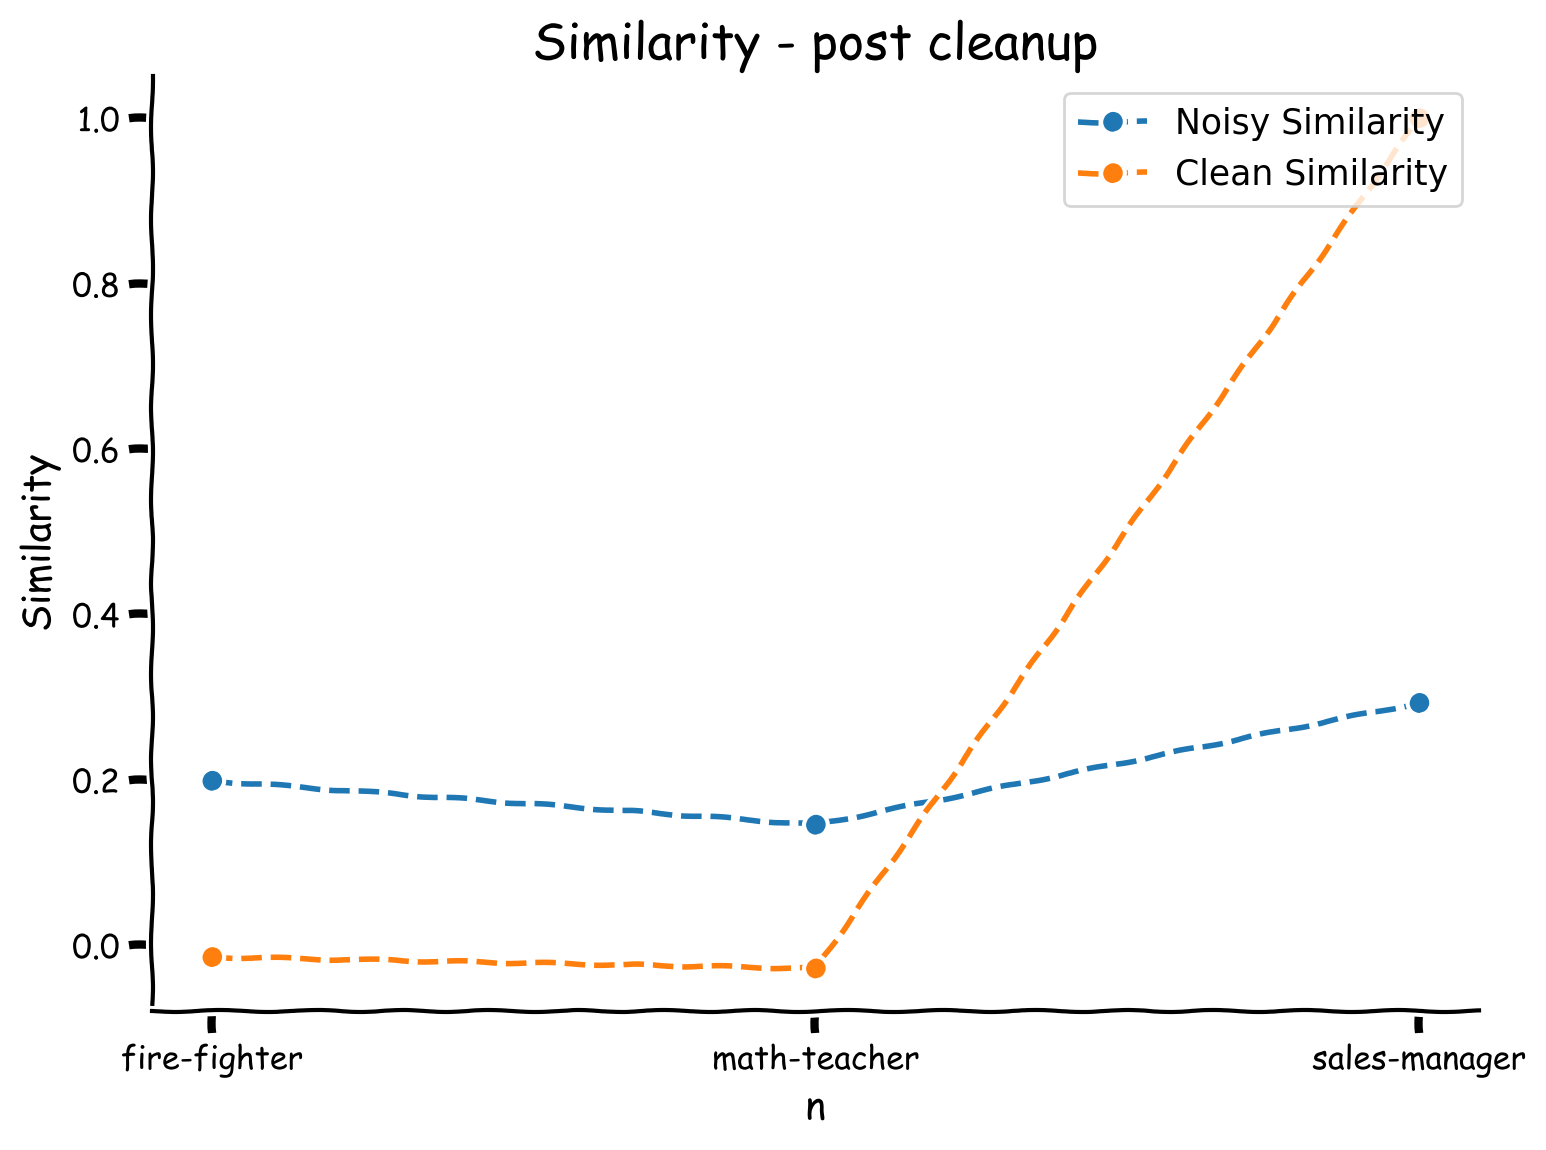

In [33]:
plot_double_line_similarity_matrix([sims, clean_sims], symbol_names, ['Noisy Similarity', 'Clean Similarity'], title = 'Similarity - post cleanup')

We can do this cleanup with a single, feed-forward network, and we don't need to learn any of the synaptic weights if we know what the appropriate vocabulary is.

In [121]:
# @title Submit your feedback
# content_review(f"{feedback_prefix}_cleanup_memories_to_find_the_best_fit")

---

# Section 5: Iterated Binding

Estimated timing to here from start of tutorial: 50 minutes

In this section we will represent numbers with iterated binding.


In [ ]:
# @title Video 5: Iterated Binding

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display

class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)

def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents

# video_ids = [('Youtube', '<video_id_1>'), ('Bilibili', '<video_id_2>'), ('Osf', '<video_id_3>')]
# tab_contents = display_videos(video_ids, W=854, H=480)
# tabs = widgets.Tab()
# tabs.children = tab_contents
# for i in range(len(tab_contents)):
#   tabs.set_title(i, video_ids[i][0])
# display(tabs)

In [72]:
# @title Submit your feedback
# content_review(f"{feedback_prefix}_iterated_binding")

## Coding Exercise 6: Representing Numbers

It is often useful to be able to represent numbers.  For example, we may want to represent the position of an object in a list, or we may want to represent the coordinates of an object in a grid.  To do this we use the binding operator to construct a vector that represents a number.  We start by picking what we refer to as an "axis vector", let's call it $\texttt{one}$, and then iteratively apply binding, like this:

$$
\texttt{two} = \texttt{one}\circledast\texttt{one} 
$$
$$
\texttt{three} = \texttt{two}\circledast\texttt{one} = \texttt{one}\circledast\texttt{one}\circledast\texttt{one}
$$

and so on.  We extend that to arbitrary integers, $n$, by writing:

$$
\phi[n] = \underset{i=1}{\overset{n}{\circledast}}\texttt{one}
$$

Let's try that now and see how similarity between iteratively bound vectors develops. In the cell below you should complete missing part which implements iterative binding mechanism.

In [ ]:
set_seed(42)

#define axis vector
axis_vectors = ['one']

encoder = sspspace.DiscreteSPSpace(axis_vectors, ssp_dim=1024, optimize=False)

#vocabulary
vocab = {w:encoder.encode(w) for w in axis_vectors}

#we will add new vectors to this list
integers = [vocab['one']]

###################################################################
## Fill out the following then remove
raise NotImplementedError("Student exercise: complete iterated binding.")
###################################################################

max_int = 5
for i in range(2, ... + 1):
    integers.append(integers[...] * vocab[...])

In [34]:
#to_remove solution
set_seed(42)

#define axis vector
axis_vectors = ['one']

encoder = sspspace.DiscreteSPSpace(axis_vectors, ssp_dim=1024, optimize=False)

#vocabulary
vocab = {w:encoder.encode(w) for w in axis_vectors}

#we will add new vectors to this list
integers = [vocab['one']]

max_int = 5
for i in range(2, max_int + 1):
    integers.append(integers[-1] * vocab['one'])

Now, we will observe the similarity metric between the obtained vectors. In order to efficienty implement it, we will use already introduced `np.einsum` function.

In [35]:
integers = np.array(integers).squeeze()
sims = np.einsum('nd,md->nm',integers,integers)

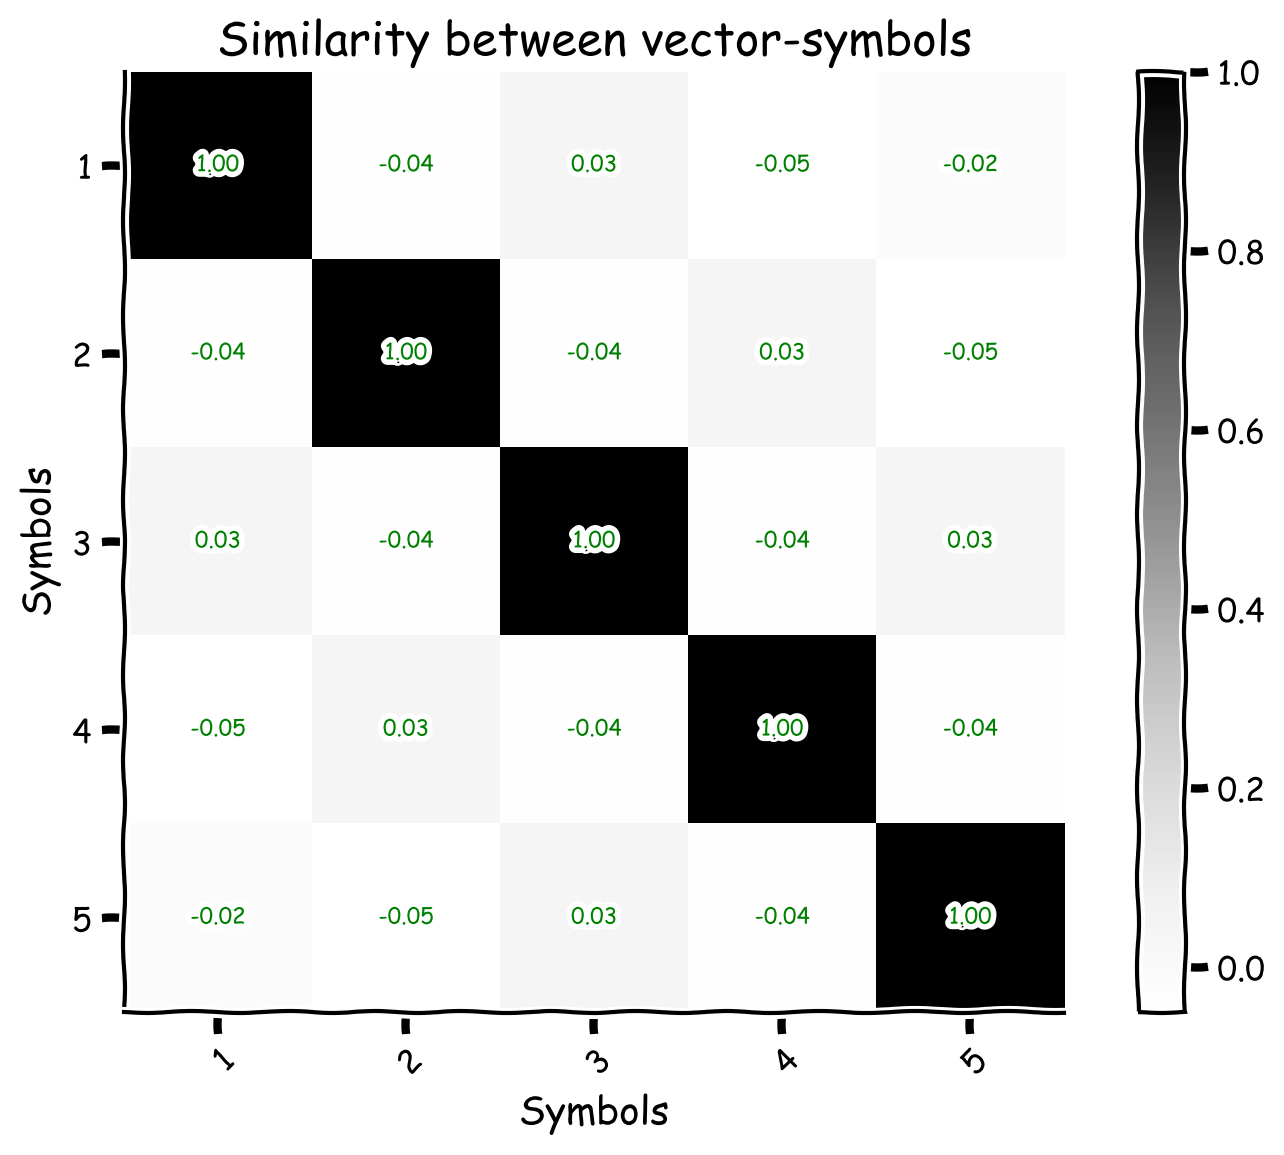

In [36]:
plot_similarity_matrix(sims, [i for i in range(1, 6)], values = True)

Here, we will take a look at another graphical representation of the similarity through lines (the only difference with the previous section is the fact that here we will have a couple of them, each representing distinct concept).

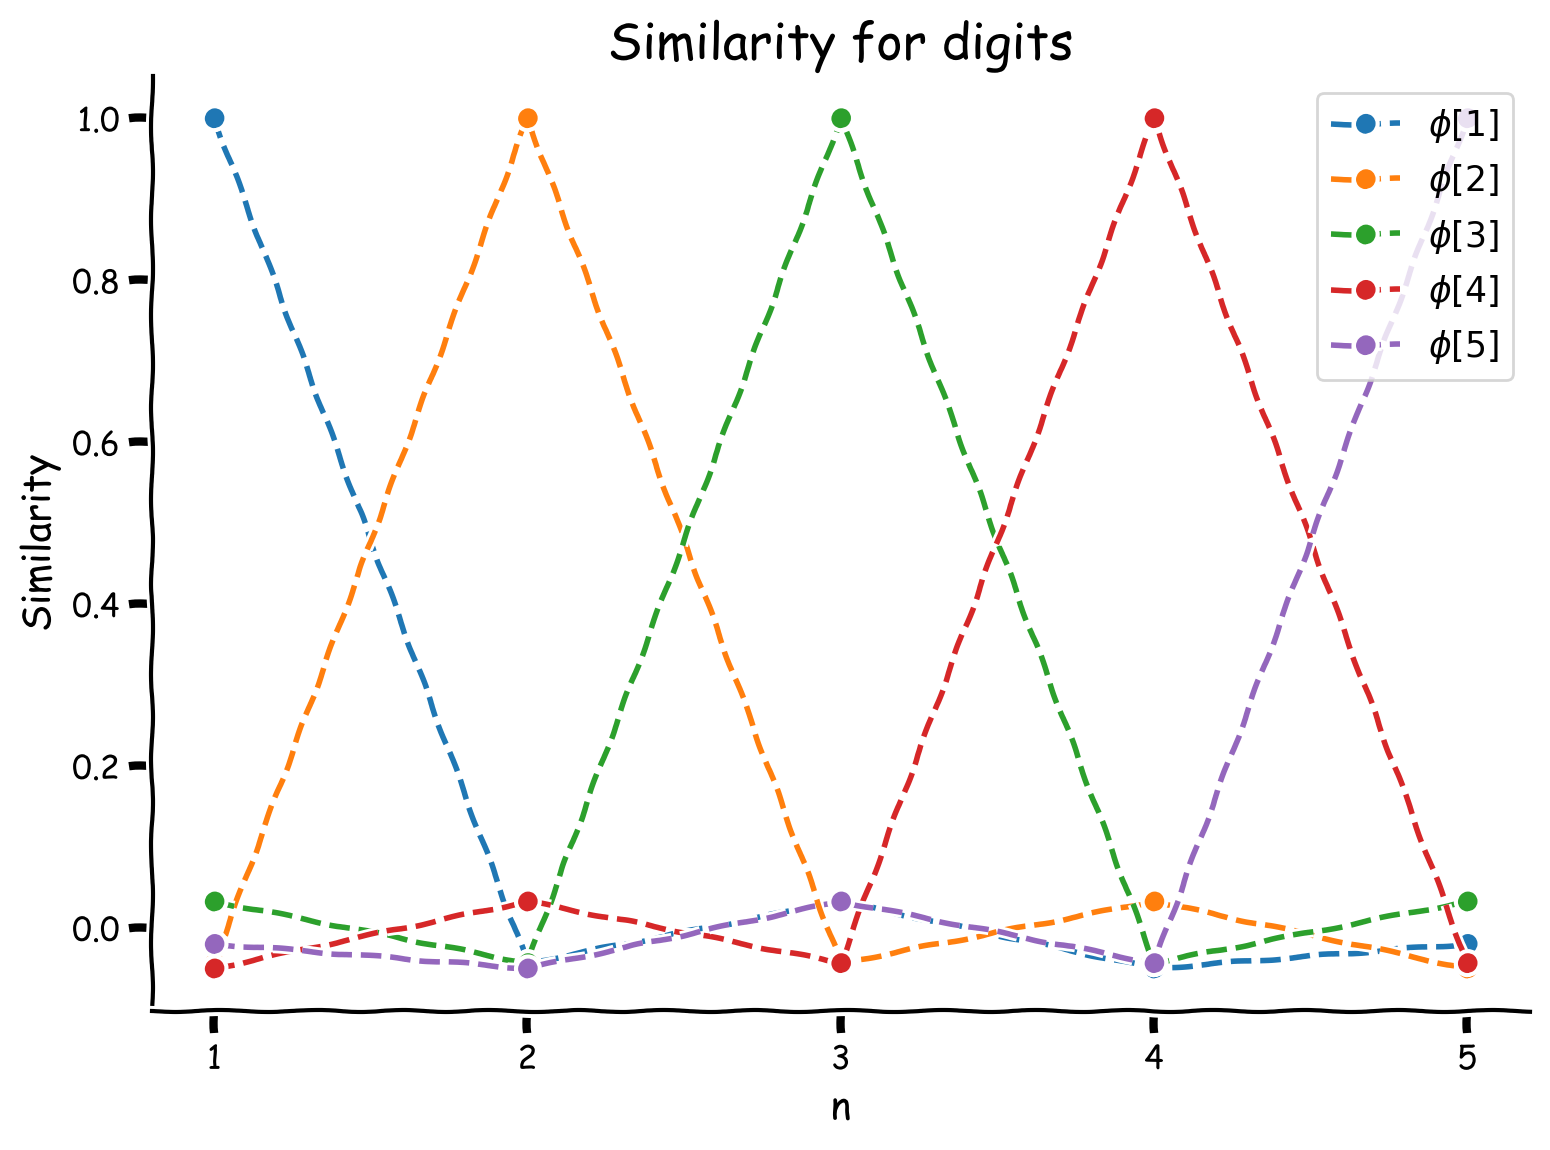

In [37]:
plot_line_similarity_matrix(sims, range(1, 6), multiple_objects = True, labels = [f'$\phi$[{idx+1}]' for idx in range(5)], title = "Similarity for digits")

What we can see here is that each number acts like it's own vector, they are highly dissimilar, but we can still do arithmetic with them.  Let's see what happens when we unbind $\texttt{two}$ from $\texttt{five}$.

In the cell below you are invited to complete the missing parts (be attentive! python is zero-indexed, thus you need to choose correct indices).

In [ ]:
###################################################################
## Fill out the following then remove
raise NotImplementedError("Student exercise: unbinding of two from five and apply `einsum` function on the correct arrays to receive desired similarity.")
###################################################################

five_unbind_two = sspspace.SSP(integers[...]) * ~sspspace.SSP(integers[...])
sims = np.einsum('nd,md->nm', ..., ...)

In [38]:
#to_remove solution

five_unbind_two = sspspace.SSP(integers[4]) * ~sspspace.SSP(integers[1])
sims = np.einsum('nd,md->nm', five_unbind_two, integers)

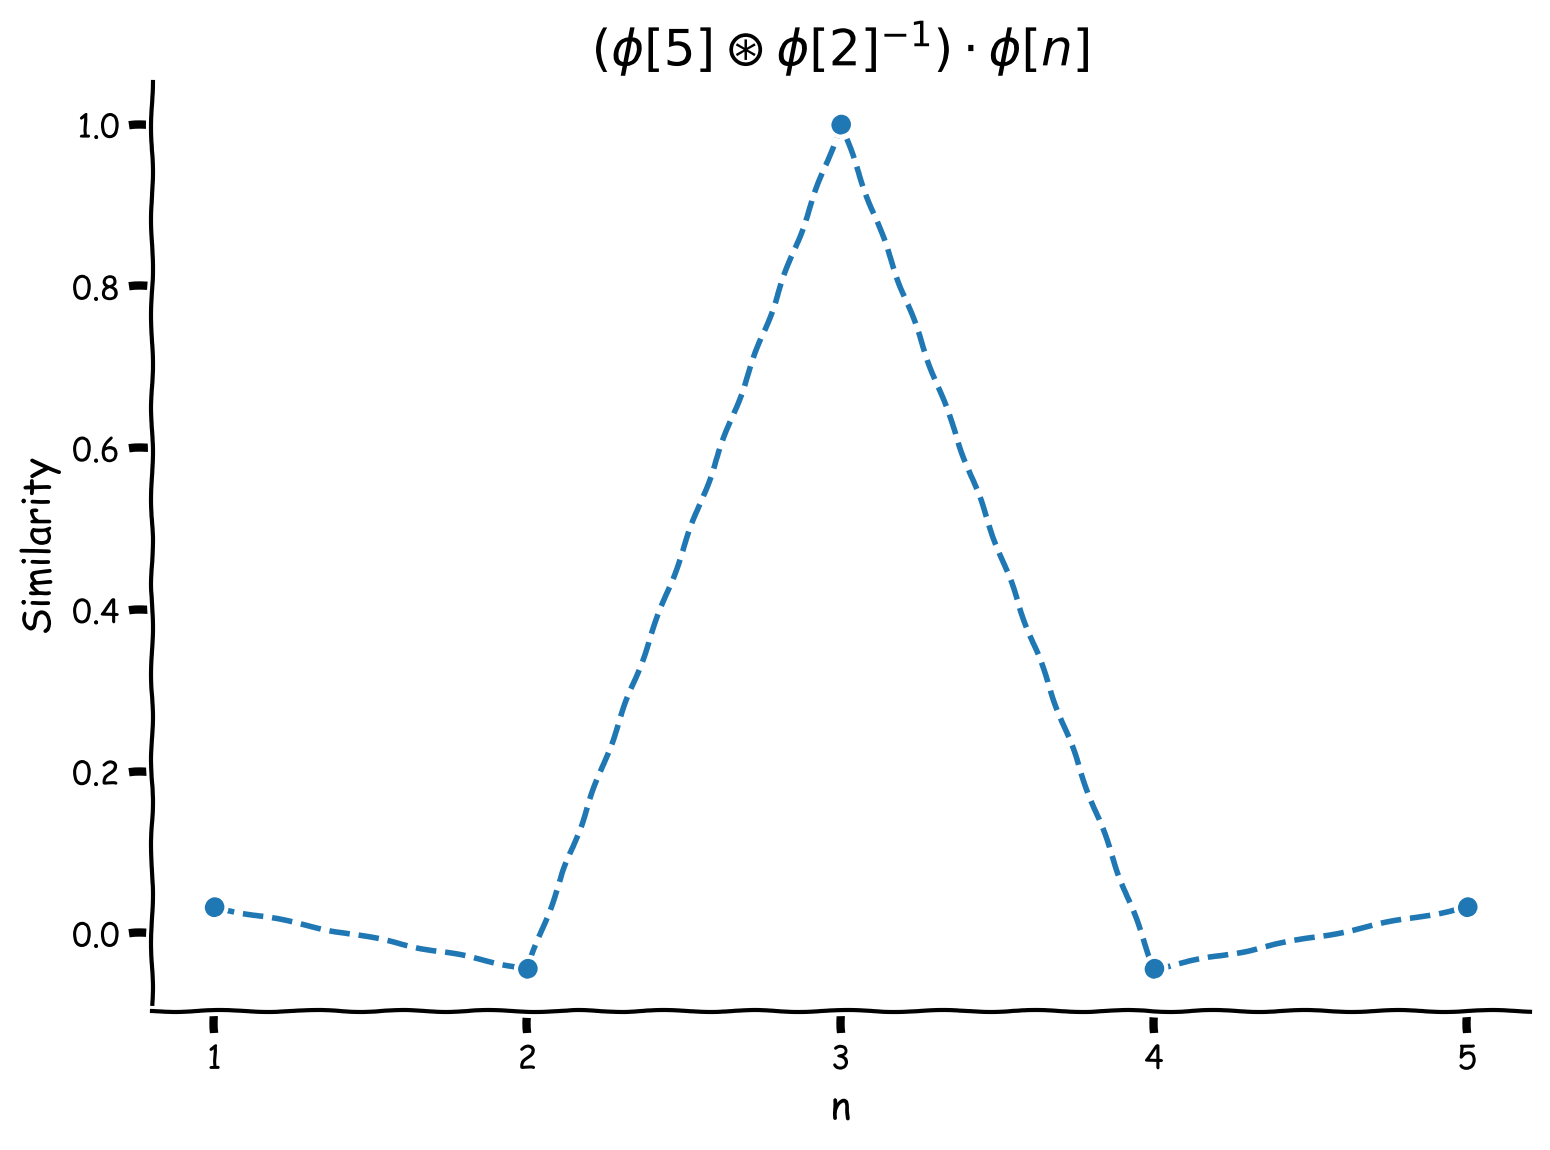

In [39]:
plot_line_similarity_matrix(sims, range(1, 6), multiple_objects = False,  title = '$(\phi[5]\circledast \phi[2]^{-1}) \cdot \phi[n]$')

We get what we expected - when we removed $\texttt{two}$ from $\texttt{five}$ we get a vector that is similar to $\texttt{three}$.  We can do arithmetic with our vector encoding!

In [ ]:
# @title Submit your feedback
# content_review(f"{feedback_prefix}_representing_numbers")

## Coding Exercise 7: Beyond Binding Integers

This is all well and good, but sometimes we want to encode values that are not integers.  Is there an easy way to do this?  You'll be surprised to learn that the answer is: yes.

We actually use the same technique, but we recognize that iterated binding can be implemented in the Fourier domain:

$$
\phi[n] = \mathcal{F}^{-1}\left\{\mathcal{F}\left\{\texttt{one}\right\}^{n}\right\}
$$

where the power of $n$ in the Fourier domain is applied element-wise to the vector.  To encode real-valued data we simply let the integer value, $n$, be a real-valued vector, $x$, and we let the axis vector be a randomly generated vector, $X$. 

$$
\phi(x) = \mathcal{F}^{-1}\left\{\mathcal{F}\left\{X\right\}^{x}\right\}
$$

We call vectors that represent real-valued data Spatial Semantic Pointers (SSPs).  We can also extend this to multi-dimensional data by binding different SSPs together.

$$
\phi(x,y) = \phi_{X}(x) \circledast \phi_{Y}(y)
$$


In the $\texttt{sspspace}$ library we provide an encoder for real- and integer-valued data, and we'll demonstrate it next by encoding a bunch of points in the range $[-4,4]$ and comparing their value to $0$, encoded a SSP.

In the cell below you should complete similarity calculation by injecting correct index for $0$ element (observe that it is right in the middle of encoded array).

In [88]:
###################################################################
## Fill out the following then remove
raise NotImplementedError("Student exercise: complete similarity calculation: correct index for `0` and array.")
###################################################################

set_seed(42)
encoder = sspspace.RandomSSPSpace(domain_dim=1, ssp_dim=1024)

xs = np.linspace(-4,4,401)[:,None] #we expect the encoded values to be two-dimensional in `encoder.encode()` so we add extra dimension
phis = encoder.encode(xs)

sims = np.einsum('d,md->m', phis[..., :], ...)

In [40]:
#to_remove solution

set_seed(42)
encoder = sspspace.RandomSSPSpace(domain_dim=1, ssp_dim=1024)

xs = np.linspace(-4,4,401)[:,None] #we expect the encoded values to be two-dimensional in `encoder.encode()` so we add extra dimension
phis = encoder.encode(xs)

sims = np.einsum('d,md->m', phis[200, :], phis)

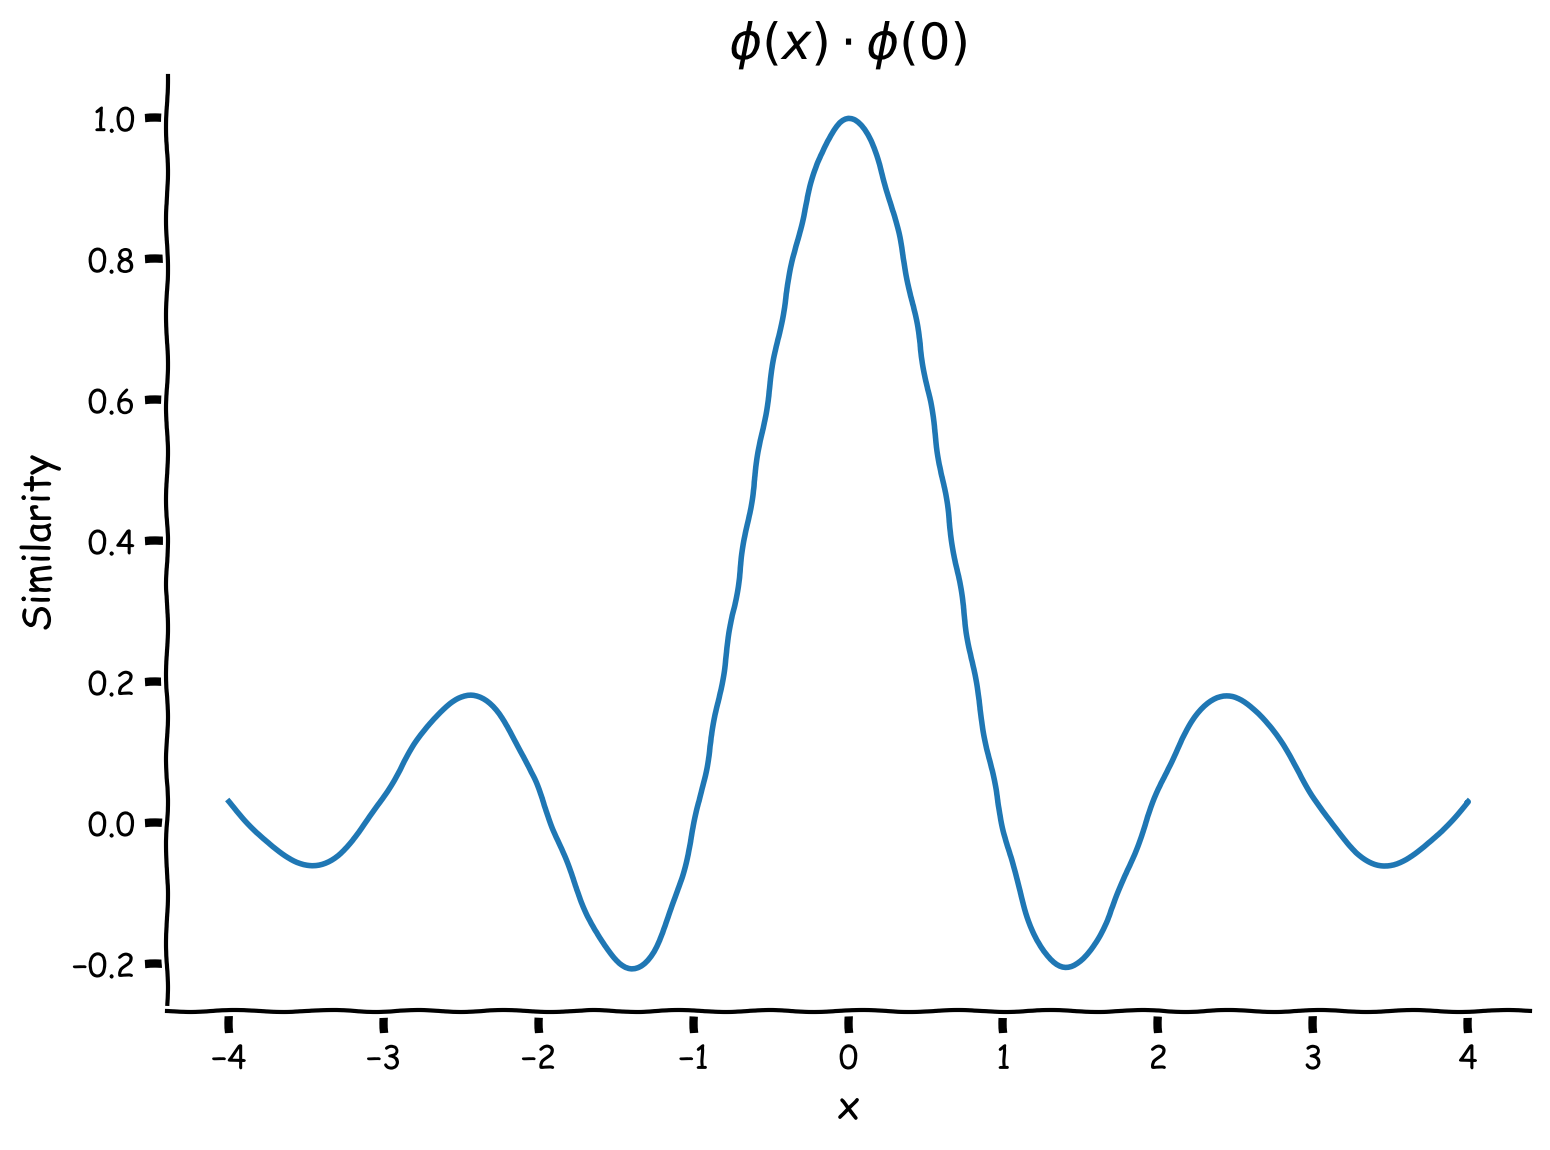

In [41]:
plot_real_valued_line_similarity(sims, xs, title = '$\phi(x)\cdot\phi(0)$')

As with the integers, we can update the values, post-encoding through the binding operation.  Let's look at the similarity between all the points in the range $[-4,4]$ this time with the value $\pi/2$, but we will shift it by binding the origin with the desired shift value.

In the cell below you need to provide the value by which we are going to shift the origin.

In [ ]:
###################################################################
## Fill out the following then remove
raise NotImplementedError("Student exercise: provide value to shift and observe the usage of the operation.")
###################################################################

phi_shifted = phis[200,:][None,:] * encoder.encode([[...]])
sims = np.einsum('d,md->m',phi_shifted.flatten(),phis)

In [43]:
#to_remove solution

phi_shifted = phis[200,:][None,:] * encoder.encode([[np.pi/2]])
sims = np.einsum('d,md->m',phi_shifted.flatten(),phis)

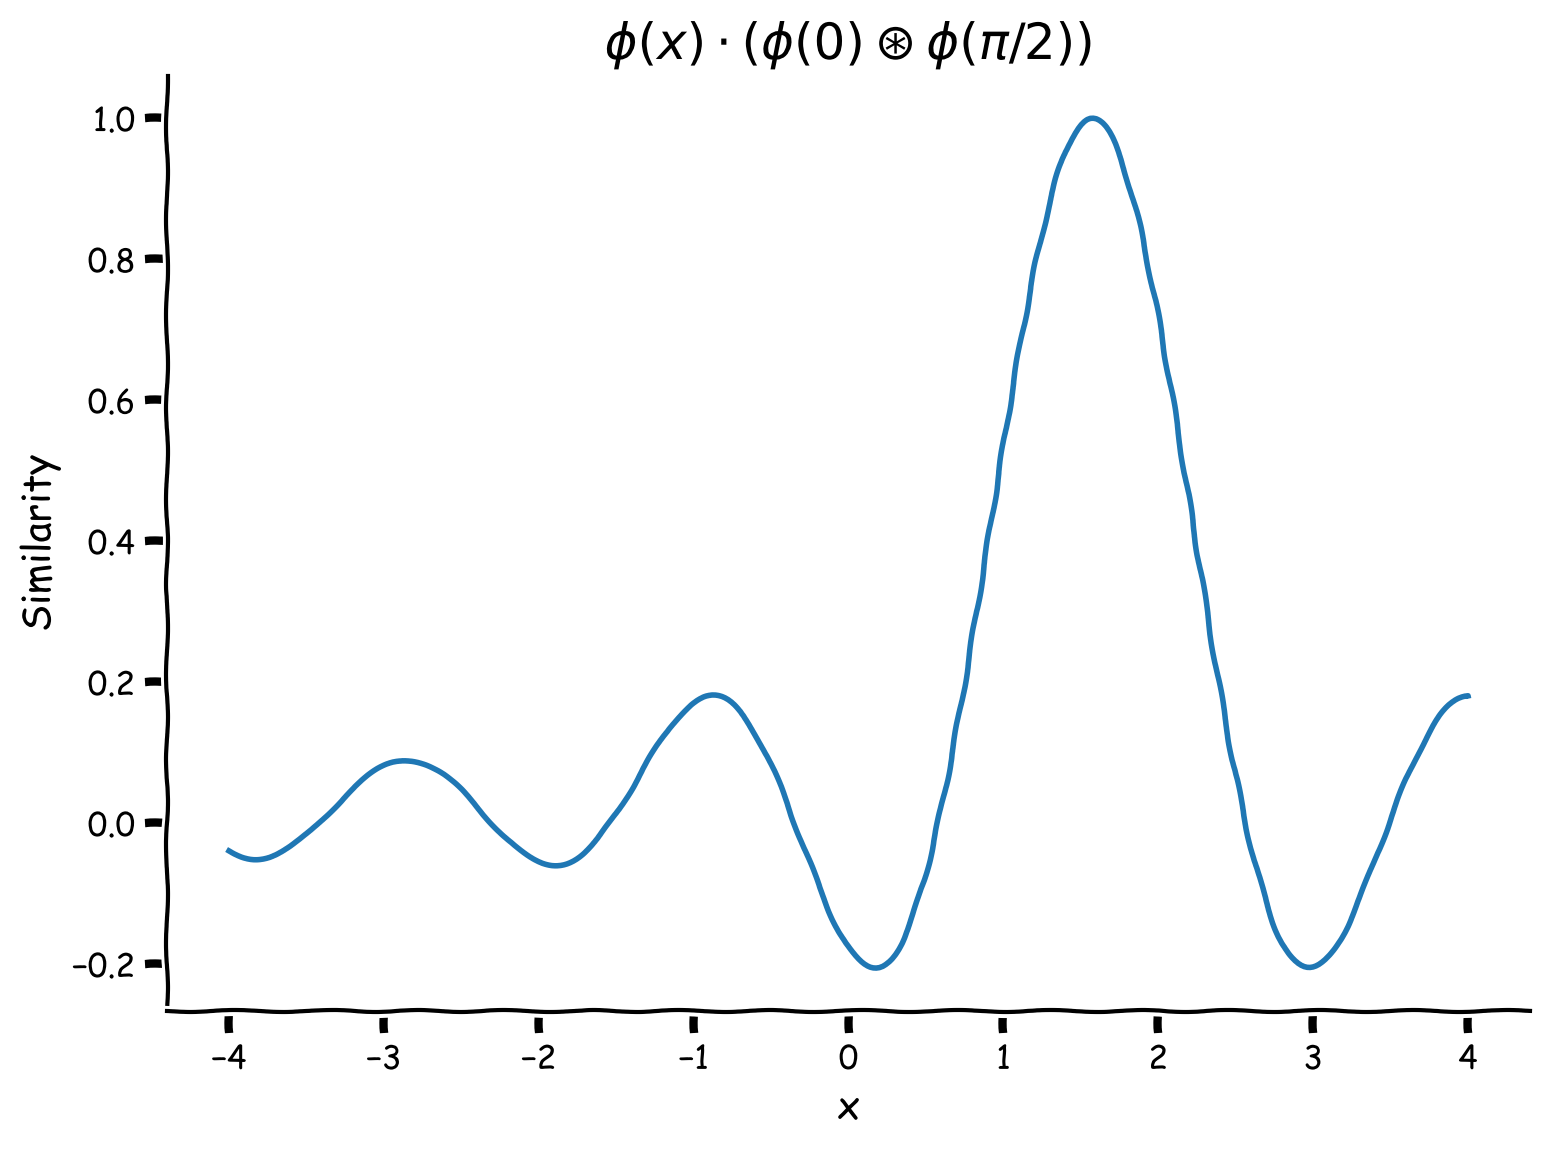

In [44]:
plot_real_valued_line_similarity(sims, xs, title = '$\phi(x)\cdot(\phi(0)\circledast\phi(\pi/2))$')

We can then take that vector and shift it again to a new location.

In [45]:
phi_shifted = phis[200,:][None,:] * encoder.encode([[-1.5*np.pi]])
sims = np.einsum('d,md->m',phi_shifted.flatten(),phis)

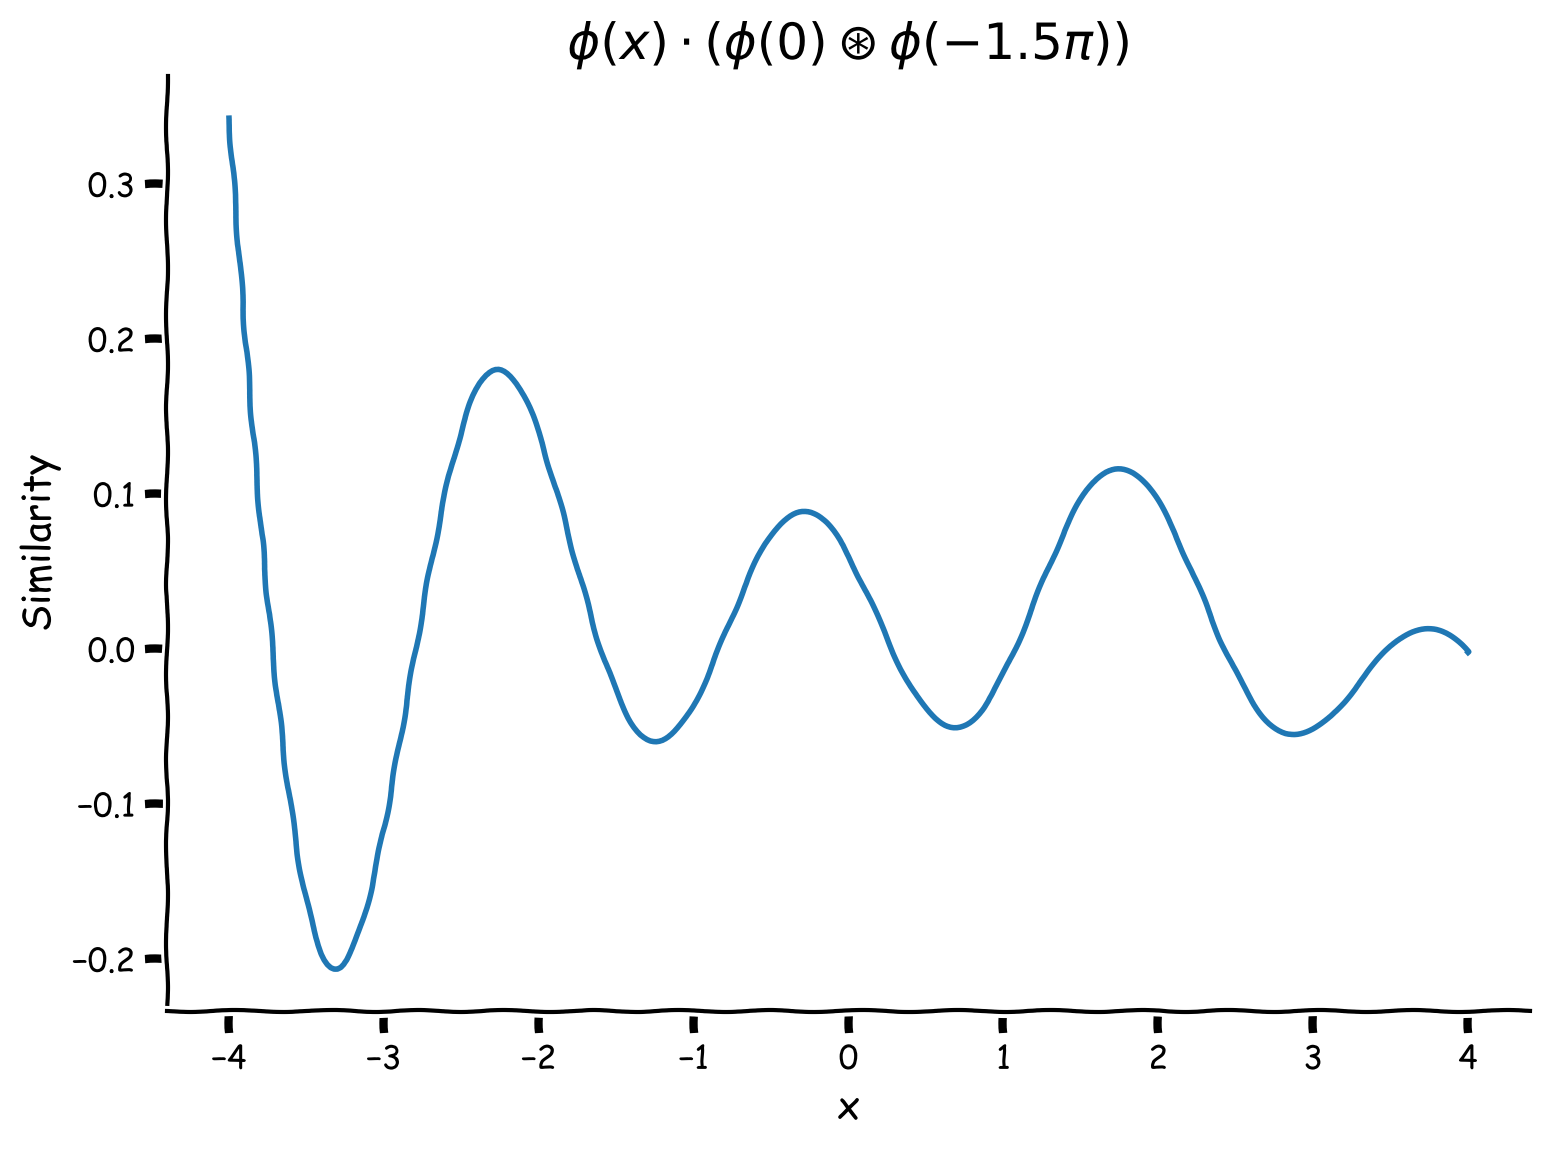

In [46]:
plot_real_valued_line_similarity(sims, xs, title = '$\phi(x)\cdot(\phi(0)\circledast\phi(-1.5\pi))$')

We will go on to use these encodings to build spatial maps.

### Coding Exercise 7 Discussion

1. How would you explain the usage of `d,md->m` in `np.einsum()` function in the previous coding exercise?

In [47]:
#to_remove explanation

"""
Discussion: How would you explain the usage of `d,md->m` in `np.einsum()` function in the previous coding exercise?

`d` is the dimensionality of the vector; we compute similariy of one vector (representing `0` object) with other `m` vectors of the same dimension `d` (thus `md`); as the result we receive `m` values of similarity.
""";

In [ ]:
# @title Submit your feedback
# content_review(f"{feedback_prefix}_beyond_bidning_integers")

In [ ]:
# @title Video 6: Iterated Binding Conclusion

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display

class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)

def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents

# video_ids = [('Youtube', '<video_id_1>'), ('Bilibili', '<video_id_2>'), ('Osf', '<video_id_3>')]
# tab_contents = display_videos(video_ids, W=854, H=480)
# tabs = widgets.Tab()
# tabs.children = tab_contents
# for i in range(len(tab_contents)):
#   tabs.set_title(i, video_ids[i][0])
# display(tabs)

In [ ]:
# @title Submit your feedback
# content_review(f"{feedback_prefix}_iterated_binding_conclusion")

---

# Section 6: Analogies. Part 1

Estimated timing to here from start of tutorial: 1 hour 10 minutes

In this section we will construct a simple analogy using Vector Symbolic Algebras. The question we are going to try and solve is "King is to queen as prince is to X".

In [ ]:
# @title Video 7: Analogy 1

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display

class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)

def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents

# video_ids = [('Youtube', '<video_id_1>'), ('Bilibili', '<video_id_2>'), ('Osf', '<video_id_3>')]
# tab_contents = display_videos(video_ids, W=854, H=480)
# tabs = widgets.Tab()
# tabs.children = tab_contents
# for i in range(len(tab_contents)):
#   tabs.set_title(i, video_ids[i][0])
# display(tabs)

In [ ]:
# @title Submit your feedback
# content_review(f"{feedback_prefix}_analogy_one")

## Coding Exercise 8: Royal Relationships

We're going to start by considering our vocabulary.  We will use the basic discrete concepts of monarch, heir, male and female.

In [48]:
set_seed(42)

symbol_names = ['monarch','heir','male','female']
discrete_space = sspspace.DiscreteSPSpace(symbol_names, ssp_dim=1024, optimize=False)

objs = {n:discrete_space.encode(n) for n in symbol_names}

Now lets create the objects we know about by combinatorally expanding the space: 

1. King is a male monarch
2. Queen is a female monarch
3. Prince is a male heir
4. Princess is a female heir

Complete the missing parts of the code to obtain correct representations of new concepts.

In [ ]:
###################################################################
## Fill out the following then remove
raise NotImplementedError("Student exercise: complete correct relations for creating new concepts.")
###################################################################

objs['king'] = objs['monarch'] * ...
objs['queen'] = objs['monarch'] * ...
objs['prince'] = ... * objs['male']
objs['princess'] = ... * ...

In [49]:
#to_remove solution

objs['king'] = objs['monarch'] * objs['male']
objs['queen'] = objs['monarch'] * objs['female']
objs['prince'] = objs['heir'] * objs['male']
objs['princess'] = objs['heir'] * objs['female']

Now we can take an explicit approach. We know that the conversion from king to queen is to unbind male and bind female, so let's apply that to our prince object and see what we uncover. 

At first, in the cell below, let's recover `queen` from `king` by constructing new `query` concept which represents unbinding of `male` and binding of `female`.

In [ ]:
###################################################################
## Fill out the following then remove
raise NotImplementedError("Student exercise: complete correct relation for creating `query` object to compare with `queen`.")
###################################################################

objs['query'] = (... * ~...) * ...

In [50]:
#to_remove solution

objs['query'] = (objs['king'] * ~objs['male']) * objs['female']

Let's see if this new query object bears any similarity to anything in our vocabulary.

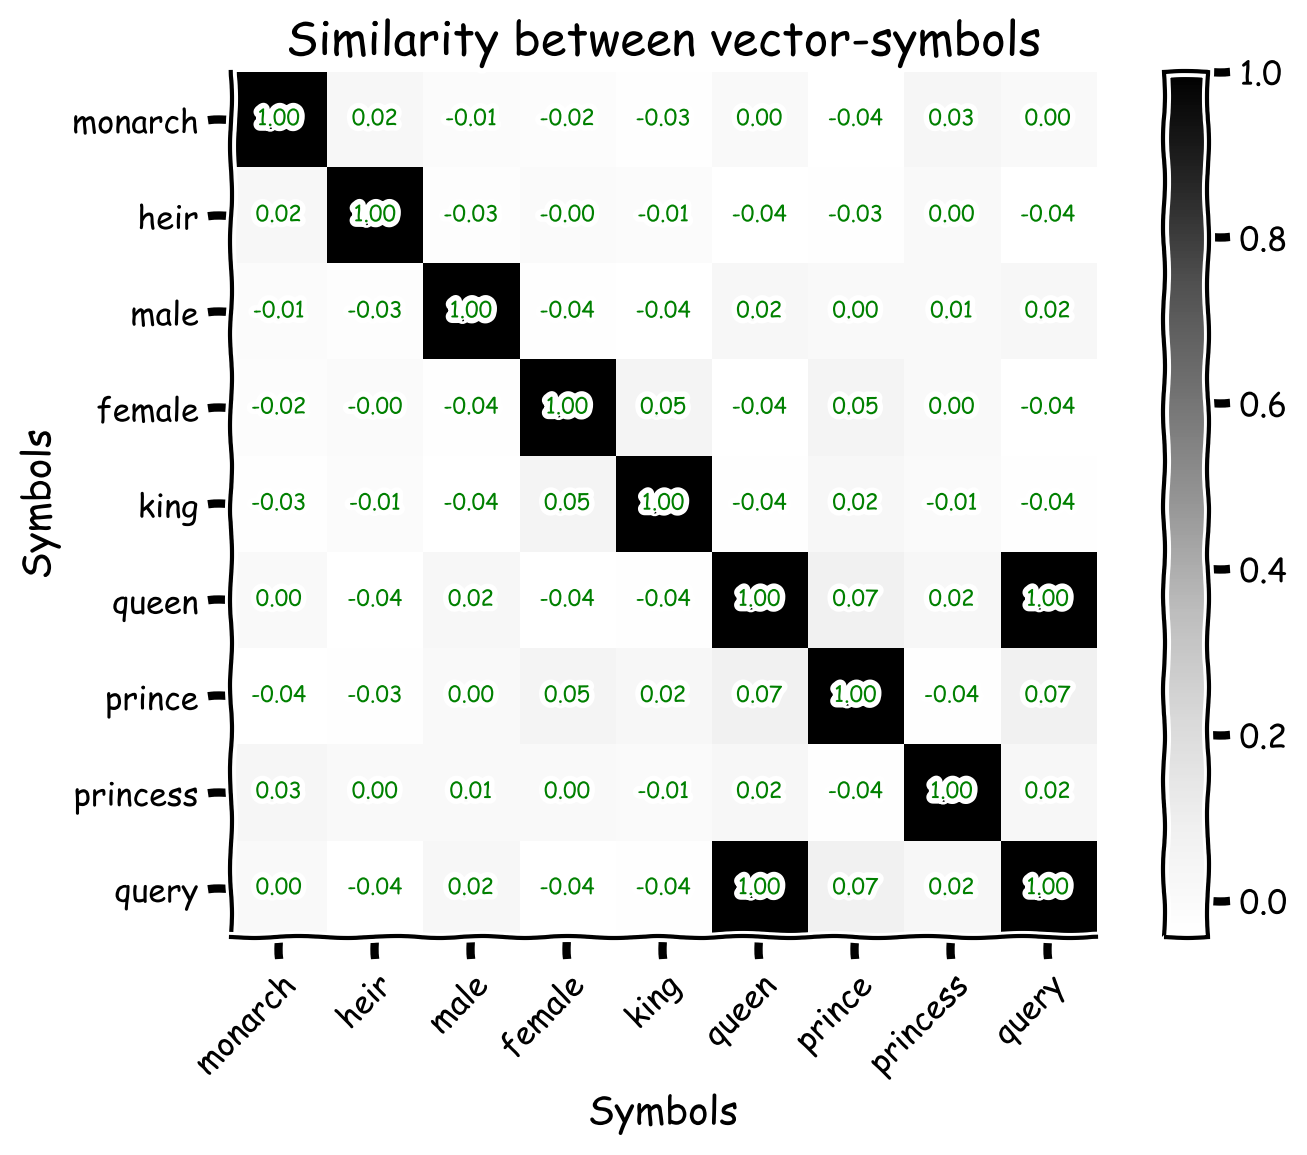

In [51]:
object_names = list(objs.keys())
sims = np.zeros((len(object_names), len(object_names)))

for name_idx, name in enumerate(object_names):
    for other_idx in range(name_idx, len(object_names)):
        sims[name_idx, other_idx] = sims[other_idx, name_idx] = (objs[name] | objs[object_names[other_idx]]).item()

plot_similarity_matrix(sims, object_names, values = True)

The above similarity plot shows that applying that operation successfully converts king to queen.  Let's apply it to 'prince' and see what happens. Now, `query` should represent `princess` concept.

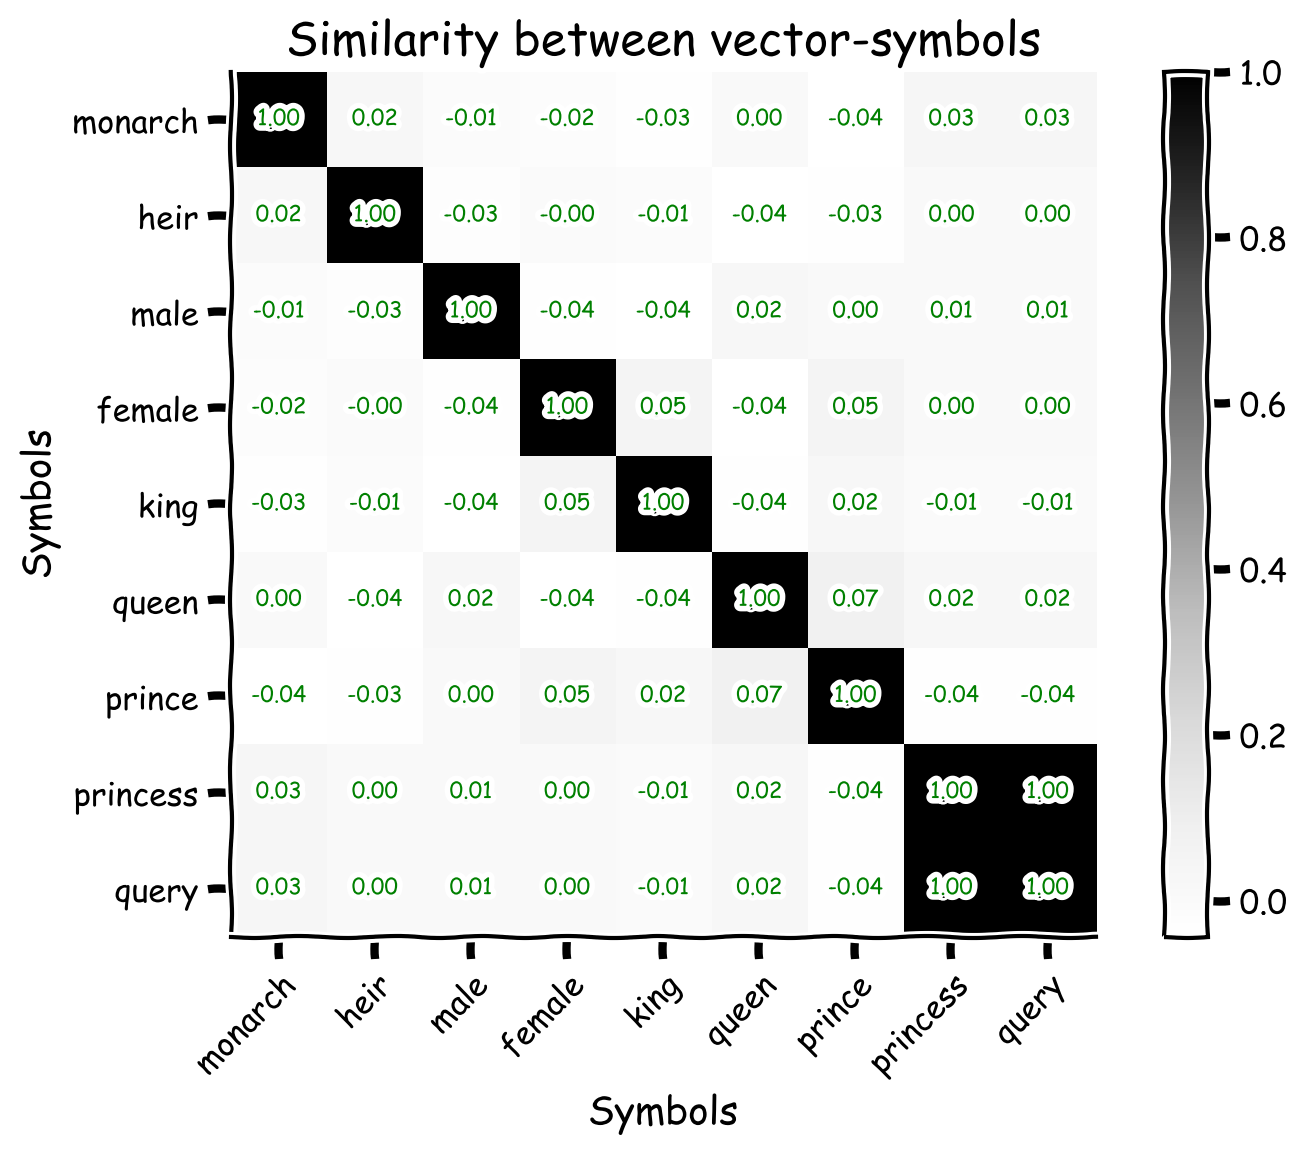

In [52]:
objs['query'] = (objs['prince'] * ~objs['male']) * objs['female']

sims = np.zeros((len(object_names), len(object_names)))

for name_idx, name in enumerate(object_names):
    for other_idx in range(name_idx, len(object_names)):
        sims[name_idx, other_idx] = sims[other_idx, name_idx] = (objs[name] | objs[object_names[other_idx]]).item()

plot_similarity_matrix(sims, object_names, values = True)

Here we have successfully recovered princess, completing the analogy.

This approach, however, requires explicit knowledge of the construction of the objects.  Let's see if we can just work with the concepts of 'king', 'queen',and 'prince' directly.

In the cell below, construct `princess` concept using only `king`, `queen` and `prince`.

In [ ]:
###################################################################
## Fill out the following then remove
raise NotImplementedError("Student exercise: complete correct relation for creating `query` object to compare with `princess`.")
###################################################################

objs['query'] = (... * ~...) * ...

In [53]:
#to_remove solution

objs['query'] = (objs['prince'] * ~objs['king']) * objs['queen']

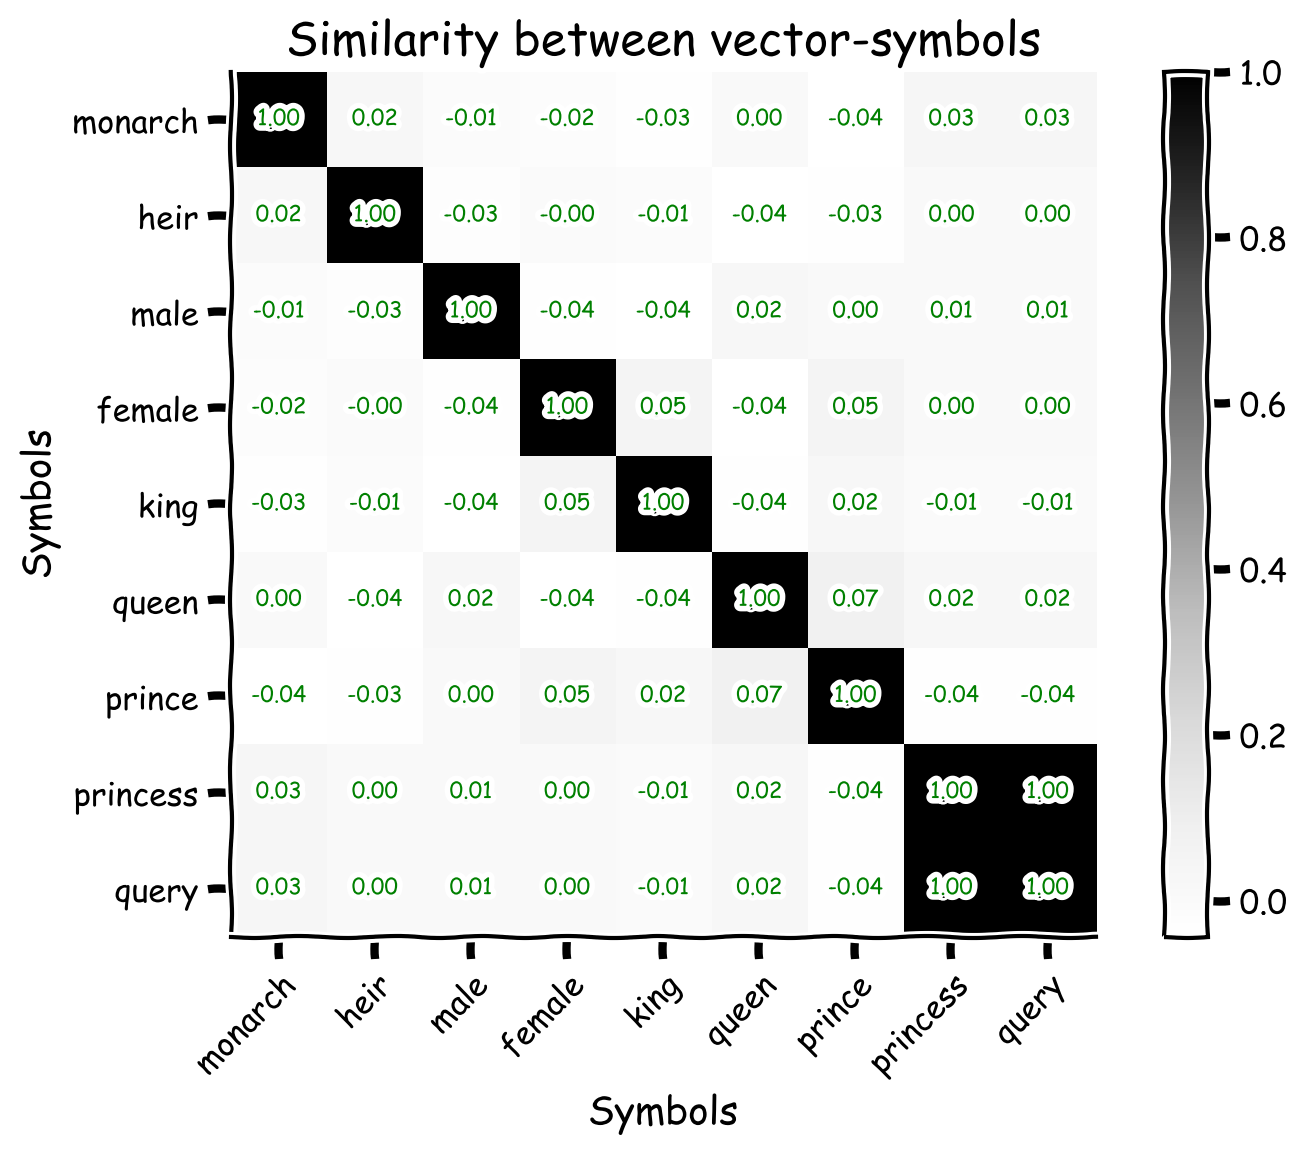

In [54]:
sims = np.zeros((len(object_names), len(object_names)))

for name_idx, name in enumerate(object_names):
    for other_idx in range(name_idx, len(object_names)):
        sims[name_idx, other_idx] = sims[other_idx, name_idx] = (objs[name] | objs[object_names[other_idx]]).item()

plot_similarity_matrix(sims, object_names, values = True)

Again, we see that we have recovered princess by using our analogy.

That said, the above depends on knowning that the representations are constructed using binding.  Can we do a similar thing through the bundling operation?  Let's try that out.

Reassing concept definitions using bundling operation.

In [ ]:
###################################################################
## Fill out the following then remove
raise NotImplementedError("Student exercise: complete correct relation for creating concepts using bundling operation.")
###################################################################

objs['king'] = (objs['monarch'] + ...).normalize()
objs['queen'] = (... + objs['female']).normalize()
objs['prince'] = (... + ...).normalize()
objs['princess'] = (objs['heir'] + ...).normalize()

In [55]:
#to_remove solution

objs['king'] = (objs['monarch'] + objs['male']).normalize()
objs['queen'] = (objs['monarch'] + objs['female']).normalize()
objs['prince'] = (objs['heir'] + objs['male']).normalize()
objs['princess'] = (objs['heir'] + objs['female']).normalize()

But now that we are using an additive model, we need to take a different approach.  Instead of unbinding king and binding queen, we subtract king and add queen to find princess from prince.

Complete the code to reflect updated mechanism.

In [ ]:
###################################################################
## Fill out the following then remove
raise NotImplementedError("Student exercise: complete correct relation for creating `query` object to compare with `princess`.")
###################################################################

objs['query'] = (... - ...) + ...

In [56]:
#to_remove solution

objs['query'] = (objs['prince'] - objs['king']) + objs['queen']

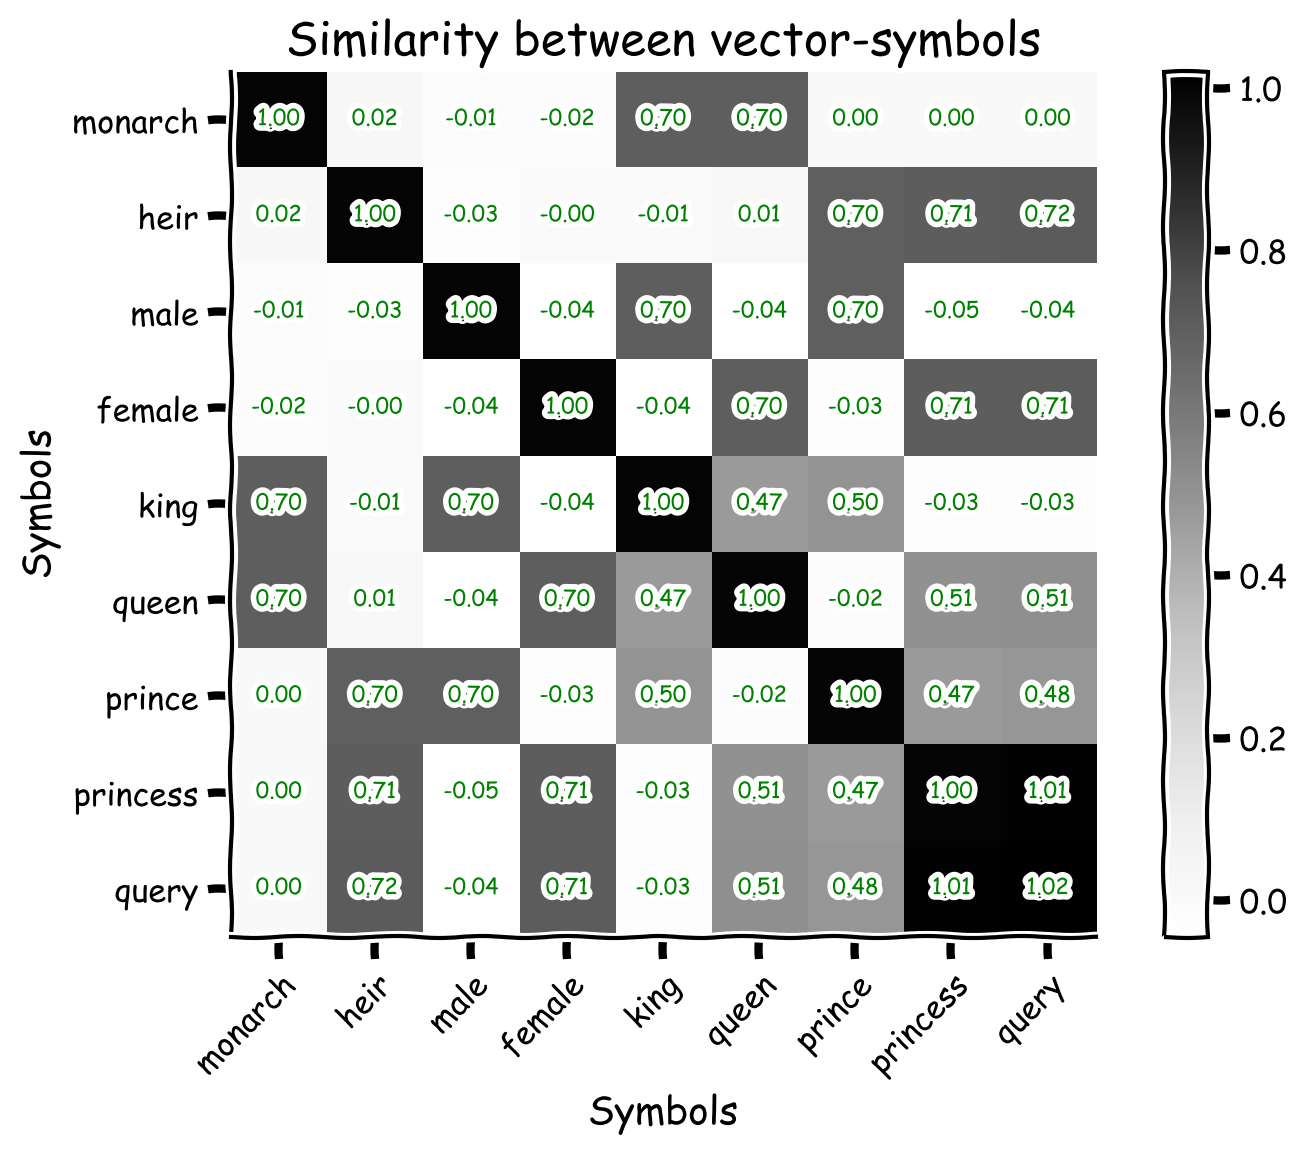

In [57]:
sims = np.zeros((len(object_names), len(object_names)))

for name_idx, name in enumerate(object_names):
    for other_idx in range(name_idx, len(object_names)):
        sims[name_idx, other_idx] = sims[other_idx, name_idx] = (objs[name] | objs[object_names[other_idx]]).item()

plot_similarity_matrix(sims, object_names, values = True)

This is a messier similarity plot, due to the fact that the bundled representations are interacting with the all their constituent parts in the vocabulary.  That said, we see that 'princess' is still most similar to the query vector. 

This approach is more like what we would expect from a wordvec embedding.

In [ ]:
# @title Submit your feedback
# content_review(f"{feedback_prefix}_royal_relationships")

---

# Section 7: Analogies. Part 2

Estimated timing to here from start of tutorial: 1 hour 25 minutes

In this section we will construct a database of data structures that describe different countries. Materials are adopted from the paper TBR by Pentti Kanerva.

In [ ]:
# @title Video 8: Analogy 2

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display

class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)

def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents

# video_ids = [('Youtube', '<video_id_1>'), ('Bilibili', '<video_id_2>'), ('Osf', '<video_id_3>')]
# tab_contents = display_videos(video_ids, W=854, H=480)
# tabs = widgets.Tab()
# tabs.children = tab_contents
# for i in range(len(tab_contents)):
#   tabs.set_title(i, video_ids[i][0])
# display(tabs)

In [ ]:
# @title Submit your feedback
# content_review(f"{feedback_prefix}_analogy_two")

## Coding Exercise 9: Dolar of Mexico

This is going to be a little more involved, because to construct the data structure we are going to need vectors that don't just represent values that we are reasoning about, but also vectors that represent different roles data can play. This is sometimes called a slot-filler representation, or a key-value representation.

At first, let us define concepts and cleanup object.

In [58]:
set_seed(42)

symbol_names = ['dollar','peso', 'ottawa','mexico-city','currency','capital']
discrete_space = sspspace.DiscreteSPSpace(symbol_names, ssp_dim=1024, optimize=False)


objs = {n:discrete_space.encode(n) for n in symbol_names}

cleanup = sspspace.Cleanup(objs)

Now, we will define `canada` and `mexico` concepts by integrating the available information together. You will be provided with `canada` object and your task is to complete for `mexico` one.

In [ ]:
###################################################################
## Fill out the following then remove
raise NotImplementedError("Student exercise: complete `mexico` concept.")
###################################################################

objs['canada'] = (objs['currency'] * objs['dollar'] + objs['capital'] * objs['ottawa']).normalize()
objs['mexico'] = (... * ... + ... * ...).normalize()

In [59]:
#to_remove solution

objs['canada'] = (objs['currency'] * objs['dollar'] + objs['capital'] * objs['ottawa']).normalize()
objs['mexico'] = (objs['currency'] * objs['peso'] + objs['capital'] * objs['mexico-city']).normalize()

We would like to find out Mexico's currency. Complete the code for constructing `query` which will help us to do that. Note, that we are using cleanup operation.

In [ ]:
###################################################################
## Fill out the following then remove
raise NotImplementedError("Student exercise: complete `query` concept which will be similar to currency in Mexico.")
###################################################################

objs['query'] = cleanup((... * ~...) * objs['mexico'])

In [60]:
#to_remove solution

objs['query'] = cleanup((objs['dollar'] * ~objs['canada']) * objs['mexico'])

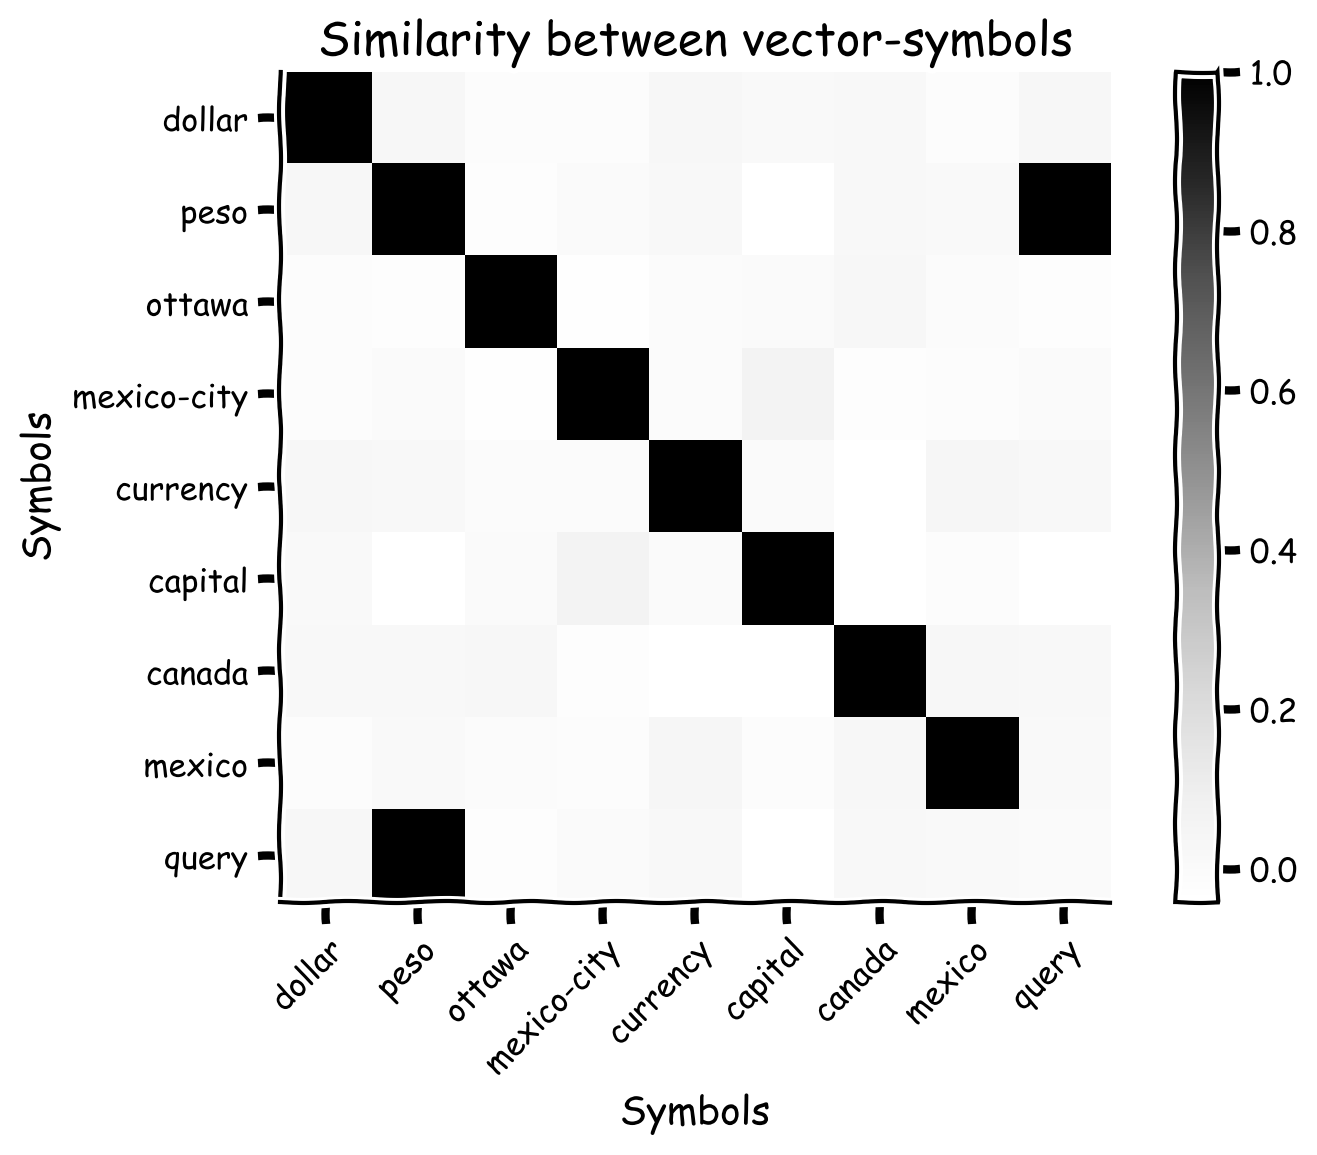

In [61]:
object_names = list(objs.keys())
sims = np.zeros((len(object_names), len(object_names)))

for name_idx, name in enumerate(object_names[:-1]):
    for other_idx in range(name_idx, len(object_names)):
        sims[name_idx, other_idx] = sims[other_idx, name_idx] = (objs[name] | objs[object_names[other_idx]]).item()

plot_similarity_matrix(sims, object_names)

After cleanup, the query vector is the most similar with the 'peso' object in the vocabularly, correctly answering the question.  

Note, however, that the similarity is not perfectly equal to 1.  This is due to the scale factors applied to the composite vectors 'canada' and 'mexico', to ensure they remain unit vectors, and due to cross talk. Crosstalk is a symptom of the fact that we are binding and unbinding bundles of vector symbols to produce the resultant query vector. The constituent vectors are not perfectly orthogonal (i.e., having a dot product of zero) and as such the terms in the bundle interact when we measure similarity between them.

In [ ]:
# @title Submit your feedback
# content_review(f"{feedback_prefix}_dolar_of_mexico")

---

# Section 8: Generalization - Wason Card Task

Estimated timing to here from start of tutorial: 1 hour 35 minutes

One of the powerful benefits of using these structured representations is being able to generalize to other circumstances.  To demonstrate this, we are going to show how we can use a simple learning rule to learn to extract a generalized rule to different circumstances.

In [ ]:
# @title Video 9: Wason Card Task Intro

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display

class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)

def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents

# video_ids = [('Youtube', '<video_id_1>'), ('Bilibili', '<video_id_2>'), ('Osf', '<video_id_3>')]
# tab_contents = display_videos(video_ids, W=854, H=480)
# tabs = widgets.Tab()
# tabs.children = tab_contents
# for i in range(len(tab_contents)):
#   tabs.set_title(i, video_ids[i][0])
# display(tabs)

In [ ]:
# @title Submit your feedback
# content_review(f"{feedback_prefix}_wason_card_task_intro")

## Coding Exercise 10: Wason Card Task

We are going to test the generalization property on the Wason Card Task, where a person is told a rule of the form "if the card is even, then the back is blue", they are then presented with a number of cards with either an odd number, an even number, a red back, or a blue back.  The participant is asked which cards they have to flip to determine that the rule is true.

In this case, the participant needs to flip only the even card(s), as the rule does not state whether or not odd numbers can have blue backs. 

At first, we will define all needed concepts. For all noun concepts we would also like to have `not smth` concept presented in the space, please complete missing code parts for that.

In [ ]:
set_seed(42)

card_states = ['red','blue','odd','even','not','green','prime','implies','ant','relation','cons']
encoder = sspspace.DiscreteSPSpace(card_states, ssp_dim=1024, optimize=False)
vocab = {c:encoder.encode(c) for c in card_states}

###################################################################
## Fill out the following then remove
raise NotImplementedError("Student exercise: complete creating `not x` concepts.")
###################################################################

for a in ['red','blue','odd','even','green','prime']:
    vocab[f'not*{a}'] = ... * ... #take from vocab
    
action_names = ['red','blue','odd','even','green','prime','not*red','not*blue','not*odd','not*even','not*green','not*prime']
action_space = np.array([vocab[x] for x in action_names]).squeeze()

In [119]:
#to_remove solution

set_seed(42)

card_states = ['red','blue','odd','even','not','green','prime','implies','ant','relation','cons']
encoder = sspspace.DiscreteSPSpace(card_states, ssp_dim=1024, optimize=False)
vocab = {c:encoder.encode(c) for c in card_states}

for a in ['red','blue','odd','even','green','prime']:
    vocab[f'not*{a}'] = vocab['not'] * vocab[a] #take from vocab
    
action_names = ['red','blue','odd','even','green','prime','not*red','not*blue','not*odd','not*even','not*green','not*prime']
action_space = np.array([vocab[x] for x in action_names]).squeeze()

Now, we are going to set up a simple perceptron-style learning rule, using the HRR (Holographic Reduced Representations) algebra.  We are going to learn a target transformation, $T$, such that given a learning rule, $A^{*} = T\circledast R$, where $A^{*}$ is the antecedance value bundled with $\texttt{not}$ bound with the consequent value and $R$ is the learning rule.

Rules themselves are going to be composed as country data structures from the previous section. `ant`, `relation` and `cons` are extra concepts which define the structure and which will bind to the specific instances. In the cell below, let us define two rules:

$$\text{blue} \implies \text{even}$$
$$\text{odd} \implies \text{green}$$

In [ ]:
###################################################################
## Fill out the following then remove
raise NotImplementedError("Student exercise: complete creating rules as defined above.")
###################################################################

rules = [
    (vocab['ant'] * ... + vocab['relation'] * vocab['implies'] + vocab['cons'] * ...).normalize(),
    (... * ... + ... * ... + ... * ...).normalize(),
]

In [132]:
#to_remove solution

rules = [
    (vocab['ant'] * vocab['blue'] + vocab['relation'] * vocab['implies'] + vocab['cons'] * vocab['even']).normalize(),
    (vocab['ant'] * vocab['odd'] + vocab['relation'] * vocab['implies'] + vocab['cons'] * vocab['green']).normalize(),
]

Now, we are ready to derive the transformation! For that, we will iterate through the rules and solutions for specified number of iterations and update it as the following:

$$T \leftarrow T - \text{lr}*(A^{*}*~R)$$

where $\text{lr}$ is learning rate constant value.

We will also compute loss progression over the time and log loss function between perfect similarity (ones only for antecedance value and not consequent one) and the one we obtain between prediciton for current transformation and full action space. Complete missing parts of the code in the next cell to complete training.

In [ ]:
###################################################################
## Fill out the following then remove
raise NotImplementedError("Student exercise: complete training loop.")
###################################################################

num_iters = 500
losses = []
sims = []
lr = 1e-1
ant_names = ["blue", "odd"]
cons_names = ["even", "green"]

transform = np.zeros((1,encoder.ssp_dim))
for i in range(num_iters):
    loss = 0
    for rule, ant_name, cons_name in zip(..., ..., ...):
        #perfect similarity
        y_true = np.eye(len(action_names))[action_names.index(ant_name),:] + np.eye(len(action_names))[4+action_names.index(cons_name),:]

        #prediction with current transform
        a_hat = sspspace.SSP(...) * ...
        
        #similarity with current transform
        sim_mat = np.einsum('nd,md->nm', action_space, ...)
        y_hat = softmax(...)
        
        #true solution
        a_true = (vocab[...] + vocab['not']*vocab[...]).normalize()

        #calculate loss
        loss += log_loss(y_true, y_hat)

        #update transform
        transform -= (lr) * (... - np.array(... * ~...))
        transform = transform / np.linalg.norm(transform)
        
        #save predicted similarities if it is last iteration
        if i == num_iters - 1:
            sims.append(sim_mat)

    #save loss
    losses.append(np.copy(loss))

In [145]:
#to_remove solution

num_iters = 500
losses = []
sims = []
lr = 1e-1
ant_names = ["blue", "odd"]
cons_names = ["even", "green"]

transform = np.zeros((1,encoder.ssp_dim))
for i in range(num_iters):
    loss = 0
    for rule, ant_name, cons_name in zip(rules, ant_names, cons_names):
        #perfect similarity
        y_true = np.eye(len(action_names))[action_names.index(ant_name),:] + np.eye(len(action_names))[4+action_names.index(cons_name),:]

        #prediction with current transform
        a_hat = sspspace.SSP(transform) * rule
        
        #similarity with current transform
        sim_mat = np.einsum('nd,md->nm', action_space, a_hat)
        y_hat = softmax(sim_mat)
        
        #true solution
        a_true = (vocab[ant_name] + vocab['not']*vocab[cons_name]).normalize()

        #calculate loss
        loss += log_loss(y_true, y_hat)

        #update transform
        transform -= (lr) * (transform - np.array(a_true * ~rule))
        transform = transform / np.linalg.norm(transform)
        
        #save predicted similarities if it is last iteration
        if i == num_iters - 1:
            sims.append(sim_mat)

    #save loss
    losses.append(np.copy(loss))

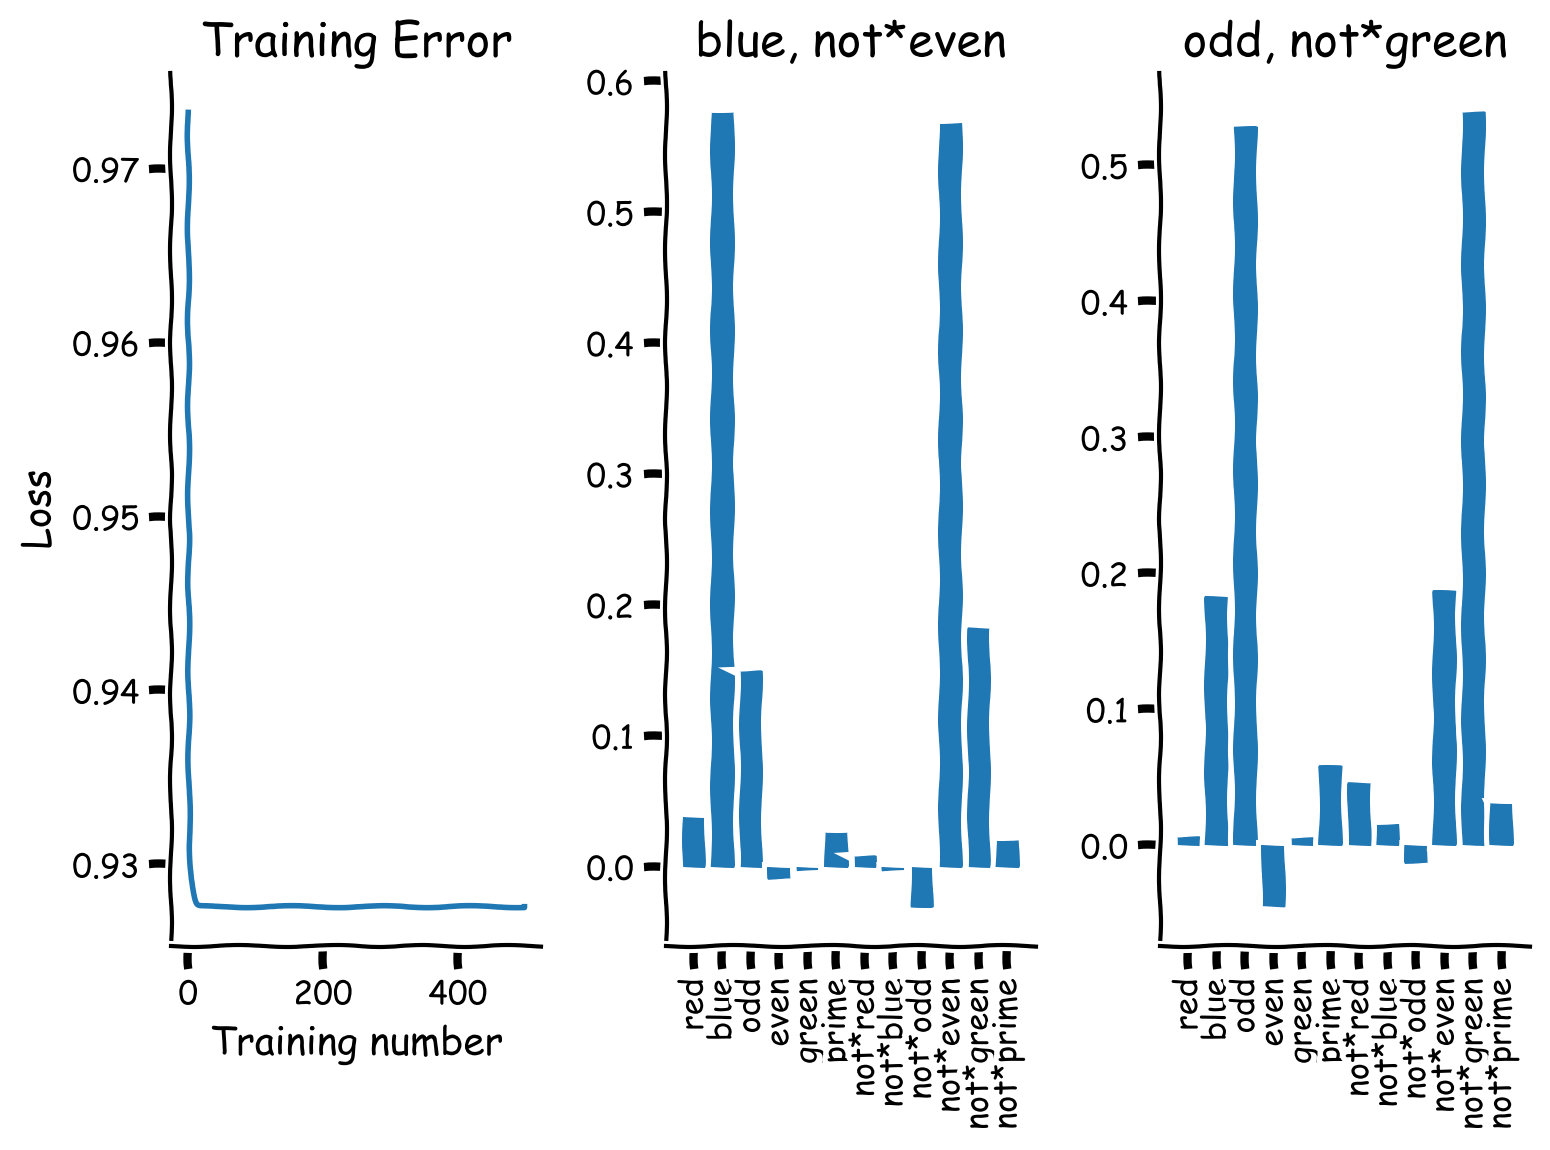

In [146]:
plot_training_and_choice(losses, sims, ant_names, cons_names, action_names)

Let's see what happens when we test it on a new rule it hasn't seen before. This time we will use the rule that $\text{red} \implies \text{prime}$. Your task is to complete new rule in the cell below and observe the results.

In [ ]:
###################################################################
## Fill out the following then remove
raise NotImplementedError("Student exercise: complete new rule and predict for it.")
###################################################################

new_rule = (vocab['ant'] * ... + vocab['relation'] * ... + vocab['cons'] * ...).normalize()

a_hat = sspspace.SSP(...) * ...

new_sims = np.einsum('nd,md->nm', action_space, a_hat)
y_hat = softmax(new_sims)

In [148]:
#to_remove solution

new_rule = (vocab['ant'] * vocab['red'] + vocab['relation'] * vocab['implies'] + vocab['cons'] * vocab['prime']).normalize()

a_hat = sspspace.SSP(transform) * new_rule

new_sims = np.einsum('nd,md->nm', action_space, a_hat)
y_hat = softmax(new_sims)

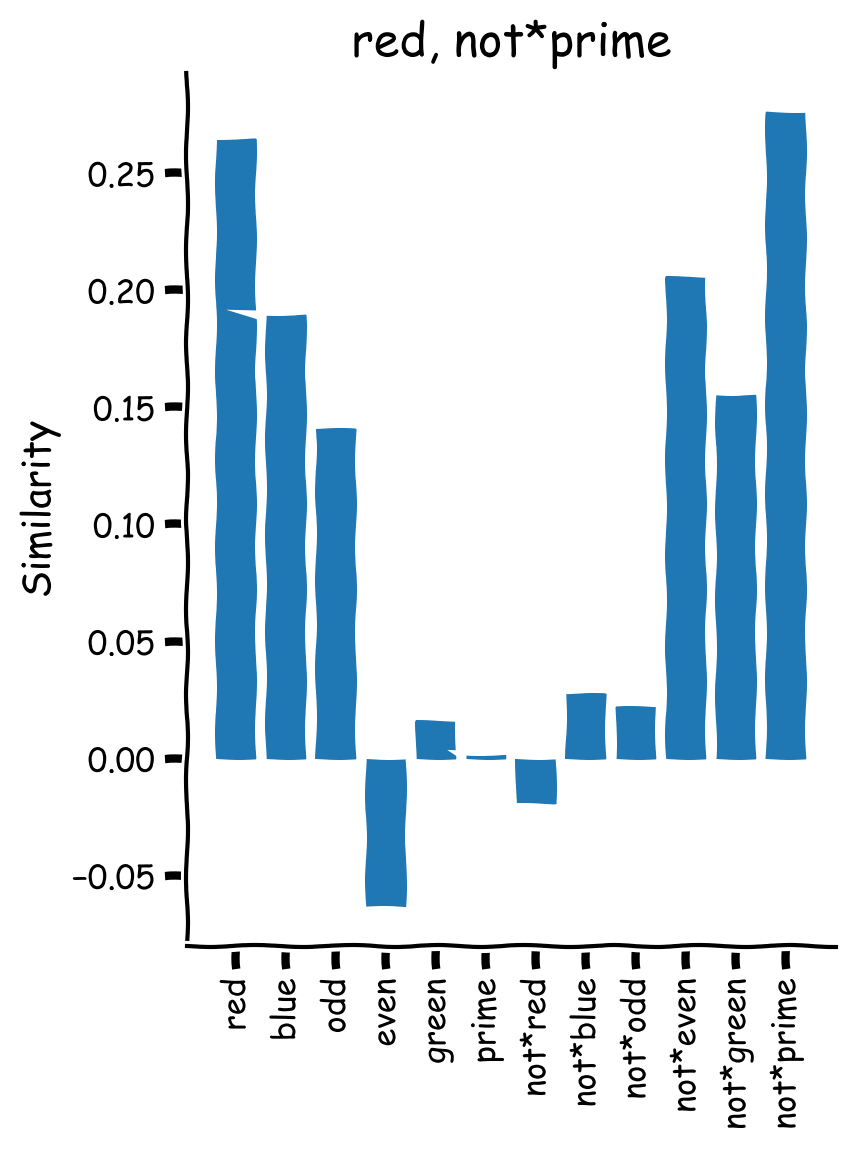

In [149]:
plot_choice([new_sims], ["red"], ["prime"], action_names)

Let's compare how a standard MLP that isn't aware of the structure in the representation performs. Here, features are going to be the rules and output - solutions. Complete the code below.

In [ ]:
###################################################################
## Fill out the following then remove
raise NotImplementedError("Student exercise: complete MLP training.")
###################################################################

X_train = np.array(...).squeeze()

y_train = np.array([
    (vocab[ant_names[...]] + vocab['not']*vocab[cons_names[...]).normalize(),
    (vocab[...] + ...*vocab[...]).normalize(),
]).squeeze()

regr = MLPRegressor(random_state=1, hidden_layer_sizes=(1024,1024), max_iter=1000).fit(..., ...)

a_mlp = regr.predict(new_rule)

mlp_sims = np.einsum('nd,md->nm', action_space, a_mlp)

In [151]:
#to_remove solution

X_train = np.array(rules).squeeze()

y_train = np.array([
    (vocab[ant_names[0]] + vocab['not']*vocab[cons_names[0]]).normalize(),
    (vocab[ant_names[1]] + vocab['not']*vocab[cons_names[1]]).normalize(),
]).squeeze()

regr = MLPRegressor(random_state=1, hidden_layer_sizes=(1024,1024), max_iter=1000).fit(X_train, y_train)

a_mlp = regr.predict(new_rule)

mlp_sims = np.einsum('nd,md->nm', action_space, a_mlp)

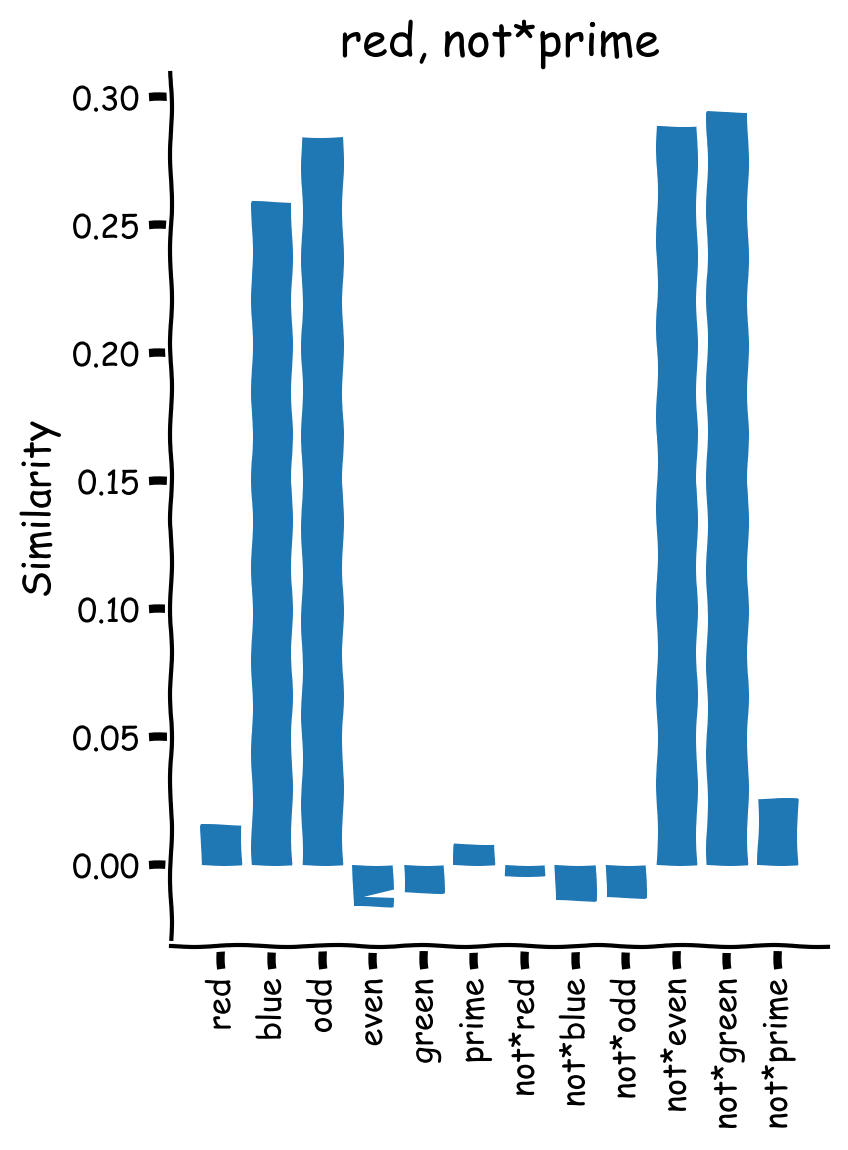

In [152]:
plot_choice([mlp_sims], ["red"], ["prime"], action_names)

As you can see, this model, even though it is a more expressive neural network, simply learns to predict the values it had seen before, when presented with a novel stimulus.

In [ ]:
# @title Video 10: Wason Card Task Outro

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display

class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)

def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents

# video_ids = [('Youtube', '<video_id_1>'), ('Bilibili', '<video_id_2>'), ('Osf', '<video_id_3>')]
# tab_contents = display_videos(video_ids, W=854, H=480)
# tabs = widgets.Tab()
# tabs.children = tab_contents
# for i in range(len(tab_contents)):
#   tabs.set_title(i, video_ids[i][0])
# display(tabs)

In [ ]:
# @title Submit your feedback
# content_review(f"{feedback_prefix}_wason_card_task_outro")

---

# Section 9: Sample Efficient Learning

Estimated timing to here from start of tutorial: 2 hours

In this section we will take a look at how imposing an inductive bias on our feature space can result in more sample-efficient learning. 

In [ ]:
# @title Video 11: Function Learning and Inductive Bias
from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display

class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)

def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents

# video_ids = [('Youtube', '<video_id_1>'), ('Bilibili', '<video_id_2>'), ('Osf', '<video_id_3>')]
# tab_contents = display_videos(video_ids, W=854, H=480)
# tabs = widgets.Tab()
# tabs.children = tab_contents
# for i in range(len(tab_contents)):
#   tabs.set_title(i, video_ids[i][0])
# display(tabs)

In [ ]:
# @title Submit your feedback
# content_review(f"{feedback_prefix}_function_learning_and_inductive_bias")

## Coding Exercise 11: Additive Function


We will start with an additive function, the Rastrigin function, defined 
$$
f(\mathbf{x}) = 10*d + \sum_{i=1}^{d} (x_{i}^{2} - 10 \cos(2 \pi x_{i}))
$$

where $d$ is the dimensionality of the input vector. In the cell below complete missing parts of the function which computes values of the Rastrigin function given the input array.

In [172]:
###################################################################
## Fill out the following then remove
raise NotImplementedError("Student exercise: complete the Rastrigin function.")
###################################################################

def rastrigin(x):
    """Compute Rastrigin function for given array of d-dimenstional vectors.

    Inputs:
    - x (np.ndarray of shape (n, d)): n d-dimensional vectors.

    Outputs:
    - y (np.ndarray of shape (n, 1)): Rastrigin function value for each of the vectors.
    """
    return 10 * ... + np.sum(... - ... * np.cos(2*np.pi*...), axis=1)

In [64]:
#to_remove solution

def rastrigin(x):
    """Compute Rastrigin function for given array of d-dimenstional vectors.

    Inputs:
    - x (np.ndarray of shape (n, d)): n d-dimensional vectors.

    Outputs:
    - y (np.ndarray of shape (n, 1)): Rastrigin function value for each of the vectors.
    """
    return 10 * x.shape[1] + np.sum(x**2 - 10 * np.cos(2*np.pi*x), axis=1)

In [65]:
# this code creates 10000 2-dimensional vectors which are going to be served as input to the function (thus, output is of shape (10000, 1))
x0 = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x0,x0)
xs = np.vstack((X.flatten(), Y.flatten())).T

ys_rastrigin = rastrigin(xs)

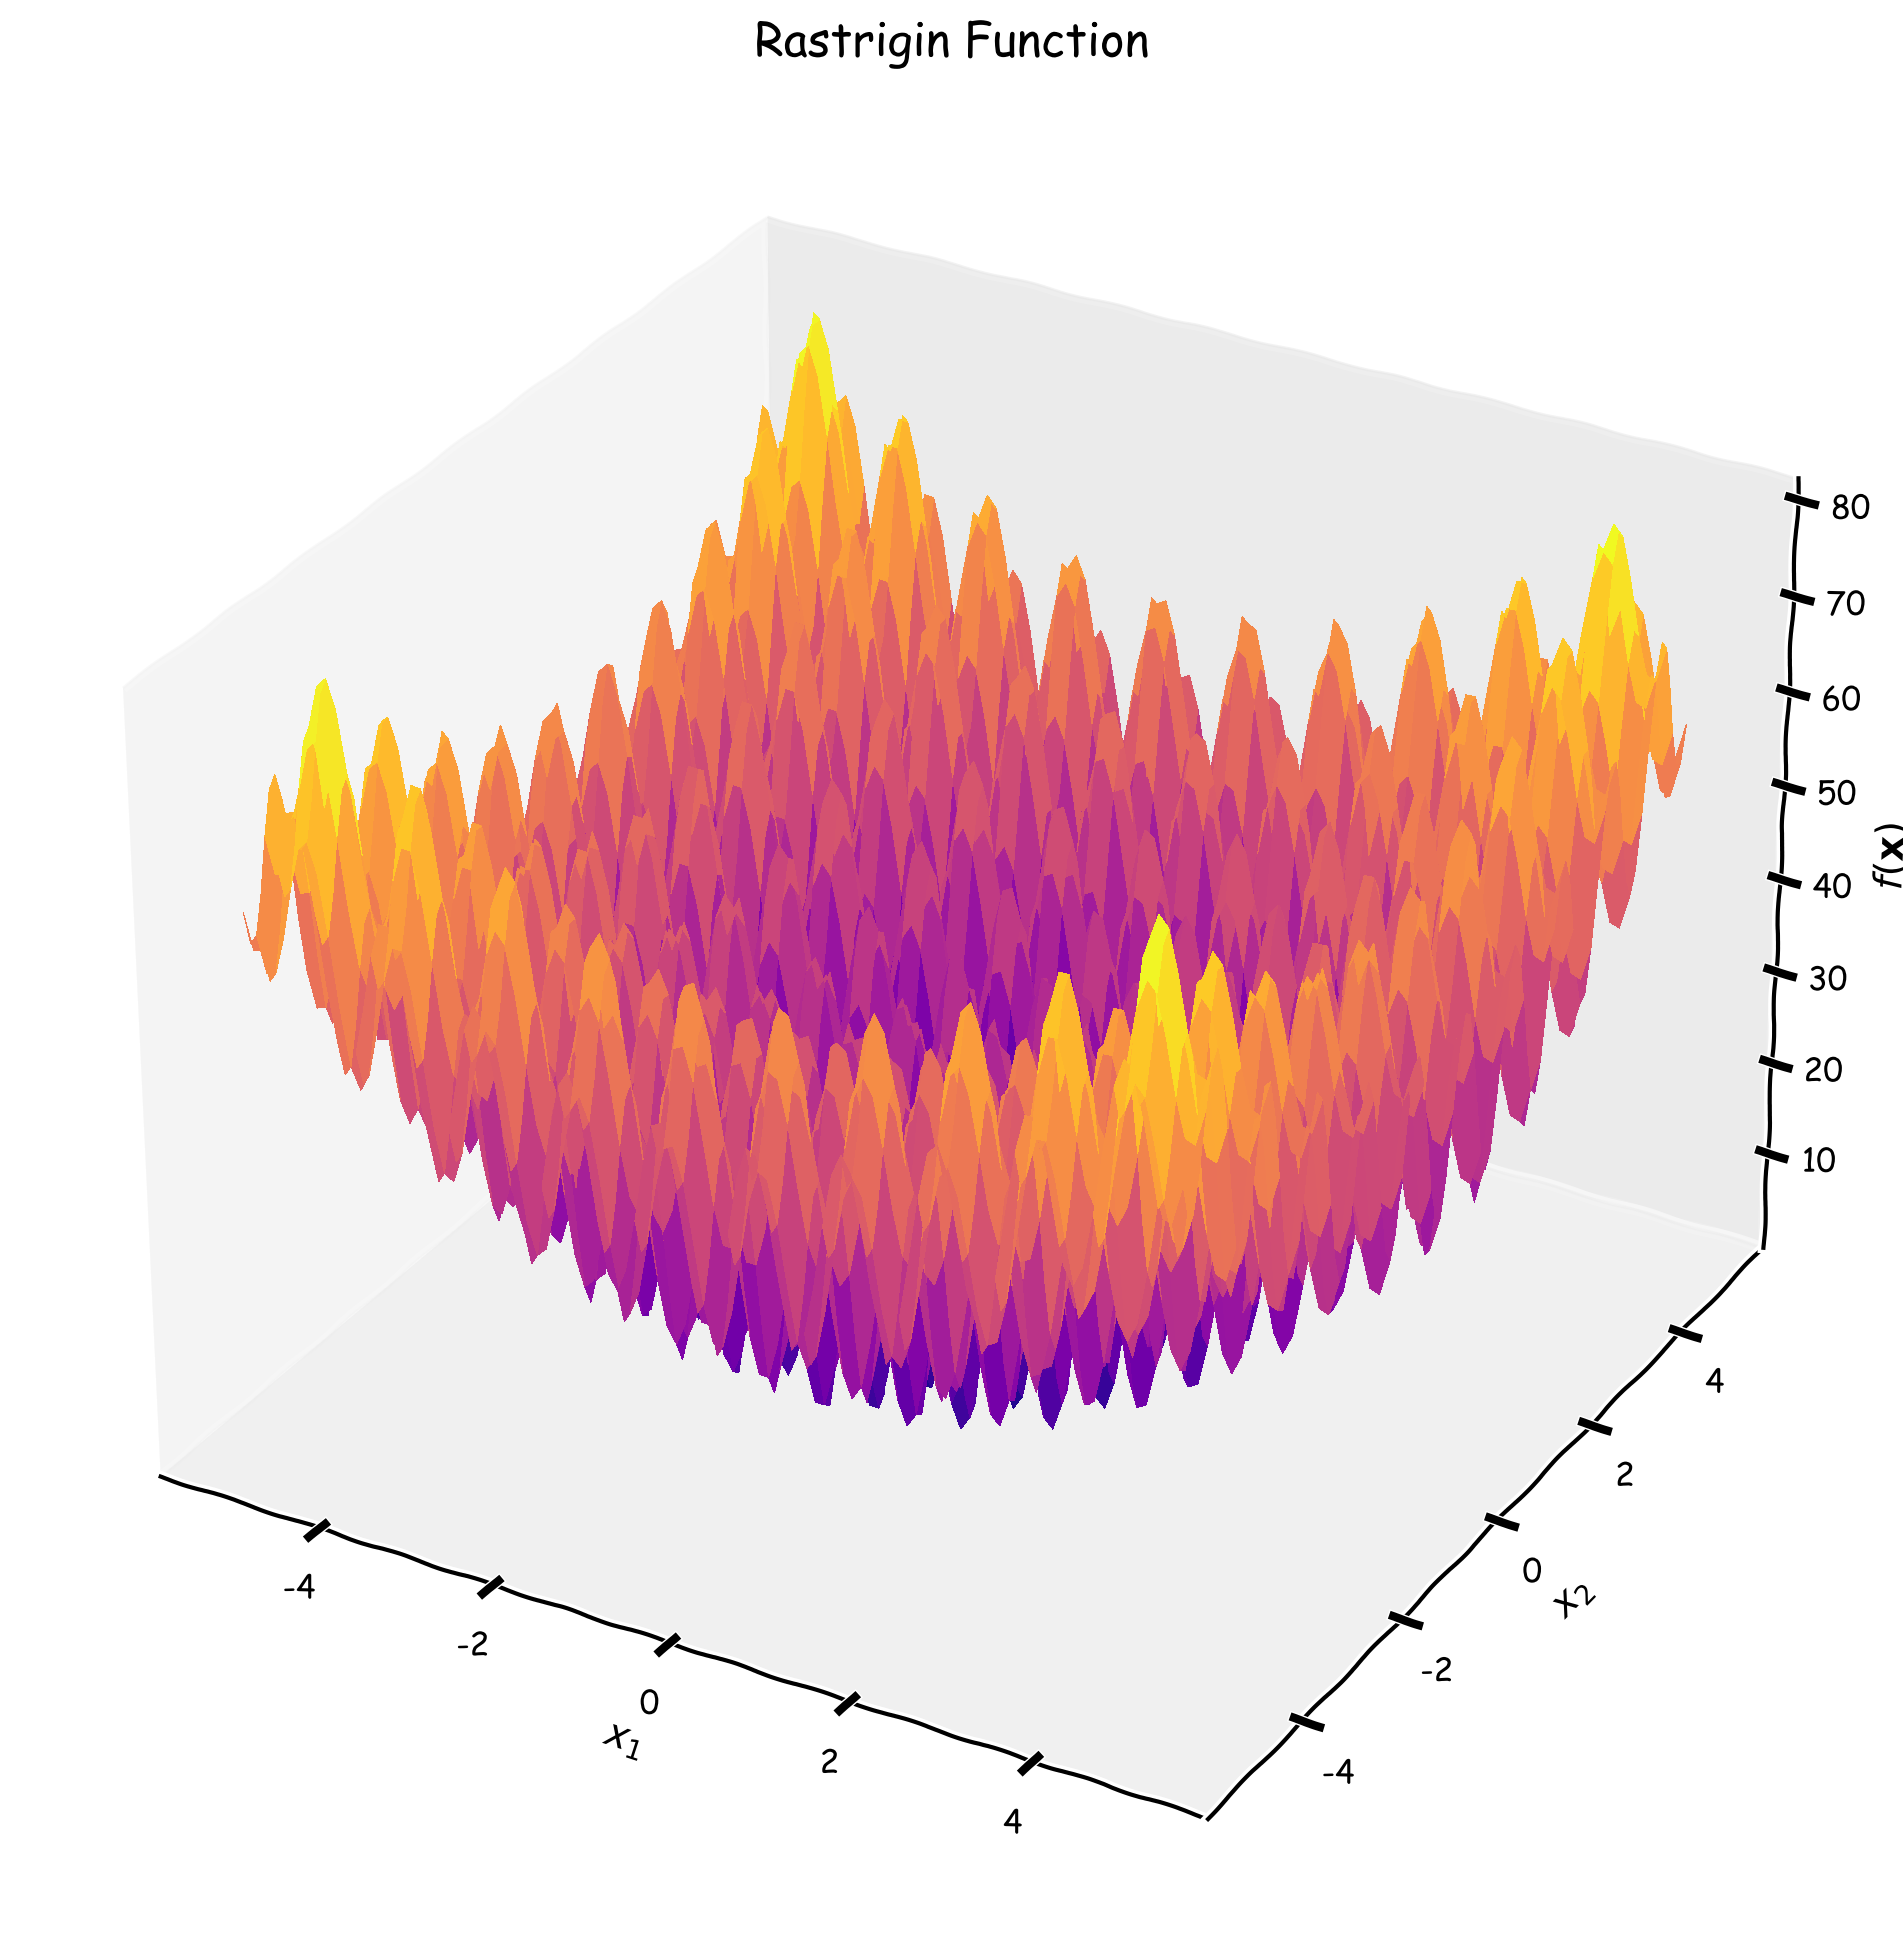

In [66]:
plot_3d_function([X],[Y], [ys_rastrigin.reshape(X.shape)], ['Rastrigin Function'])

Now, we are going to see which of the inductive biases (suggested mechanism underlying input data) will be more efficient in training the linear regression to get values of the Rastrigin function. For that, we will simply encode 2D input vectors `xs` (we call it 'bound') and with using bundling (encode each of the dimensions separately and then bundle them together). 

Complete these operations in the cell below.

In [ ]:
###################################################################
## Fill out the following then remove
raise NotImplementedError("Student exercise: complete simple encoding and bundling one.")
###################################################################

set_seed(42)

ssp_space = sspspace.RandomSSPSpace(domain_dim=2, ssp_dim=1024)
bound_phis = ssp_space.encode(...)

ssp_space0 = sspspace.RandomSSPSpace(domain_dim=1, ssp_dim=1024)
ssp_space1 = sspspace.RandomSSPSpace(domain_dim=1, ssp_dim=1024)
bundle_phis = ssp_space0.encode(xs[:,...][:,None]) + ssp_space1.encode(xs[:,...][:,None]) #remember that input to `encode` should be 2-dimensional, thus we need to create extra dimension

In [67]:
#to_remove solution

set_seed(42)

ssp_space = sspspace.RandomSSPSpace(domain_dim=2, ssp_dim=1024)
bound_phis = ssp_space.encode(xs)

ssp_space0 = sspspace.RandomSSPSpace(domain_dim=1, ssp_dim=1024)
ssp_space1 = sspspace.RandomSSPSpace(domain_dim=1, ssp_dim=1024)
bundle_phis = ssp_space0.encode(xs[:,0][:,None]) + ssp_space1.encode(xs[:,1][:,None]) #remember that input to `encode` should be 2-dimensional, thus we need to create extra dimension

Now, let us define modeling attributes: we will have a couple of different `test_sizes` and we will fit linear regression for each of them right in the loop; then, for each of the models we will evaluate its fit based on RMSE loss.

Complete the missing parts of the loss function as well as training and testing one.

In [203]:
###################################################################
## Fill out the following then remove
raise NotImplementedError("Student exercise: complete modelling utility functions.")
###################################################################

def loss(y_true, y_pred):
    """Calculate RMSE loss between true and predicted values (note, that loss is not normalized by the shape).

    Inputs:
    - y_true (np.ndarray): true values.
    - y_pred (np.ndarray): predicted values.

    Outputs:
    - loss (float): loss value.
    """
    return np.sqrt(np.mean((... - ...)**...))

def test_performance(xs, ys, test_sizes):
    """Fit linear regression to the provided data and evaluate the performance with RMSE loss for different test sizes.

    Inputs:
    - xs (np.ndarray): input data.
    - ys (np.ndarray): output data.
    - test_size (list): list of the test sizes.
    """
    performance = []

    for test_size in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(..., ..., random_state=1, test_size=...)
        regr = LinearRegression().fit(..., ...)
        performance.append(np.copy(loss(..., regr.predict(...))))
    return performance

In [68]:
#to_remove solution

def loss(y_true, y_pred):
    """Calculate RMSE loss between true and predicted values (note, that loss is not normalized by the shape).

    Inputs:
    - y_true (np.ndarray): true values.
    - y_pred (np.ndarray): predicted values.

    Outputs:
    - loss (float): loss value.
    """
    return np.sqrt(np.mean((y_true - y_pred)**2))

def test_performance(xs, ys, test_sizes):
    """Fit linear regression to the provided data and evaluate the performance with RMSE loss for different test sizes.

    Inputs:
    - xs (np.ndarray): input data.
    - ys (np.ndarray): output data.
    - test_size (list): list of the test sizes.
    """
    performance = []

    for test_size in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(xs, ys, random_state=1, test_size=test_size)
        regr = LinearRegression().fit(X_train, y_train)
        performance.append(np.copy(loss(y_test, regr.predict(X_test))))
    return performance

Now we are ready to traing the models on two different inductive biases of the input data.

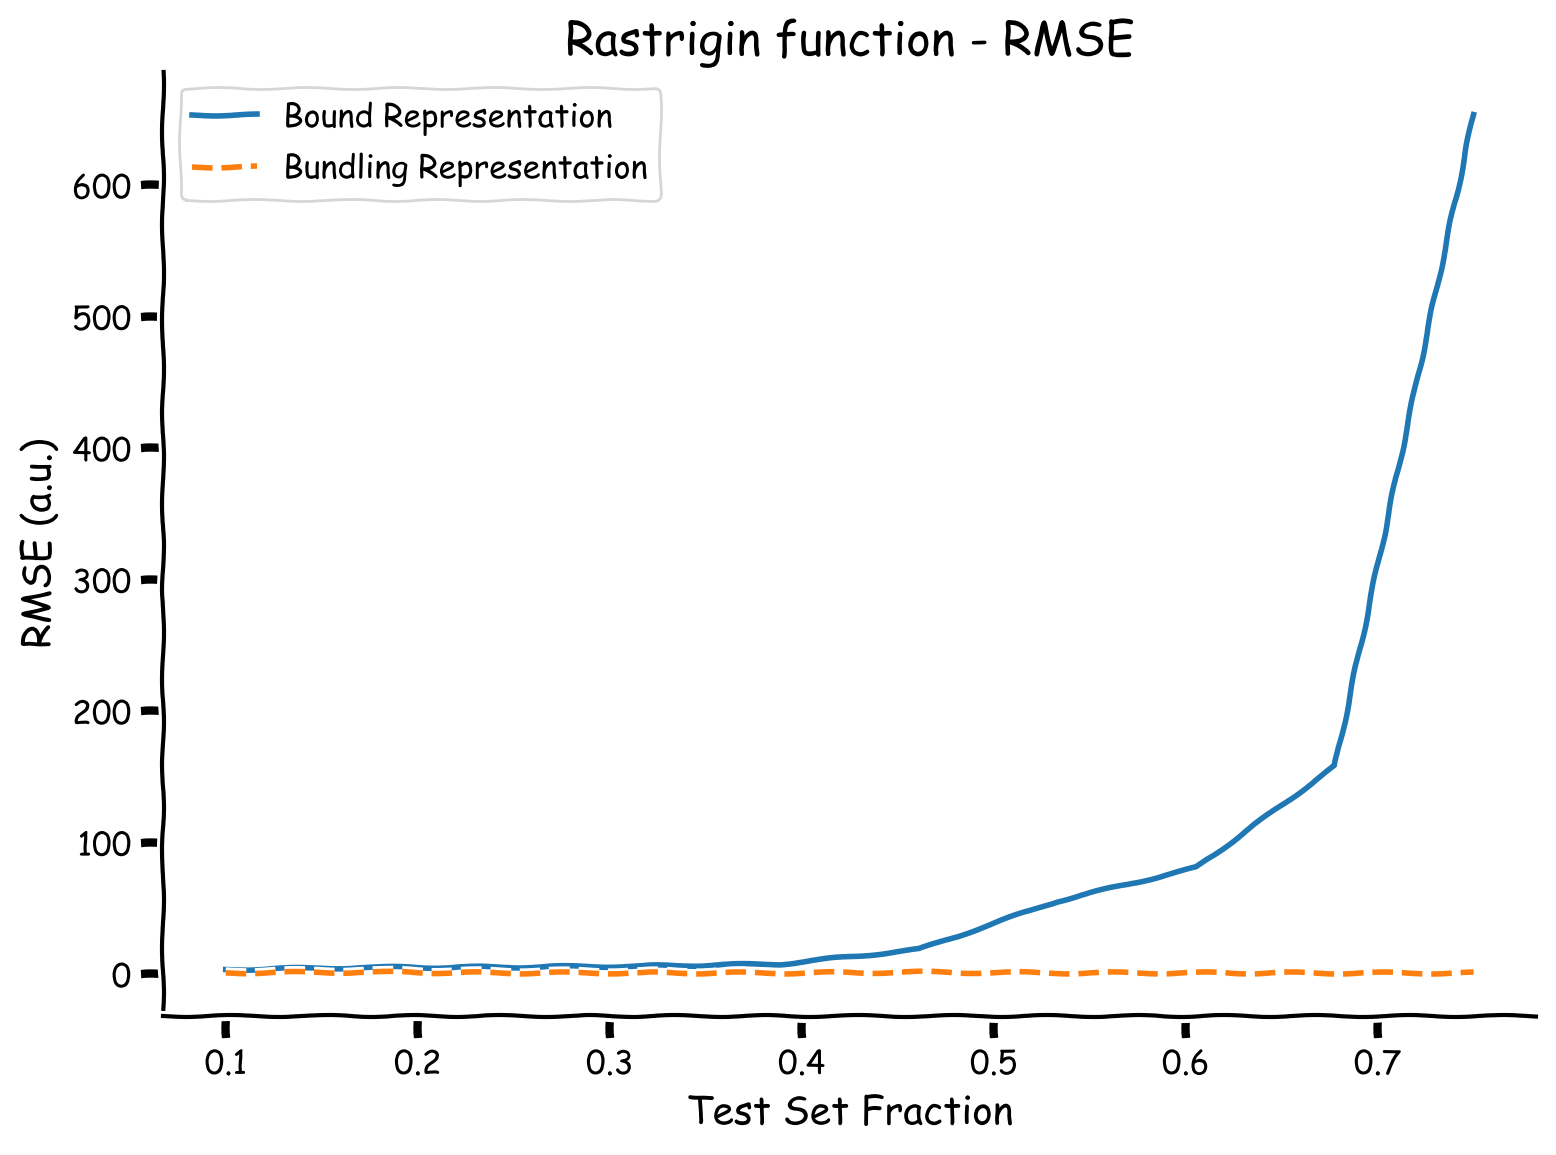

In [69]:
test_sizes = np.linspace(0.1,0.75,10)
bound_performance = test_performance(bound_phis, ys_rastrigin, test_sizes)
bundle_performance = test_performance(bundle_phis, ys_rastrigin, test_sizes)
plot_performance(bound_performance, bundle_performance, test_sizes, "Rastrigin function - RMSE")

What a drastic difference! Let us evaluate visually the performance with `test_size = 0.7`.

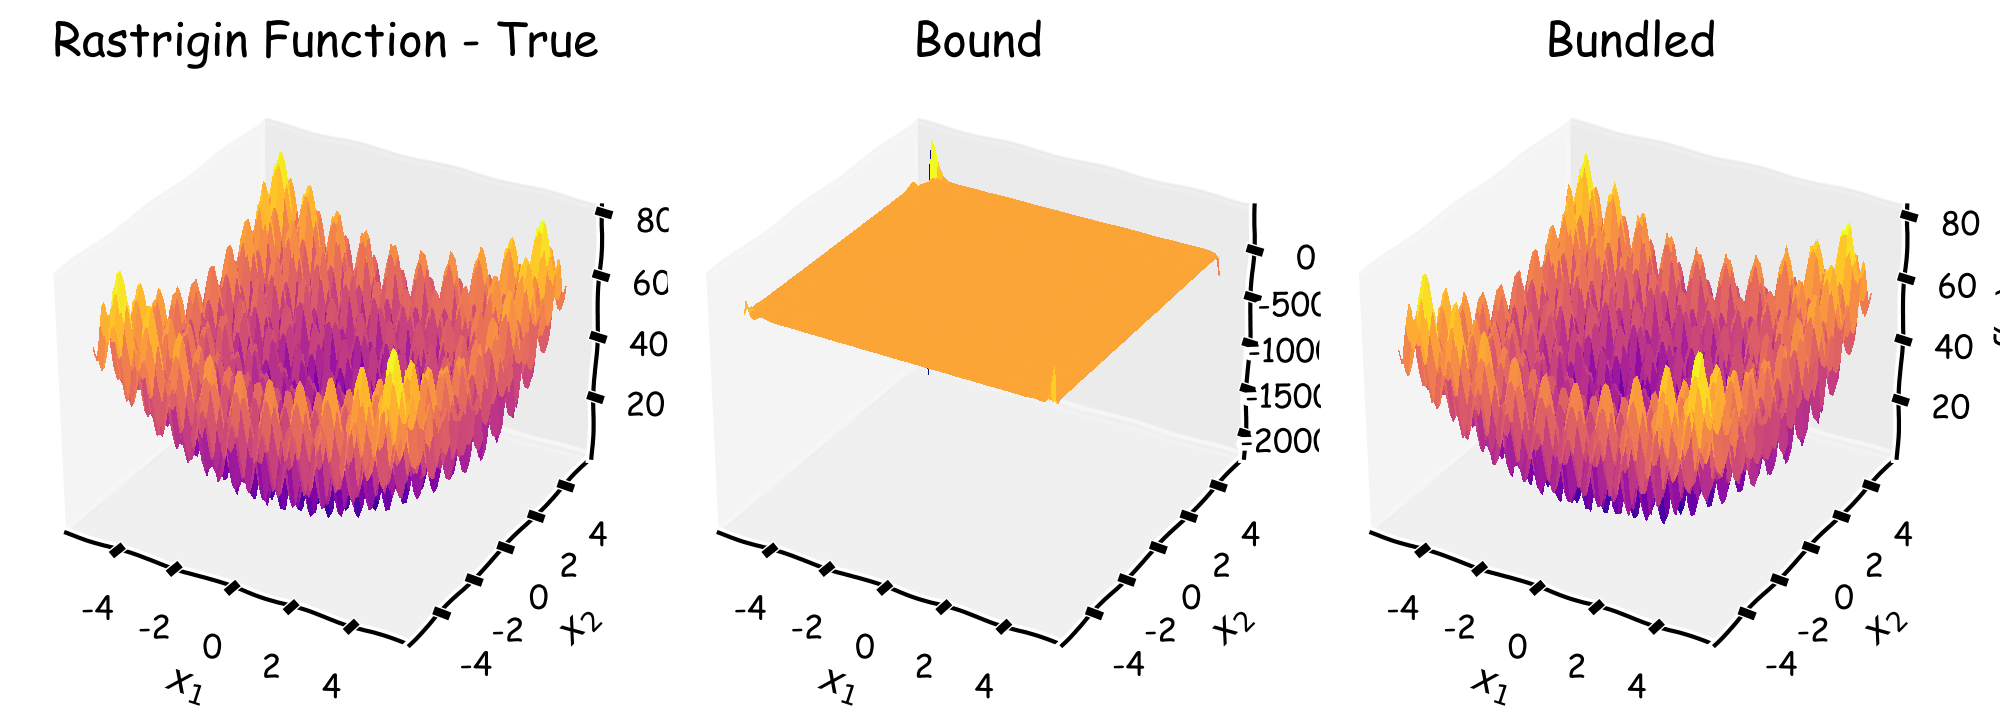

In [70]:
bound_model = get_model(bound_phis, ys_rastrigin, test_size=0.7)
bundled_model = get_model(bundle_phis, ys_rastrigin, test_size=0.7)

ys_hat_rastrigin_bound = bound_model.predict(bound_phis)
ys_hat_rastrigin_bundled = bundled_model.predict(bundle_phis)

plot_3d_function([X, X, X], [Y, Y, Y], [ys_rastrigin.reshape(X.shape), ys_hat_rastrigin_bound.reshape(X.shape), ys_hat_rastrigin_bundled.reshape(X.shape)], ['Rastrigin Function - True', 'Bound', 'Bundled'])

### Coding Exercise 11 Discussion

1. Why do we think bundled representation is superior for Rastrigin function?

In [71]:
#to_remove explanation

"""
Discussion: Why do we think bundled representation is superior for Rastrigin function?

As the name of the coding exercise suggests, we have additive function and, thus, bundling being additive operation is superior to simple bound.
""";

In [ ]:
# @title Submit your feedback
# content_review(f"{feedback_prefix}_additive_function")

## Coding Exercise 12: Non-separable Function

Now let's consider a non-separable function.  We will examine the function $f(\mathbf{x}) = \sin(x_{1}x_{2})$ over the domain $[-4,4]^{2}$.

The same exercise goes here - continue missing parts of the code to get the correct calculation of the defined function.

In [ ]:
###################################################################
## Fill out the following then remove
raise NotImplementedError("Student exercise: complete the non-separable function.")
###################################################################

def non_separable(x):
    """Compute non-separable function for given array of 2-dimenstional vectors.

    Inputs:
    - x (np.ndarray of shape (n, 2)): n 2-dimensional vectors.

    Outputs:
    - y (np.ndarray of shape (n, 1)): non-separable function value for each of the vectors.
    """
    return np.sin(np.multiply(x[:,...],x[:,...]))

In [72]:
#to_remove solution

def non_separable(x):
    """Compute non-separable function for given array of 2-dimenstional vectors.

    Inputs:
    - x (np.ndarray of shape (n, 2)): n 2-dimensional vectors.

    Outputs:
    - y (np.ndarray of shape (n, 1)): non-separable function value for each of the vectors.
    """
    return np.sin(np.multiply(x[:,0],x[:,1]))

In [73]:
x0 = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x0,x0)
xs = np.vstack((X.flatten(), Y.flatten())).T

ys_non_separable = non_separable(xs)

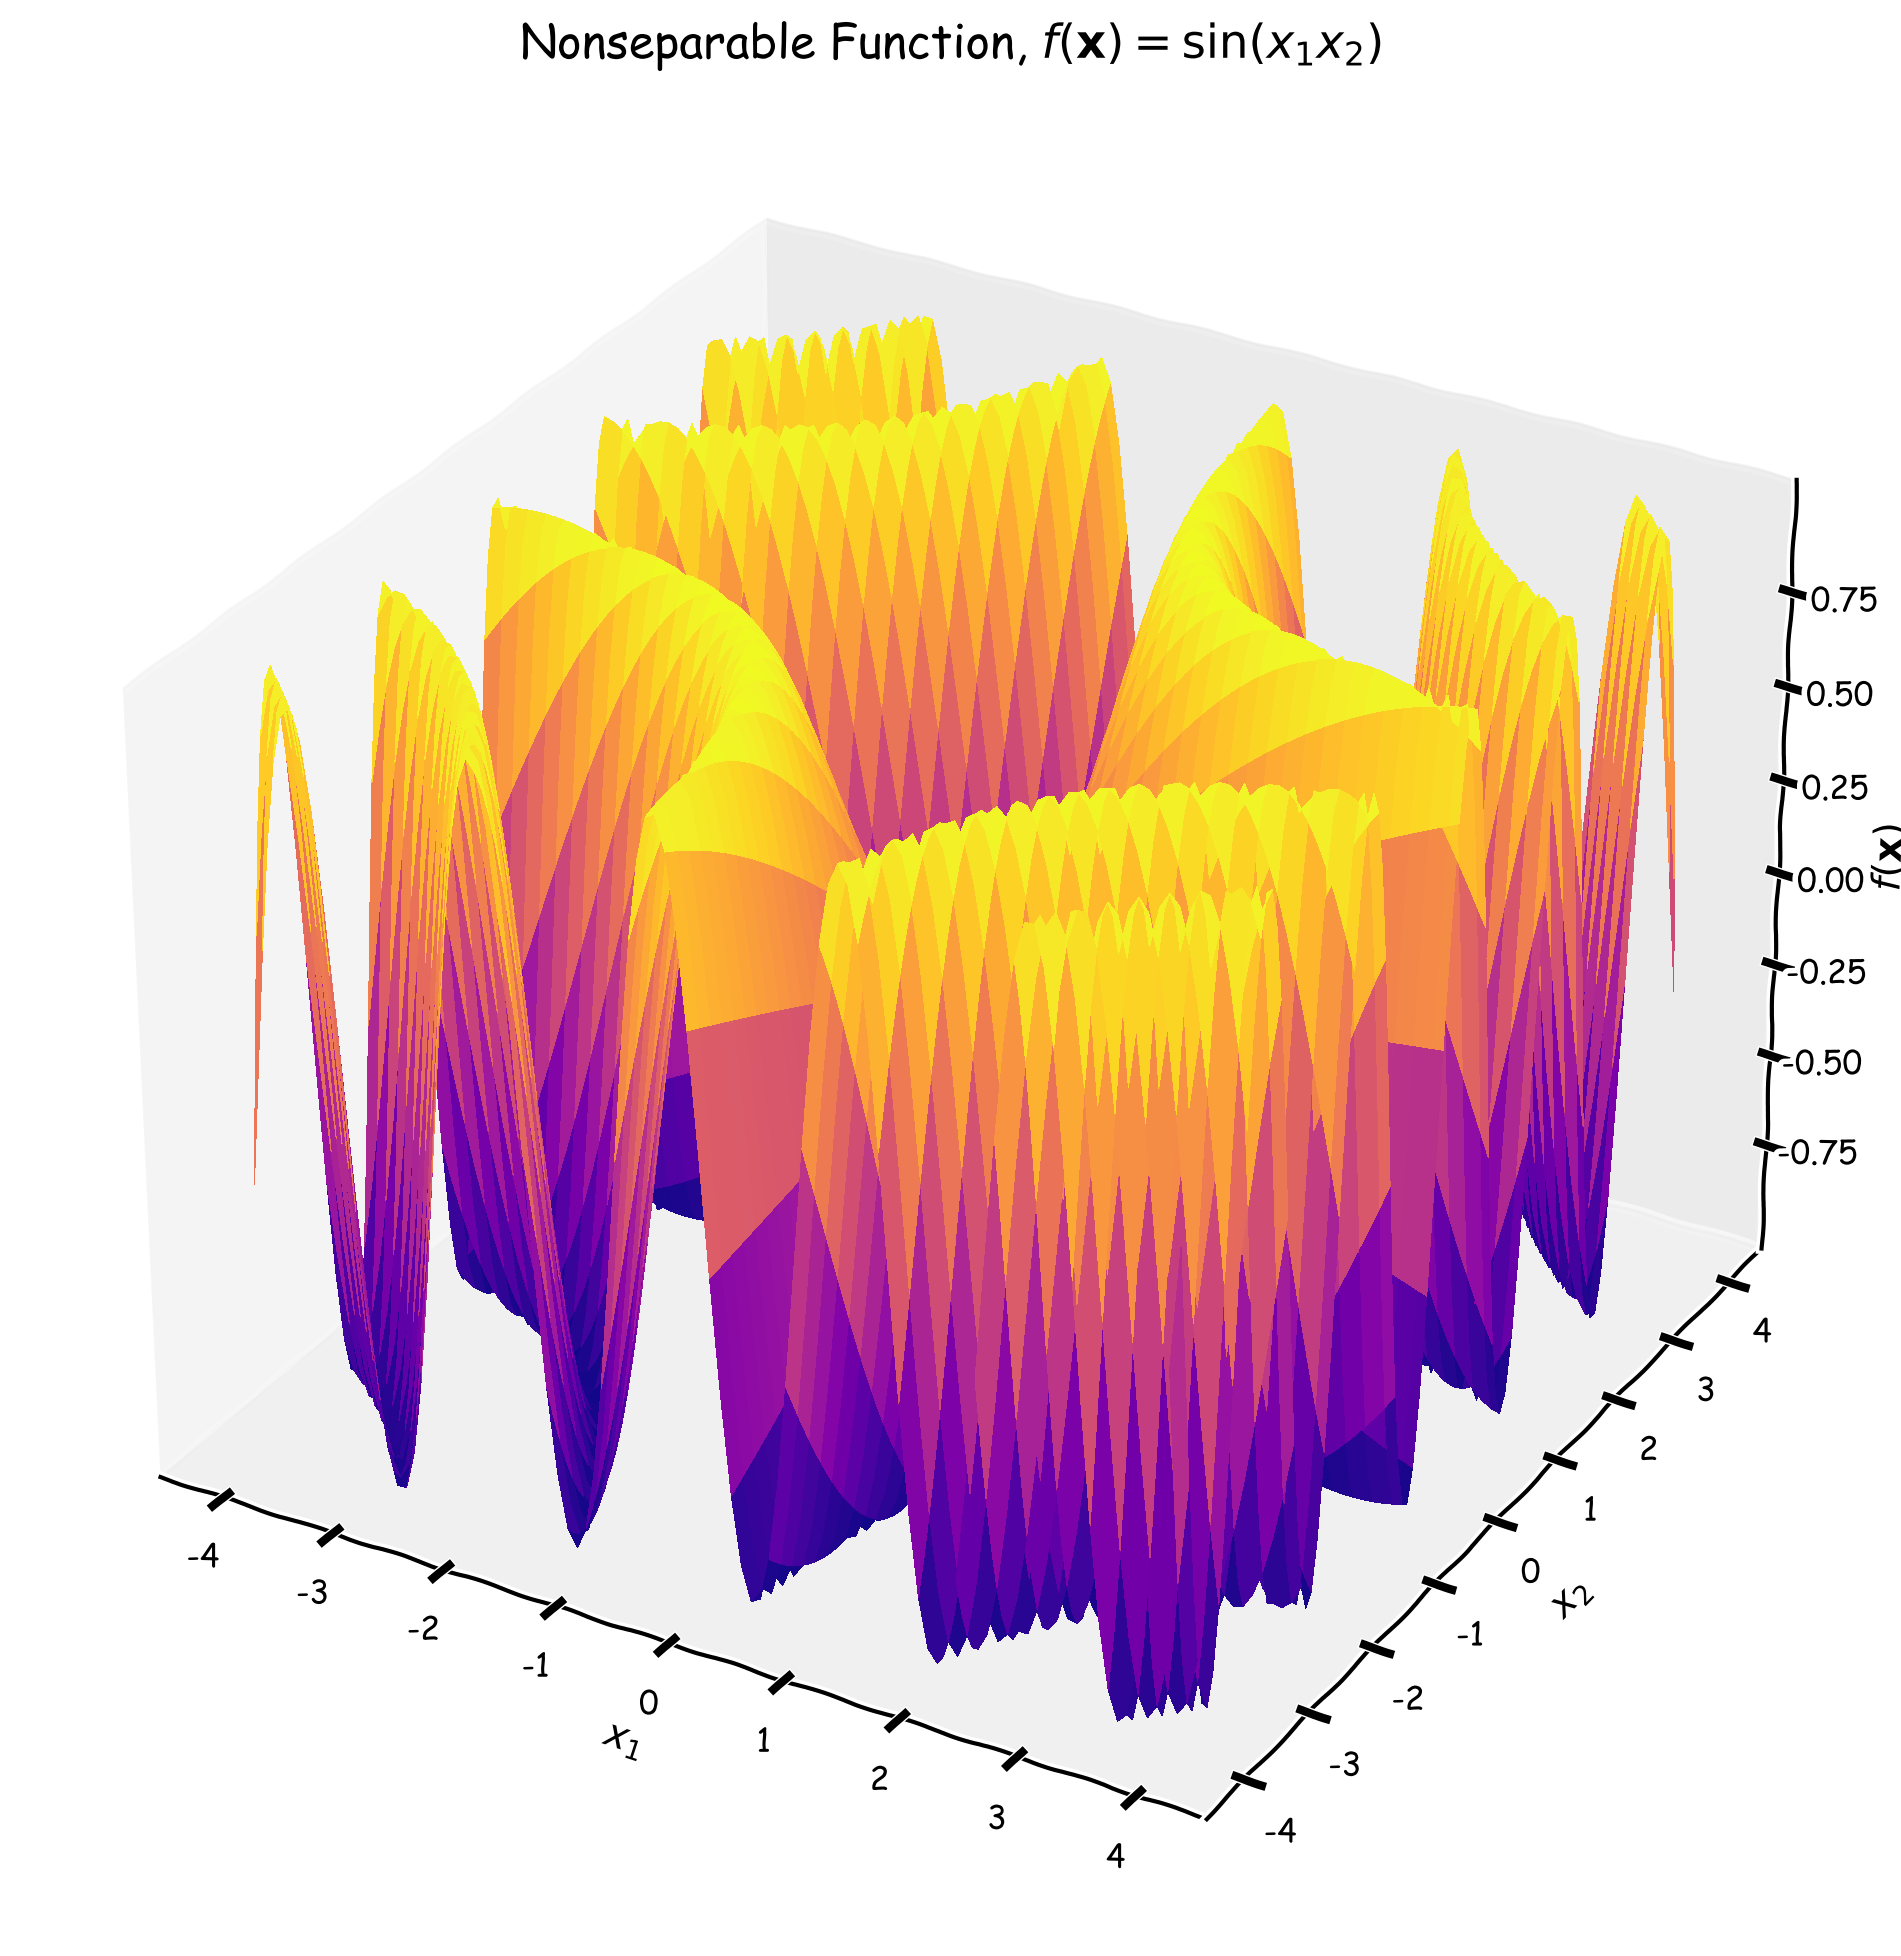

In [74]:
plot_3d_function([X],[Y], [ys_non_separable.reshape(X.shape)], ['Nonseparable Function, $f(\mathbf{x}) = \sin(x_{1}x_{2})$'])

### Coding Exercise 12 Discussion

1. Can you guess by the nature of the function which of the representations will be more efficient?

In [75]:
#to_remove explanation

"""
Discussion: Can you guess by the nature of the function which of the representations will be more efficient?

As here function doesn't have distinct additive parts, we expect bound representation to be better.
""";

We will reuse previously defined spaces for encoding bounded and bundling representations.

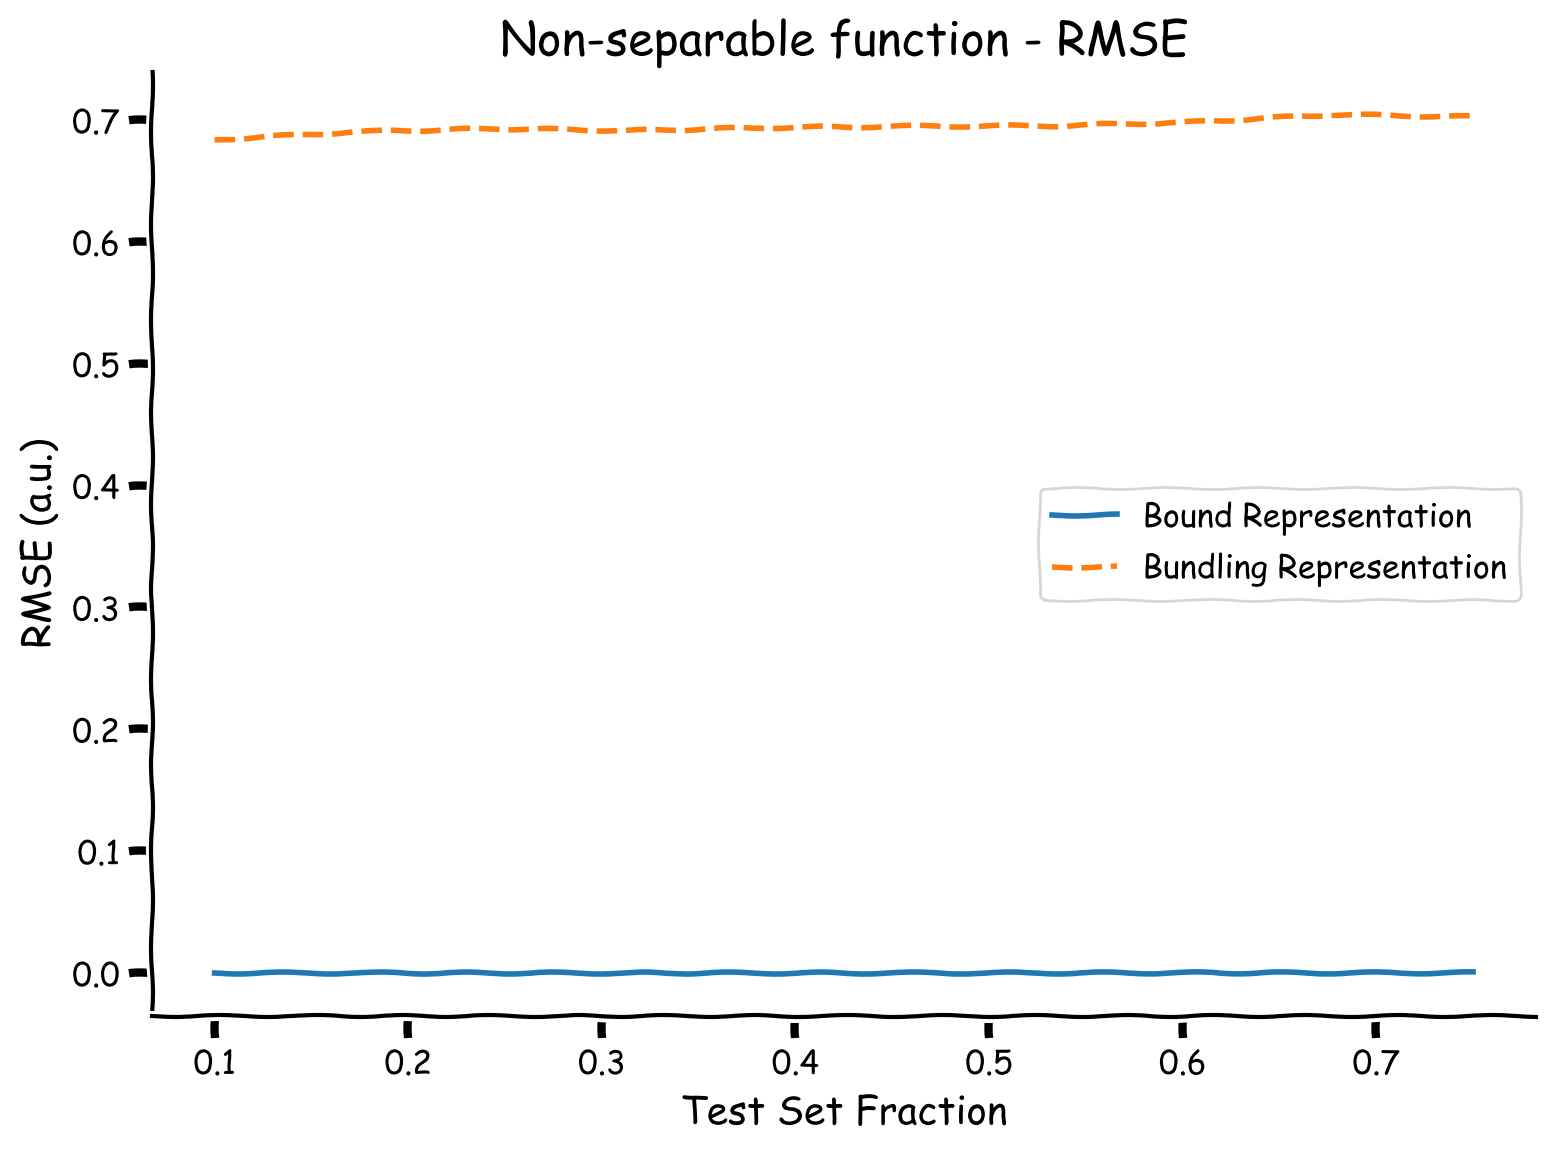

In [76]:
bound_phis = ssp_space.encode(xs)
bundle_phis = ssp_space0.encode(xs[:,0][:,None]) + ssp_space1.encode(xs[:,1][:,None])

test_sizes = np.linspace(0.1,0.75,10)
bound_performance = test_performance(bound_phis, ys_non_separable, test_sizes)
bundle_performance = test_performance(bundle_phis, ys_non_separable, test_sizes)
plot_performance(bound_performance, bundle_performance, test_sizes, title = "Non-separable function - RMSE")

Bundling representation can't achieve the same quality even with the small fraction of test size.

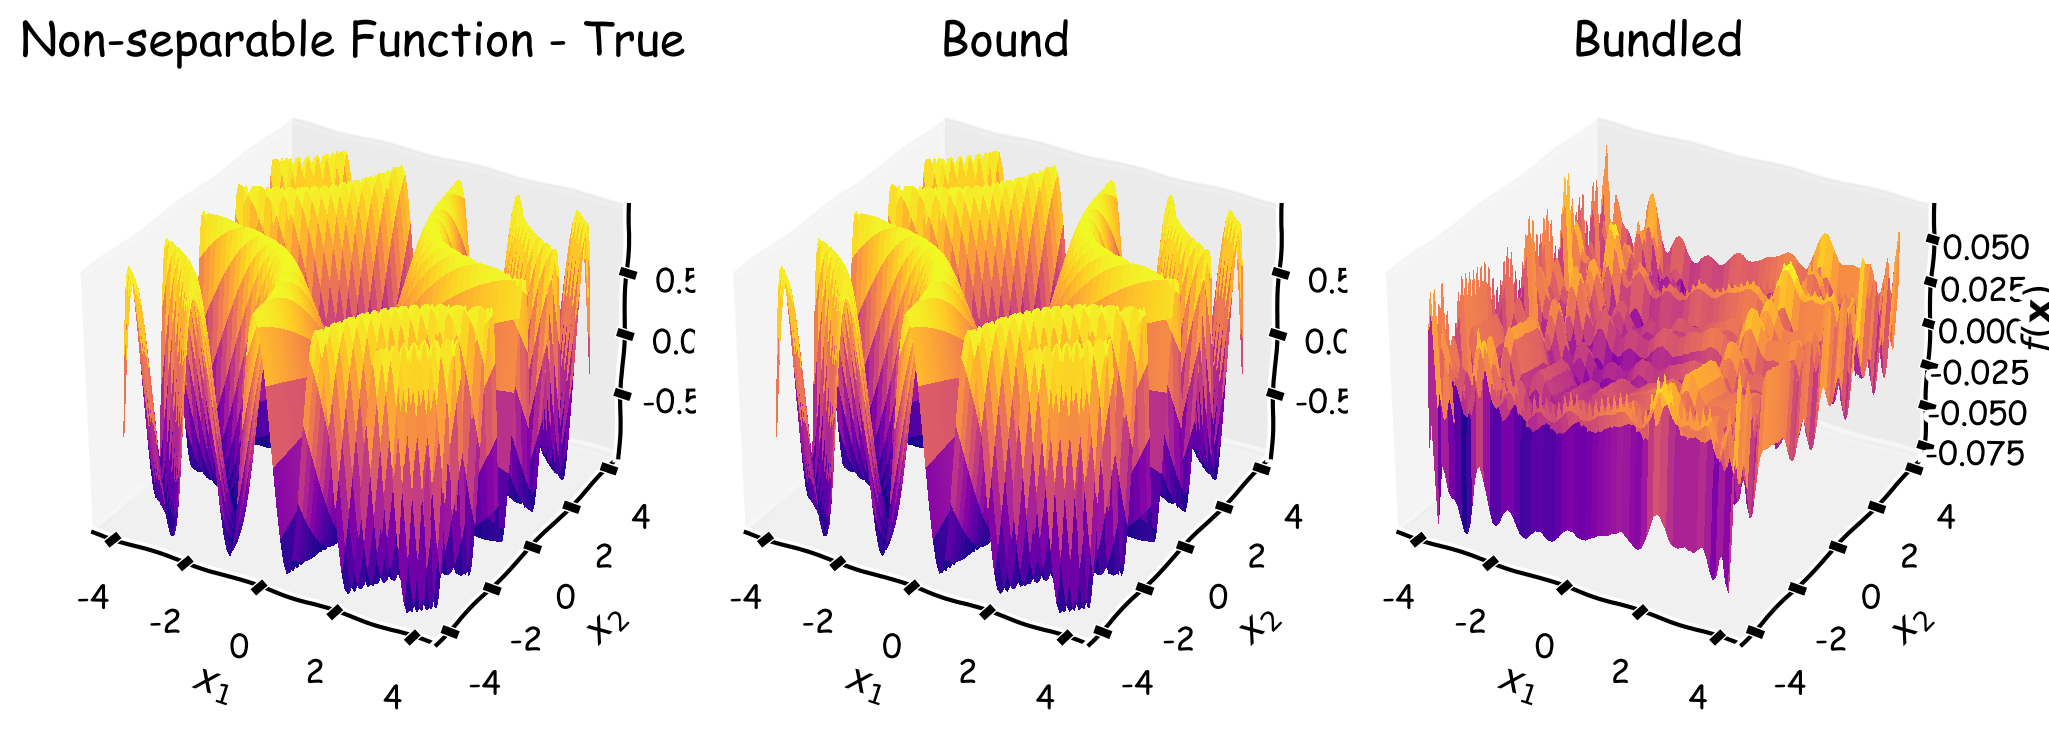

In [77]:
bound_model = get_model(bound_phis, ys_non_separable, 0.75)
bundle_model = get_model(bundle_phis, ys_non_separable, 0.1)

ys_hat_bound = bound_model.predict(bound_phis)
ys_hat_bundle = bundle_model.predict(bundle_phis)

plot_3d_function([X, X, X], [Y, Y, Y], [ys_non_separable.reshape(X.shape), ys_hat_bound.reshape(X.shape), ys_hat_bundle.reshape(X.shape)], ['Non-separable Function - True', 'Bound', 'Bundled'])

So as we can see, when we pick the right inductive bias, we can do a better job.

In [ ]:
# @title Submit your feedback
# content_review(f"{feedback_prefix}_non_separable_function")

---

# Section 10: Representing Continuous Values

Estimated timing to here from start of tutorial: 2 hours 20 minutes

In this section we will use a technique called Fractional Binding to represent continuous values to construct a map of objects distributed over a 2D space.  

In [ ]:
# @title Video 12: Mapping Intro
from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display

class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)

def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents

# video_ids = [('Youtube', '<video_id_1>'), ('Bilibili', '<video_id_2>'), ('Osf', '<video_id_3>')]
# tab_contents = display_videos(video_ids, W=854, H=480)
# tabs = widgets.Tab()
# tabs.children = tab_contents
# for i in range(len(tab_contents)):
#   tabs.set_title(i, video_ids[i][0])
# display(tabs)

In [ ]:
# @title Submit your feedback
# content_review(f"{feedback_prefix}_mapping_intro")

## Coding Exercise 13: Mixing Discrete Objects With Continuous Space

We are going to store three objects in a vector that represents a map. First we are going to create 3 objects (a circle, square, and triangle) like before.

In [78]:
set_seed(42)

obj_names = ['circle','square','triangle']
discrete_space = sspspace.DiscreteSPSpace(obj_names, ssp_dim=1024)

objs = {n:discrete_space.encode(n) for n in obj_names}

Next we are going to create three locations for the objects to reside at and an encoder to transform those coordinates into an SSP representation.

In [79]:
set_seed(42)

ssp_space = sspspace.RandomSSPSpace(domain_dim=2, ssp_dim=1024)
positions = np.array([[0,-2],
                      [-2,3],
                      [3,2]
                     ])
ssps = {n:ssp_space.encode(x) for n, x in zip(obj_names, positions)}

Next, in order to see where things are on the map we are going to compute the similarity between encoded places and points in the space. Your task is to complete calculation of similarity values by proposing correct notation for `np.einsum()` function (remember: we would like to calculate similarity between all grid points with the given one associated with the object).

In [80]:
dim0 = np.linspace(-5,5,101)
dim1 = np.linspace(-5,5,101)
X,Y = np.meshgrid(dim0,dim1)

query_xs = np.vstack((X.flatten(),Y.flatten())).T
query_ssps = ssp_space.encode(query_xs)

In [280]:
###################################################################
## Fill out the following then remove
raise NotImplementedError("Student exercise: complete `np.einsum()` function.")
###################################################################

sims = []

for obj_idx, obj in enumerate(obj_names):
    sims.append(np.einsum(..., ..., ssps[obj].flatten()))

In [81]:
#to_remove solution

sims = []

for obj_idx, obj in enumerate(obj_names):
    sims.append(np.einsum('nd,d->n', query_ssps, ssps[obj].flatten()))

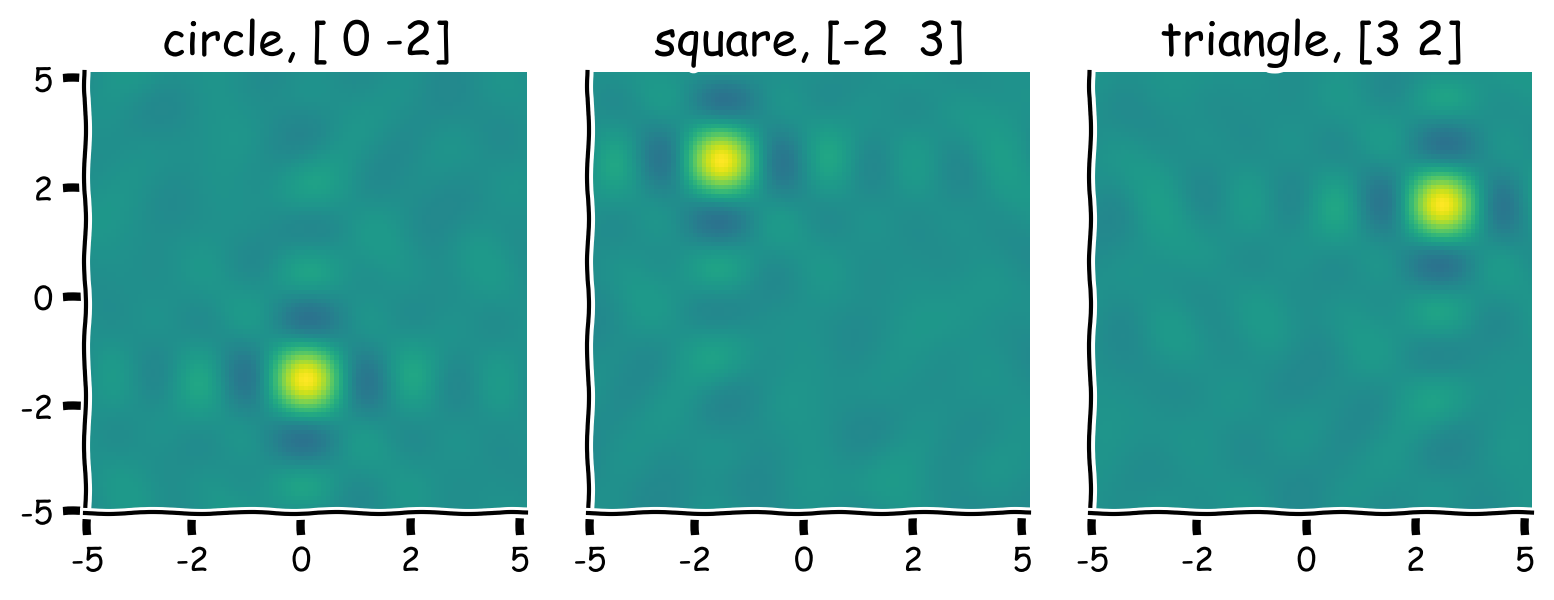

In [82]:
plot_2d_similarity(sims, obj_names, (dim0.size,dim1.size))

Now, let's bind these positions with the objects and see how that changes similarity with the map positions. Complete binding operation in the cell below.

In [ ]:
###################################################################
## Fill out the following then remove
raise NotImplementedError("Student exercise: complete binding operation for objects and corresponding positions.")
###################################################################

bound_objects = [... * ... for n in obj_names]

In [83]:
#to_remove solution

bound_objects = [objs[n] * ssps[n] for n in obj_names]

Now we will calculate the similarity in the same way we did it before.

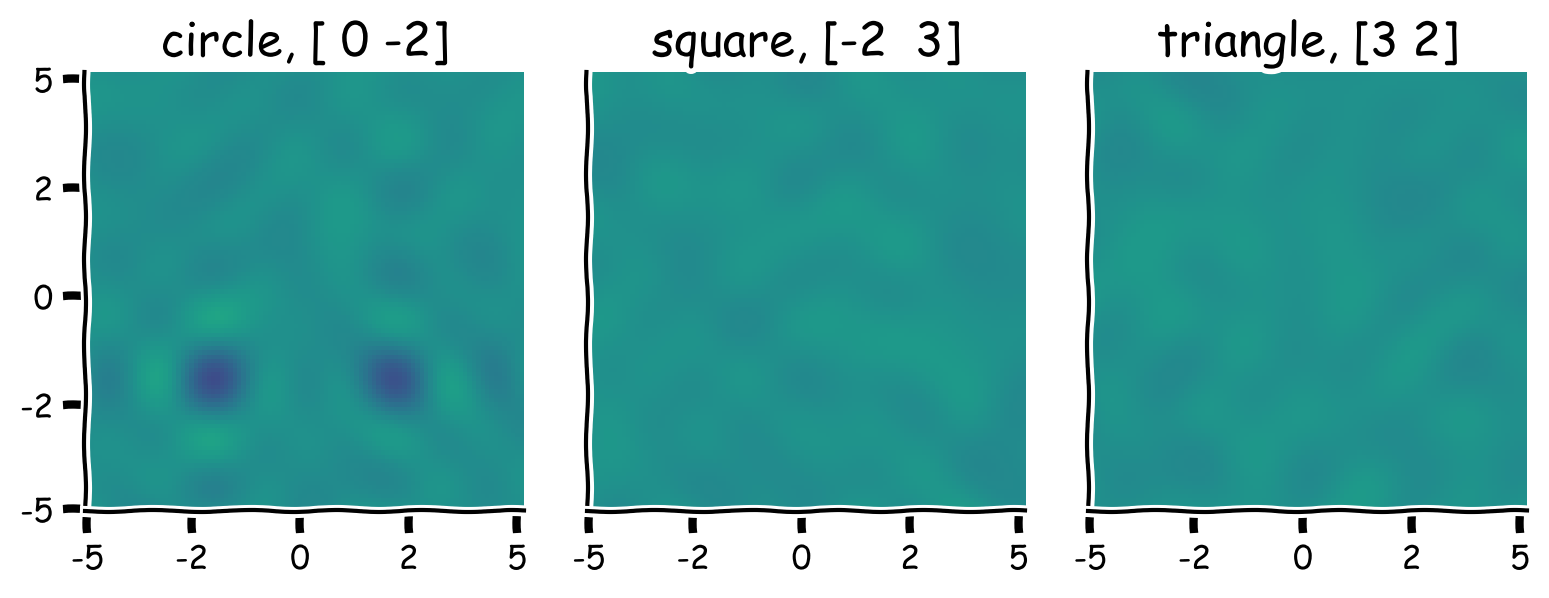

In [299]:
sims = []

for obj_idx, obj in enumerate(obj_names):
    sims.append(np.einsum('nd,d->n', query_ssps, bound_objects[obj_idx].flatten()))
plot_2d_similarity(sims, obj_names, (dim0.size, dim1.size))

As you can seem, the similarity is destroyed, which is what we should expect.

Next, we are going to create a map out of our bound objects:

$$
\mathrm{map} = \sum_{i=1}^{n} \phi(x_{i})\circledast obj_{i}
$$

In [84]:
set_seed(42)

ssp_map = sspspace.SSP(np.sum(bound_objects, axis=0))

Now we can query the map by unbinding the objects we care about. Your task is to complete the unbinding operation.

In [ ]:
###################################################################
## Fill out the following then remove
raise NotImplementedError("Student exercise: complete the unbinding operation.")
###################################################################

sims = []

for obj_idx, obj_name in enumerate(obj_names):
    query_map = ... * ~objs[...] # Query the object name
    sims.append(np.einsum('nd,d->n', query_ssps,query_map.flatten()))

In [85]:
#to_remove solution

sims = []

for obj_idx, obj_name in enumerate(obj_names):
    query_map = ssp_map * ~objs[obj_name] # Query the object name
    sims.append(np.einsum('nd,d->n', query_ssps,query_map.flatten()))

Let's observed the resulting similarities.

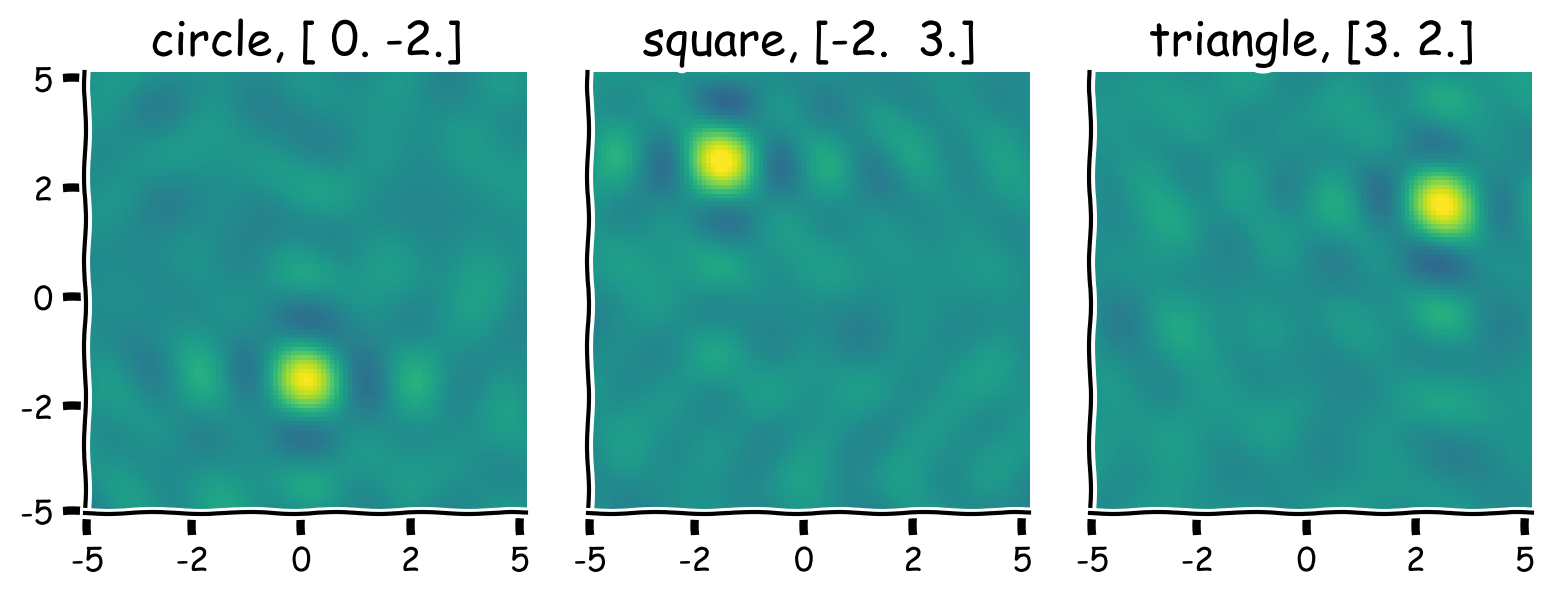

In [86]:
plot_2d_similarity(sims, obj_names, (dim0.size, dim1.size), title_argmax = True)

Let's look at what happens when we unbind all the symbols at once from the map. Complete bundling and unbinding operations in the following code cell.

In [ ]:
###################################################################
## Fill out the following then remove
raise NotImplementedError("Student exercise: complete the bundling and unbinding operations.")
################################################################### 

all_objs = (objs['circle'] + ... + ...).normalize()
query_map = ... * ~...

In [87]:
#to_remove solution

all_objs = (objs['circle'] + objs['square'] + objs['triangle']).normalize()
query_map = ssp_map * ~all_objs

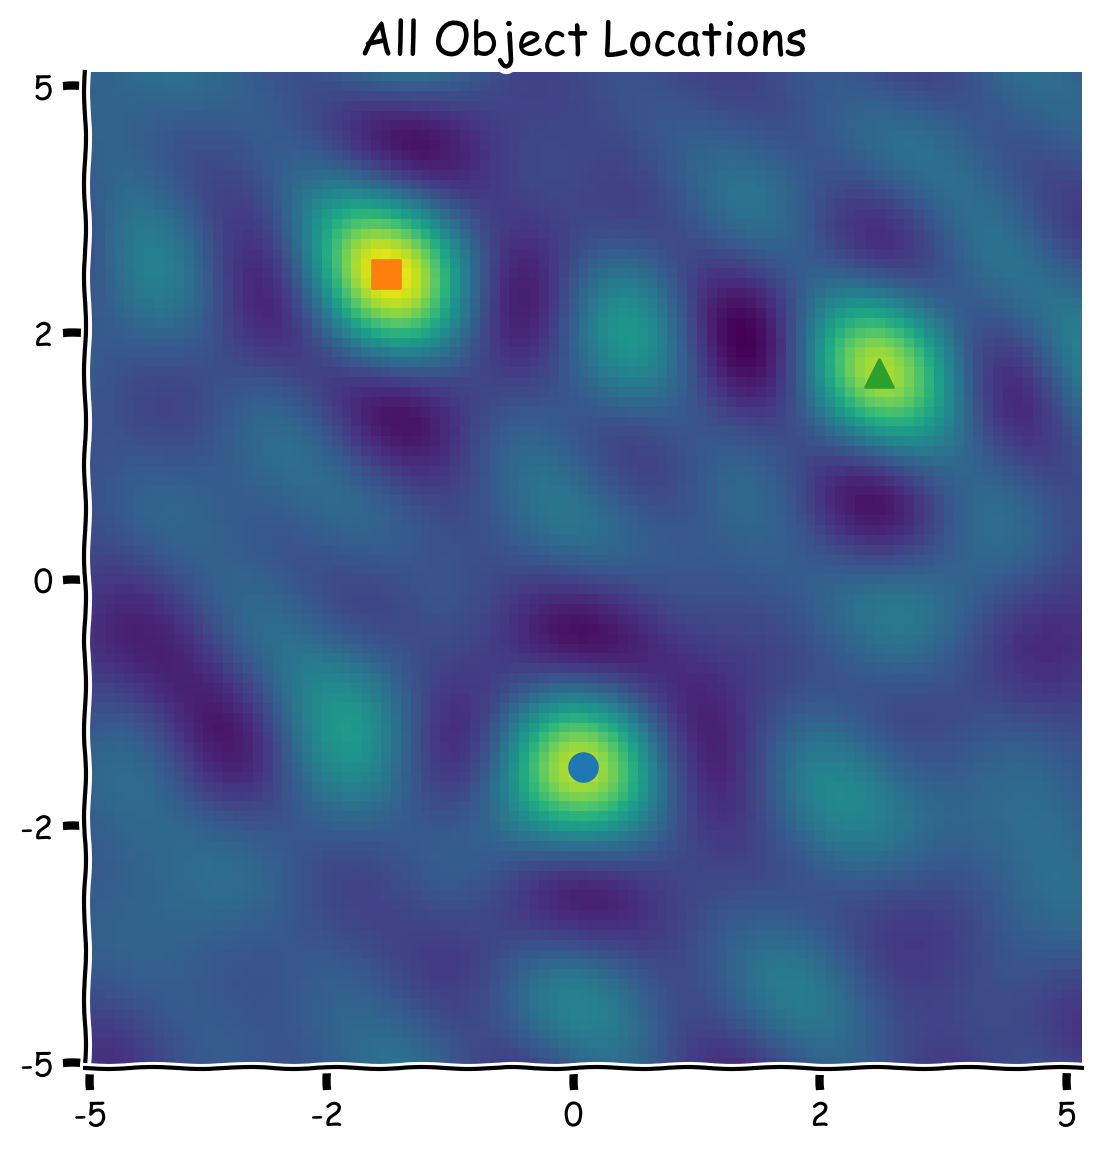

In [88]:
sims = np.einsum('nd,d->n', query_ssps, query_map.flatten())
size = (dim0.size,dim1.size)

plot_unbinding_objects_map(sims, positions, query_xs, size)

But also, we can unbind positions and see what objects exist there. We will use test positions as the ones where objects are located but also two distinct ones to see what will be the result there. In the final exercise you should complete the unbinding of the position operation.

In [ ]:
###################################################################
## Fill out the following then remove
raise NotImplementedError("Student exercise: complete the unbinding operations.")
################################################################### 

query_objs = np.vstack([objs[n] for n in obj_names])
test_positions = np.vstack((positions, [0,0], [0,-1.5]))

sims = []

for pos_idx, pos in enumerate(test_positions):
    position_ssp = ssp_space.encode(pos[None,:]) #remember we need to have 2-dimensional vectors for `encode()` function
    query_map = ... * ~...
    sims.append(np.einsum('nd,d->n', query_objs,query_map.flatten()))

In [89]:
#to_remove solution

query_objs = np.vstack([objs[n] for n in obj_names])
test_positions = np.vstack((positions, [0,0], [0,-1.5]))

sims = []

for pos_idx, pos in enumerate(test_positions):
    position_ssp = ssp_space.encode(pos[None,:]) #remember we need to have 2-dimensional vectors for `encode()` function
    query_map = ssp_map * ~position_ssp
    sims.append(np.einsum('nd,d->n', query_objs,query_map.flatten()))

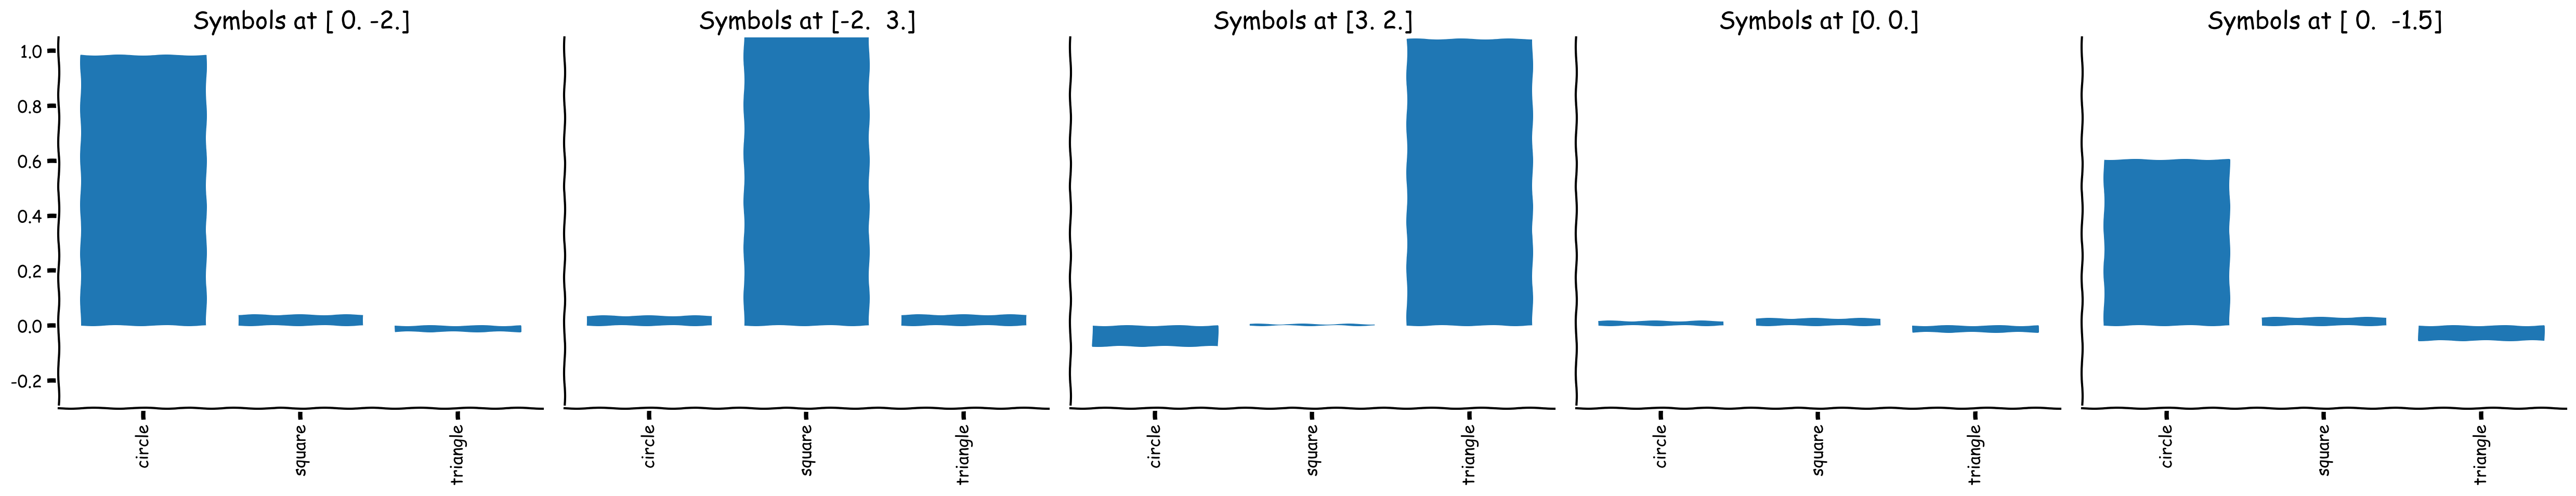

In [90]:
plot_unbinding_positions_map(sims, test_positions, obj_names)

As you can see from the above plots, when you query what is at the locations of the particular location, we can clearly identify which object is stored at which location.  

When we query at the origin (where no object is present) we see that there is no strong candidate element.  But as we move closer to one of the objects (rightmost plot) the similarity starts to increase.

In [ ]:
# @title Submit your feedback
# content_review(f"{feedback_prefix}_mixing_discrete_objects_with_continuous_space")

In [ ]:
# @title Video 13: Mapping Outro
from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display

class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)

def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents

# video_ids = [('Youtube', '<video_id_1>'), ('Bilibili', '<video_id_2>'), ('Osf', '<video_id_3>')]
# tab_contents = display_videos(video_ids, W=854, H=480)
# tabs = widgets.Tab()
# tabs.children = tab_contents
# for i in range(len(tab_contents)):
#   tabs.set_title(i, video_ids[i][0])
# display(tabs)

In [ ]:
# @title Submit your feedback
# content_review(f"{feedback_prefix}_mapping_outro")

---
# Summary

*Estimated timing of tutorial: 2 hours 40 minutes*

In [ ]:
# @title Video 14: Conclusions
from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display

class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)

def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents

# video_ids = [('Youtube', '<video_id_1>'), ('Bilibili', '<video_id_2>'), ('Osf', '<video_id_3>')]
# tab_contents = display_videos(video_ids, W=854, H=480)
# tabs = widgets.Tab()
# tabs.children = tab_contents
# for i in range(len(tab_contents)):
#   tabs.set_title(i, video_ids[i][0])
# display(tabs)

In [ ]:
# @title Submit your feedback
# content_review(f"{feedback_prefix}_conclusions")

Have a summary of what they learned with specific points.

1. Specific point A

2. Specific point B

During the next tutorials we are going to address the question of generalization - what are the techniques and methods to deal with the limited predictability power which proposes trivial learning.